In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Surface_06DEC.csv', sep = ';', index_col="FID")


,Kod_region,Region,Kod_distri,District,Kod_munici,Municipal,Kod_part_o,Part_ofmun,Kod_local,Local_part,...,aspect,dist_road,distanc_ri,relativ_hu,Code_lanco,pop_densit,temperatur,wind_speed,Risk_AHP,Risk_fu_AH
FID,,,,,,,,,,,,,,,,,,,,,
0,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,242.276001,0,775.625977,82.361900,121,2556.550049,4.843180,3.46498,4,3
2,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,30.261600,0,1017.400024,82.170403,111,2556.550049,14.438100,2.89961,5,4
5,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,188.529999,0,270.886993,82.057404,112,2556.550049,19.809299,2.50000,4,3
6,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,89.783401,0,1579.040039,83.392899,142,2556.550049,18.195400,2.43740,5,5
10,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,730556,Bohnice,500208,Praha 8,...,313.786987,0,606.570984,82.161003,313,1200.839966,14.268900,2.85065,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14820,CZ072,Zlínský kraj,CZ0724,Zlín,552593,Zlín,690783,Malenovice,0,,...,103.639999,1110,1613.500000,87.585999,312,171.921005,15.444500,3.18022,4,4
14821,CZ072,Zlínský kraj,CZ0724,Zlín,585068,Zlín,636177,Mladcová,0,,...,144.270996,0,2945.030029,90.102798,311,184.375000,16.044300,2.94436,5,5
14822,CZ072,Zlínský kraj,CZ0724,Zlín,585068,Zlín,636177,Mladcová,0,,...,144.270996,0,2945.030029,90.102798,311,184.375000,16.044300,2.94436,5,5


In [3]:
df.columns

Index(['Kod_region', 'Region', 'Kod_distri', 'District', 'Kod_munici',
       'Municipal', 'Kod_part_o', 'Part_ofmun', 'Kod_local', 'Local_part',
       'Day', 'Month', 'Year', 'Time fire H', 'Alarm_leve', 'Type_of_bu', 'x',
       'y', 'Surface', 'Ownership', 'Initiator', 'Popis', 'slope', 'elevation',
       'aspect', 'dist_road', 'distanc_ri', 'relativ_hu', 'Code_lanco',
       'pop_densit', 'temperatur', 'wind_speed', 'Risk_AHP', 'Risk_fu_AH'],
      dtype='object')

In [4]:
# dropping ALL duplicate values
df.drop_duplicates(keep = False, inplace = True)

In [5]:
df.groupby('Surface').size()

Surface
0    5991
1    1565
2    1475
3     905
4     472
dtype: int64

In [7]:
df=df.drop(columns=['Risk_AHP','Local_part','Ownership', 'Initiator', 'Popis','Kod_region','Kod_distri','Kod_munici','Kod_part_o','Kod_local','Type_of_bu', 'Risk_fu_AH','Time fire H'])


In [8]:
df.columns

Index(['Region', 'District', 'Municipal', 'Part_ofmun', 'Day', 'Month', 'Year',
       'Alarm_leve', 'x', 'y', 'Surface', 'slope', 'elevation', 'aspect',
       'dist_road', 'distanc_ri', 'relativ_hu', 'Code_lanco', 'pop_densit',
       'temperatur', 'wind_speed'],
      dtype='object')

# L'encodage des variables non numériques en variables numériques

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [10]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
transformed_data = (onehotencoder.fit_transform(df[['Region','District','Municipal','Part_ofmun','Alarm_leve']]).toarray())

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=df.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([df, encoded_data], axis=1)

In [11]:
data=concatenated_data.drop(columns=['Region','District','Municipal','Part_ofmun','Alarm_leve'])

In [12]:
dict={0:"Reg_Hlavní město Praha",
1:"Reg_Jihomoravský kraj",
2:"Reg_Jihočeský kraj",
3:"Reg_Karlovarský kraj",
4:"Reg_Královéhradecký kraj",
5:"Reg_Liberecký kraj",
6:"Reg_Moravskoslezský kraj",
7:"Reg_Olomoucký kraj",
8:"Reg_Pardubický kraj",
9:"Reg_Plzeňský kraj",
10:"Reg_Středočeský kraj",
11:"Reg_Vysočina kraj",
12:"Reg_Zlínský kraj",
13:"Reg_Ústecký kraj",
14:"Dist_Benešov",
15:"Dist_Beroun",
16:"Dist_Blansko",
17:"Dist_Brno-Město",
18:"Dist_Brno-Venkov",
19:"Dist_Bruntál",
20:"Dist_Břeclav",
21:"Dist_Ceská Lípa",
22:"Dist_Cheb",
23:"Dist_Chomutov",
24:"Dist_Chrudim",
25:"Dist_Domažlice",
26:"Dist_Děčín",
27:"Dist_Frýdek-Místek",
28:"Dist_Havlickuv Brod",
29:"Dist_Havlíčkův Brod",
30:"Dist_Hlavní Město Praha",
31:"Dist_Hodonín",
32:"Dist_Hradec Králové",
33:"Dist_Jablonec Nad Nisou",
34:"Dist_Jeseník",
35:"Dist_Jihlava",
36:"Dist_Jindřichův Hradec",
37:"Dist_Jičín",
38:"Dist_Karlovy Vary",
39:"Dist_Karviná",
40:"Dist_Kladno",
41:"Dist_Klatovy",
42:"Dist_Kolín",
43:"Dist_Kroměříž",
44:"Dist_Kutná Hora",
45:"Dist_Liberec",
46:"Dist_Litoměřice",
47:"Dist_Louny",
48:"Dist_Mladá Boleslav",
49:"Dist_Most",
50:"Dist_Mělník",
51:"Dist_Nový Jičín",
52:"Dist_Nymburk",
53:"Dist_Náchod",
54:"Dist_Olomouc",
55:"Dist_Opava",
56:"Dist_Ostrava-Město",
57:"Dist_Pardubice",
58:"Dist_Pelhrimov",
59:"Dist_Pelhřimov",
60:"Dist_Plzeň-Jih",
61:"Dist_Plzeň-Město",
62:"Dist_Plzeň-Sever",
63:"Dist_Prachatice",
64:"Dist_Praha-Východ",
65:"Dist_Praha-Západ",
66:"Dist_Prostějov",
67:"Dist_Písek",
68:"Dist_Přerov",
69:"Dist_Příbram",
70:"Dist_Rakovník",
71:"Dist_Rokycany",
72:"Dist_Rychnov Nad Kněžnou",
73:"Dist_Semily",
74:"Dist_Sokolov",
75:"Dist_Strakonice",
76:"Dist_Svitavy",
77:"Dist_Tachov",
78:"Dist_Teplice",
79:"Dist_Trebíc",
80:"Dist_Trutnov",
81:"Dist_Tábor",
82:"Dist_Třebíč",
83:"Dist_Uherské Hradiště",
84:"Dist_Vsetín",
85:"Dist_Vyškov",
86:"Dist_Zlín",
87:"Dist_Znojmo",
88:"Dist_Ústí Nad Labem",
89:"Dist_Ústí Nad Orlicí",
90:"Dist_Česká Lípa",
91:"Dist_České Budějovice",
92:"Dist_Český Krumlov",
93:"Dist_Šumperk",
94:"Dist_Žďár Nad Sázavou",
95:"Muni_Adršpach",
96:"Muni_Albrechtice",
97:"Muni_Albrechtice V Jizerských Horách",
98:"Muni_Andělská Hora",
99:"Muni_Anenská Studánka",
100:"Muni_Archlebov",
101:"Muni_Arnolec",
102:"Muni_Arnoltice",
103:"Muni_Aš",
104:"Muni_Babice",
105:"Muni_Babice Nad Svitavou",
106:"Muni_Babice U Rosic",
107:"Muni_Babylon",
108:"Muni_Baliny",
109:"Muni_Banín",
110:"Muni_Bartoušov",
111:"Muni_Batelov",
112:"Muni_Batňovice",
113:"Muni_Bavorov",
114:"Muni_Bavoryně",
115:"Muni_Bačetín",
116:"Muni_Bačkovice",
117:"Muni_Baška",
118:"Muni_Bechlín",
119:"Muni_Bechyně",
120:"Muni_Bedihošť",
121:"Muni_Bedřichov",
122:"Muni_Benecko",
123:"Muni_Benešov Nad Ploučnicí",
124:"Muni_Benešov Nad Černou",
125:"Muni_Benešov U Semil",
126:"Muni_Benešovice",
127:"Muni_Benátky Nad Jizerou",
128:"Muni_Bernartice",
129:"Muni_Beroun",
130:"Muni_Bezdružice",
131:"Muni_Bezdědovice",
132:"Muni_Bezděkov",
133:"Muni_Bezděkov Nad Metují",
134:"Muni_Bezděz",
135:"Muni_Bezděčí U Trnávky",
136:"Muni_Bezvěrov",
137:"Muni_Bečice",
138:"Muni_Bečov Nad Teplou",
139:"Muni_Biskoupky",
140:"Muni_Biskupice",
141:"Muni_Biřkov",
142:"Muni_Blansko",
143:"Muni_Blatce",
144:"Muni_Blatnice",
145:"Muni_Blatnička",
146:"Muni_Blatno",
147:"Muni_Blatná",
148:"Muni_Blažejov",
149:"Muni_Blažkov",
150:"Muni_Blažovice",
151:"Muni_Blevice",
152:"Muni_Blovice",
153:"Muni_Bludov",
154:"Muni_Blučina",
155:"Muni_Blízkov",
156:"Muni_Blížejov",
157:"Muni_Blíževedly",
158:"Muni_Bobrová",
159:"Muni_Bobrůvka",
160:"Muni_Bochov",
161:"Muni_Bohdalec",
162:"Muni_Bohdalice-Pavlovice",
163:"Muni_Bohdalov",
164:"Muni_Bohdalín",
165:"Muni_Bohdašín",
166:"Muni_Bohostice",
167:"Muni_Bohumín",
168:"Muni_Bohuslavice U Zlína",
169:"Muni_Bohutín",
170:"Muni_Bohuňov",
171:"Muni_Bohušovice Nad Ohří",
172:"Muni_Bohy",
173:"Muni_Boháňka",
174:"Muni_Bojanov",
175:"Muni_Bojanovice",
176:"Muni_Bojkovice",
177:"Muni_Boleboř",
178:"Muni_Boletice",
179:"Muni_Bolešiny",
180:"Muni_Bor",
181:"Muni_Bor U Skutče",
182:"Muni_Borkovice",
183:"Muni_Borohrádek",
184:"Muni_Borotice",
185:"Muni_Borotín",
186:"Muni_Borovany",
187:"Muni_Borovnice",
188:"Muni_Borovnička",
189:"Muni_Borovná",
190:"Muni_Borovník",
191:"Muni_Bory",
192:"Muni_Boršice",
193:"Muni_Boršice U Blatnice",
194:"Muni_Boseň",
195:"Muni_Boskovice",
196:"Muni_Bousín",
197:"Muni_Bouzov",
198:"Muni_Bozkov",
199:"Muni_Bořetice",
200:"Muni_Bořislav",
201:"Muni_Bošovice",
202:"Muni_Božanov",
203:"Muni_Božejov",
204:"Muni_Božice",
205:"Muni_Božičany",
206:"Muni_Boží Dar",
207:"Muni_Brada-Rybníček",
208:"Muni_Bradlec",
209:"Muni_Bradlecká Lhota",
210:"Muni_Bradáčov",
211:"Muni_Brandov",
212:"Muni_Brandýs Nad Labem-Stará Boleslav",
213:"Muni_Branišov",
214:"Muni_Branov",
215:"Muni_Bransouze",
216:"Muni_Braníškov",
217:"Muni_Branžež",
218:"Muni_Bratronice",
219:"Muni_Bratrušov",
220:"Muni_Bratčice",
221:"Muni_Bratřice",
222:"Muni_Braňany",
223:"Muni_Braškov",
224:"Muni_Brdy",
225:"Muni_Brloh",
226:"Muni_Brniště",
227:"Muni_Brno",
228:"Muni_Brníčko",
229:"Muni_Brnířov",
230:"Muni_Brněnec",
231:"Muni_Brod Nad Tichou",
232:"Muni_Brodce",
233:"Muni_Brodec",
234:"Muni_Brodek U Konice",
235:"Muni_Brodek U Prostějova",
236:"Muni_Broumov",
237:"Muni_Broumy",
238:"Muni_Brozany Nad Ohří",
239:"Muni_Brtnice",
240:"Muni_Brumov-Bylnice",
241:"Muni_Bruntál",
242:"Muni_Brusné",
243:"Muni_Brzice",
244:"Muni_Brzkov",
245:"Muni_Brzánky",
246:"Muni_Brťov-Jeneč",
247:"Muni_Bubovice",
248:"Muni_Buchlovice",
249:"Muni_Budeč",
250:"Muni_Budislav",
251:"Muni_Budišov",
252:"Muni_Budišov Nad Budišovkou",
253:"Muni_Budišovice",
254:"Muni_Budkov",
255:"Muni_Budyně Nad Ohří",
256:"Muni_Budíškovice",
257:"Muni_Budětsko",
258:"Muni_Bujesily",
259:"Muni_Buk",
260:"Muni_Bukovany",
261:"Muni_Bukovec",
262:"Muni_Bukovice",
263:"Muni_Bukovina U Přelouče",
264:"Muni_Bukovinka",
265:"Muni_Bukovno",
266:"Muni_Buková",
267:"Muni_Buková U Příbramě",
268:"Muni_Bulovka",
269:"Muni_Butoves",
270:"Muni_Buzice",
271:"Muni_Bučovice",
272:"Muni_Buřenice",
273:"Muni_Bušovice",
274:"Muni_Buštěhrad",
275:"Muni_Bynovec",
276:"Muni_Bystřany",
277:"Muni_Bystřice",
278:"Muni_Bystřice Nad Pernštejnem",
279:"Muni_Bystřice Pod Hostýnem",
280:"Muni_Bystřice Pod Lopeníkem",
281:"Muni_Bystřička",
282:"Muni_Byšice",
283:"Muni_Bzenec",
284:"Muni_Bílichov",
285:"Muni_Bílina",
286:"Muni_Bílov",
287:"Muni_Bílovec",
288:"Muni_Bílovice Nad Svitavou",
289:"Muni_Bílsko",
290:"Muni_Bílá",
291:"Muni_Bílá Hlína",
292:"Muni_Bílá Třemešná",
293:"Muni_Bílé Poličany",
294:"Muni_Bílý Kostel Nad Nisou",
295:"Muni_Bílý Kámen",
296:"Muni_Bílčice",
297:"Muni_Bítouchov",
298:"Muni_Bítov",
299:"Muni_Bítovčice",
300:"Muni_Býchory",
301:"Muni_Býkev",
302:"Muni_Býšovec",
303:"Muni_Býšť",
304:"Muni_Běleč",
305:"Muni_Běleč Nad Orlicí",
306:"Muni_Bělkovice-Lašťany",
307:"Muni_Bělotín",
308:"Muni_Bělá",
309:"Muni_Bělá Nad Radbuzou",
310:"Muni_Bělá Pod Bezdězem",
311:"Muni_Bělčice",
312:"Muni_Běstvina",
313:"Muni_Běšiny",
314:"Muni_Běštín",
315:"Muni_Břasy",
316:"Muni_Břeclav",
317:"Muni_Břehov",
318:"Muni_Břehy",
319:"Muni_Břestek",
320:"Muni_Březejc",
321:"Muni_Březina",
322:"Muni_Březnice",
323:"Muni_Březno",
324:"Muni_Březník",
325:"Muni_Březovice",
326:"Muni_Březová",
327:"Muni_Březová Nad Svitavou",
328:"Muni_Březová-Oleško",
329:"Muni_Březí Nad Oslavou",
330:"Muni_Březůvky",
331:"Muni_Břidličná",
332:"Muni_Bžany",
333:"Muni_Cebiv",
334:"Muni_Cejle",
335:"Muni_Cep",
336:"Muni_Cerekvice Nad Bystřicí",
337:"Muni_Cerhenice",
338:"Muni_Cerhovice",
339:"Muni_Cervená Recice",
340:"Muni_Cetenov",
341:"Muni_Cetkovice",
342:"Muni_Cetoraz",
343:"Muni_Chabeřice",
344:"Muni_Chaloupky",
345:"Muni_Chanovice",
346:"Muni_Chbany",
347:"Muni_Cheb",
348:"Muni_Cheznovice",
349:"Muni_Chlum",
350:"Muni_Chlum Svaté Maří",
351:"Muni_Chlum U Třeboně",
352:"Muni_Chlum-Korouhvice",
353:"Muni_Chlumec",
354:"Muni_Chlumec Nad Cidlinou",
355:"Muni_Chlumčany",
356:"Muni_Chlístovice",
357:"Muni_Chocerady",
358:"Muni_Choceň",
359:"Muni_Chocnějovice",
360:"Muni_Chodouny",
361:"Muni_Chodouň",
362:"Muni_Chodov",
363:"Muni_Chodová Planá",
364:"Muni_Choltice",
365:"Muni_Chomle",
366:"Muni_Chomutov",
367:"Muni_Chomýž",
368:"Muni_Choratice",
369:"Muni_Chorušice",
370:"Muni_Choryně",
371:"Muni_Chotilsko",
372:"Muni_Chotovice",
373:"Muni_Chotoviny",
374:"Muni_Chotyně",
375:"Muni_Chotíkov",
376:"Muni_Chotěboř",
377:"Muni_Chotěnov",
378:"Muni_Chotětov",
379:"Muni_Chotěvice",
380:"Muni_Chotěšov",
381:"Muni_Choustník",
382:"Muni_Choustníkovo Hradiště",
383:"Muni_Choťovice",
384:"Muni_Chraberce",
385:"Muni_Chrast",
386:"Muni_Chrastava",
387:"Muni_Chrbonín",
388:"Muni_Chrudim",
389:"Muni_Chrustenice",
390:"Muni_Chrást",
391:"Muni_Chrášťany",
392:"Muni_Chuchelna",
393:"Muni_Chudenice",
394:"Muni_Chuderov",
395:"Muni_Chvalatice",
396:"Muni_Chvaletice",
397:"Muni_Chvaleč",
398:"Muni_Chvalkovice",
399:"Muni_Chvalčov",
400:"Muni_Chvalšiny",
401:"Muni_Chyňava",
402:"Muni_Chyše",
403:"Muni_Chyšky",
404:"Muni_Chýnov",
405:"Muni_Chýstovice",
406:"Muni_Chřenovice",
407:"Muni_Chřibská",
408:"Muni_Cikháj",
409:"Muni_Citice",
410:"Muni_Cizkrajov",
411:"Muni_Ctiboř",
412:"Muni_Ctětín",
413:"Muni_Cvikov",
414:"Muni_Cvrčovice",
415:"Muni_Dalečín",
416:"Muni_Dalešice",
417:"Muni_Dalovice",
418:"Muni_Dambořice",
419:"Muni_Damníkov",
420:"Muni_Darkovice",
421:"Muni_Daskabát",
422:"Muni_Dasnice",
423:"Muni_Dasný",
424:"Muni_Davle",
425:"Muni_Dačice",
426:"Muni_Dehtáře",
427:"Muni_Desná",
428:"Muni_Deštnice",
429:"Muni_Deštná",
430:"Muni_Deštné V Orlických Horách",
431:"Muni_Divišov",
432:"Muni_Dlažov",
433:"Muni_Dlouhomilov",
434:"Muni_Dlouhá Brtnice",
435:"Muni_Dlouhá Stráň",
436:"Muni_Dlouhá Třebová",
437:"Muni_Dlouhá Ves",
438:"Muni_Dlouhé",
439:"Muni_Dlouhý Most",
440:"Muni_Dobev",
441:"Muni_Dobkovice",
442:"Muni_Dobratice",
443:"Muni_Dobrohošť",
444:"Muni_Dobroměřice",
445:"Muni_Dobronice U Bechyně",
446:"Muni_Dobronín",
447:"Muni_Dobroutov",
448:"Muni_Dobrovice",
449:"Muni_Dobrovítov",
450:"Muni_Dobruška",
451:"Muni_Dobrá Voda",
452:"Muni_Dobré",
453:"Muni_Dobršín",
454:"Muni_Dobřeň",
455:"Muni_Dobřichov",
456:"Muni_Dobřichovice",
457:"Muni_Dobříkov",
458:"Muni_Dobřív",
459:"Muni_Dobříč",
460:"Muni_Dobříň",
461:"Muni_Dobříš",
462:"Muni_Dobšice",
463:"Muni_Dobšín",
464:"Muni_Doksany",
465:"Muni_Doksy",
466:"Muni_Dolany",
467:"Muni_Dolce",
468:"Muni_Dolní Beřkovice",
469:"Muni_Dolní Bousov",
470:"Muni_Dolní Branná",
471:"Muni_Dolní Brusnice",
472:"Muni_Dolní Břežany",
473:"Muni_Dolní Cerekev",
474:"Muni_Dolní Dobrouč",
475:"Muni_Dolní Dubňany",
476:"Muni_Dolní Dvůr",
477:"Muni_Dolní Heřmanice",
478:"Muni_Dolní Hořice",
479:"Muni_Dolní Hrachovice",
480:"Muni_Dolní Hradiště",
481:"Muni_Dolní Kalná",
482:"Muni_Dolní Kralovice",
483:"Muni_Dolní Lažany",
484:"Muni_Dolní Lhota",
485:"Muni_Dolní Lomná",
486:"Muni_Dolní Loučky",
487:"Muni_Dolní Lutyně",
488:"Muni_Dolní Lánov",
489:"Muni_Dolní Morava",
490:"Muni_Dolní Město",
491:"Muni_Dolní Nivy",
492:"Muni_Dolní Olešnice",
493:"Muni_Dolní Podluží",
494:"Muni_Dolní Pohleď",
495:"Muni_Dolní Poustevna",
496:"Muni_Dolní Radechová",
497:"Muni_Dolní Roveň",
498:"Muni_Dolní Rožínka",
499:"Muni_Dolní Rychnov",
500:"Muni_Dolní Sokolovec",
501:"Muni_Dolní Třebonín",
502:"Muni_Dolní Vilímeč",
503:"Muni_Dolní Věstonice",
504:"Muni_Dolní Řasnice",
505:"Muni_Dolní Žandov",
506:"Muni_Doloplazy",
507:"Muni_Dolánky Nad Ohří",
508:"Muni_Domašov",
509:"Muni_Domašín",
510:"Muni_Domažlice",
511:"Muni_Domousnice",
512:"Muni_Domoušice",
513:"Muni_Doubice",
514:"Muni_Doubravník",
515:"Muni_Doubravčice",
516:"Muni_Doudleby Nad Orlicí",
517:"Muni_Doupě",
518:"Muni_Drachkov",
519:"Muni_Drahanovice",
520:"Muni_Drahonice",
521:"Muni_Drahonín",
522:"Muni_Drahov",
523:"Muni_Dražice",
524:"Muni_Dražíč",
525:"Muni_Drhovice",
526:"Muni_Drhovy",
527:"Muni_Drnek",
528:"Muni_Drnovice",
529:"Muni_Droužetice",
530:"Muni_Drozdov",
531:"Muni_Druhanov",
532:"Muni_Druztová",
533:"Muni_Dráchov",
534:"Muni_Drásov",
535:"Muni_Držkov",
536:"Muni_Držková",
537:"Muni_Dub",
538:"Muni_Dub Nad Moravou",
539:"Muni_Dubenec",
540:"Muni_Dublovice",
541:"Muni_Dubno",
542:"Muni_Dubné",
543:"Muni_Dubá",
544:"Muni_Dubí",
545:"Muni_Dubňany",
546:"Muni_Duchcov",
547:"Muni_Dudín",
548:"Muni_Dukovany",
549:"Muni_Dunajovice",
550:"Muni_Dvory",
551:"Muni_Dvory Nad Lužnicí",
552:"Muni_Dvůr Králové Nad Labem",
553:"Muni_Dyje",
554:"Muni_Dyjice",
555:"Muni_Dymokury",
556:"Muni_Díly",
557:"Muni_Dívčí Hrad",
558:"Muni_Dýšina",
559:"Muni_Děhylov",
560:"Muni_Děkanovice",
561:"Muni_Děpoltovice",
562:"Muni_Dětmarovice",
563:"Muni_Děčín",
564:"Muni_Dřetovice",
565:"Muni_Dřevohostice",
566:"Muni_Dřevčice",
567:"Muni_Dřevěnice",
568:"Muni_Dřešín",
569:"Muni_Dřínov",
570:"Muni_Dřísy",
571:"Muni_Dříteň",
572:"Muni_Důl",
573:"Muni_Ejpovice",
574:"Muni_Erpužice",
575:"Muni_Evaň",
576:"Muni_Felbabka",
577:"Muni_Francova Lhota",
578:"Muni_Františkov Nad Ploučnicí",
579:"Muni_Františkovy Lázně",
580:"Muni_Frenštát Pod Radhoštěm",
581:"Muni_Frymburk",
582:"Muni_Fryšava Pod Žákovou Horou",
583:"Muni_Frýdek-Místek",
584:"Muni_Frýdlant",
585:"Muni_Frýdlant Nad Ostravicí",
586:"Muni_Frýdštejn",
587:"Muni_Fulnek",
588:"Muni_Golčův Jeníkov",
589:"Muni_Gruna",
590:"Muni_Grygov",
591:"Muni_Habartov",
592:"Muni_Habry",
593:"Muni_Habrůvka",
594:"Muni_Hajnice",
595:"Muni_Halenkov",
596:"Muni_Halenkovice",
597:"Muni_Halámky",
598:"Muni_Halže",
599:"Muni_Hamr",
600:"Muni_Hamr Na Jezeře",
601:"Muni_Hamry",
602:"Muni_Hanušovice",
603:"Muni_Harrachov",
604:"Muni_Hartmanice",
605:"Muni_Hartvíkovice",
606:"Muni_Havlickuv Brod",
607:"Muni_Havlovice",
608:"Muni_Havlíčkova Borová",
609:"Muni_Havlíčkův Brod",
610:"Muni_Havraníky",
611:"Muni_Havířov",
612:"Muni_Hazlov",
613:"Muni_Haškovcova Lhota",
614:"Muni_Hať",
615:"Muni_Hejnice",
616:"Muni_Hejtmánkovice",
617:"Muni_Herálec",
618:"Muni_Heršpice",
619:"Muni_Hevlín",
620:"Muni_Heřmaneč",
621:"Muni_Heřmanice U Oder",
622:"Muni_Heřmaničky",
623:"Muni_Heřmanov",
624:"Muni_Heřmanův Městec",
625:"Muni_Heřmánkovice",
626:"Muni_Heřmánky",
627:"Muni_Hladké Životice",
628:"Muni_Hladov",
629:"Muni_Hlasivo",
630:"Muni_Hlavatce",
631:"Muni_Hlavenec",
632:"Muni_Hlavečník",
633:"Muni_Hlavice",
634:"Muni_Hlinná",
635:"Muni_Hlinsko",
636:"Muni_Hluboká Nad Vltavou",
637:"Muni_Hluboké Mašůvky",
638:"Muni_Hlubočec",
639:"Muni_Hlubočky",
640:"Muni_Hluboš",
641:"Muni_Hluchov",
642:"Muni_Hlučín",
643:"Muni_Hlásná Třebaň",
644:"Muni_Hnátnice",
645:"Muni_Hněvkovice",
646:"Muni_Hněvnice",
647:"Muni_Hodice",
648:"Muni_Hodkovice Nad Mohelkou",
649:"Muni_Hodonice",
650:"Muni_Hodonín",
651:"Muni_Hodíškov",
652:"Muni_Holany",
653:"Muni_Holedeč",
654:"Muni_Holešov",
655:"Muni_Holice",
656:"Muni_Holohlavy",
657:"Muni_Holotín",
658:"Muni_Holubov",
659:"Muni_Holín",
660:"Muni_Holýšov",
661:"Muni_Holčovice",
662:"Muni_Holštejn",
663:"Muni_Homole U Panny",
664:"Muni_Hora Svaté Kateřiny",
665:"Muni_Hora Svatého Šebestiána",
666:"Muni_Horažďovice",
667:"Muni_Horka",
668:"Muni_Horka Ii",
669:"Muni_Horní Benešov",
670:"Muni_Horní Bezděkov",
671:"Muni_Horní Bečva",
672:"Muni_Horní Beřkovice",
673:"Muni_Horní Blatná",
674:"Muni_Horní Bludovice",
675:"Muni_Horní Bradlo",
676:"Muni_Horní Branná",
677:"Muni_Horní Brusnice",
678:"Muni_Horní Bělá",
679:"Muni_Horní Břečkov",
680:"Muni_Horní Bříza",
681:"Muni_Horní Cerekev",
682:"Muni_Horní Dubenky",
683:"Muni_Horní Dunajovice",
684:"Muni_Horní Habartice",
685:"Muni_Horní Jelení",
686:"Muni_Horní Jiřetín",
687:"Muni_Horní Kamenice",
688:"Muni_Horní Kounice",
689:"Muni_Horní Krupá",
690:"Muni_Horní Kruty",
691:"Muni_Horní Lhota",
692:"Muni_Horní Libchava",
693:"Muni_Horní Lomná",
694:"Muni_Horní Loučky",
695:"Muni_Horní Maršov",
696:"Muni_Horní Meziříčko",
697:"Muni_Horní Moštěnice",
698:"Muni_Horní Olešnice",
699:"Muni_Horní Paseka",
700:"Muni_Horní Planá",
701:"Muni_Horní Police",
702:"Muni_Horní Počaply",
703:"Muni_Horní Pěna",
704:"Muni_Horní Radechová",
705:"Muni_Horní Radouň",
706:"Muni_Horní Radslavice",
707:"Muni_Horní Rápotice",
708:"Muni_Horní Skrýchov",
709:"Muni_Horní Slatina",
710:"Muni_Horní Slavkov",
711:"Muni_Horní Slivno",
712:"Muni_Horní Smrčné",
713:"Muni_Horní Stropnice",
714:"Muni_Horní Studénky",
715:"Muni_Horní Suchá",
716:"Muni_Horní Vilémovice",
717:"Muni_Horní Vltavice",
718:"Muni_Horní Řasnice",
719:"Muni_Horní Štěpánov",
720:"Muni_Horoměřice",
721:"Muni_Horoušany",
722:"Muni_Horská Kvilda",
723:"Muni_Horušice",
724:"Muni_Horšovský Týn",
725:"Muni_Hoslovice",
726:"Muni_Hostašovice",
727:"Muni_Hostivice",
728:"Muni_Hostomice",
729:"Muni_Hostouň",
730:"Muni_Hostěnice",
731:"Muni_Hostěradice",
732:"Muni_Hostětice",
733:"Muni_Hostětín",
734:"Muni_Hosín",
735:"Muni_Hovorany",
736:"Muni_Hovězí",
737:"Muni_Hořepník",
738:"Muni_Hořice",
739:"Muni_Hoštka",
740:"Muni_Hošťalovice",
741:"Muni_Hošťka",
742:"Muni_Hošťálkovy",
743:"Muni_Hošťálková",
744:"Muni_Hrabyně",
745:"Muni_Hracholusky",
746:"Muni_Hrachoviště",
747:"Muni_Hradec",
748:"Muni_Hradec Králové",
749:"Muni_Hradec Nad Moravicí",
750:"Muni_Hradec Nad Svitavou",
751:"Muni_Hradečno",
752:"Muni_Hradešín",
753:"Muni_Hradištko",
754:"Muni_Hradiště",
755:"Muni_Hranice",
756:"Muni_Hraničné Petrovice",
757:"Muni_Hrdlořezy",
758:"Muni_Hrdlív",
759:"Muni_Hrdějovice",
760:"Muni_Hrob",
761:"Muni_Hrobce",
762:"Muni_Hrobčice",
763:"Muni_Hrochův Týnec",
764:"Muni_Hromnice",
765:"Muni_Hronov",
766:"Muni_Hrotovice",
767:"Muni_Hroznětín",
768:"Muni_Hrubá Skála",
769:"Muni_Hrusice",
770:"Muni_Hrušovany",
771:"Muni_Hrušovany Nad Jevišovkou",
772:"Muni_Hrušovany U Brna",
773:"Muni_Hrádek",
774:"Muni_Hrádek Nad Nisou",
775:"Muni_Hukvaldy",
776:"Muni_Hulice",
777:"Muni_Hulín",
778:"Muni_Humpolec",
779:"Muni_Huntířov",
780:"Muni_Huslenky",
781:"Muni_Husí Lhota",
782:"Muni_Hutisko-Solanec",
783:"Muni_Huzová",
784:"Muni_Hvozdec",
785:"Muni_Hvozdná",
786:"Muni_Hvožďany",
787:"Muni_Hybrálec",
788:"Muni_Hynčice",
789:"Muni_Háj U Duchcova",
790:"Muni_Háj Ve Slezsku",
791:"Muni_Háje Nad Jizerou",
792:"Muni_Hájek",
793:"Muni_Hýskov",
794:"Muni_Hýsly",
795:"Muni_Hředle",
796:"Muni_Hřensko",
797:"Muni_Hřibiny-Ledská",
798:"Muni_Hřibojedy",
799:"Muni_Hřiměždice",
800:"Muni_Hřivice",
801:"Muni_Hříšice",
802:"Muni_Hůrky",
803:"Muni_Ivančice",
804:"Muni_Ivaň",
805:"Muni_Jabkenice",
806:"Muni_Jablonec Nad Jizerou",
807:"Muni_Jablonec Nad Nisou",
808:"Muni_Jablonné Nad Orlicí",
809:"Muni_Jablonné V Podještedí",
810:"Muni_Jablonné V Podještědí",
811:"Muni_Jabloňov",
812:"Muni_Jablunkov",
813:"Muni_Jablůnka",
814:"Muni_Jahodov",
815:"Muni_Jamné",
816:"Muni_Jamolice",
817:"Muni_Jankov",
818:"Muni_Jankovice",
819:"Muni_Janov",
820:"Muni_Janov Nad Nisou",
821:"Muni_Janovice Nad Úhlavou",
822:"Muni_Janovice V Podještědí",
823:"Muni_Janová",
824:"Muni_Janská",
825:"Muni_Janské Lázně",
826:"Muni_Jarcová",
827:"Muni_Jaroměř",
828:"Muni_Jaroměřice",
829:"Muni_Jaroměřice Nad Rokytnou",
830:"Muni_Jaroslav",
831:"Muni_Jaroslavice",
832:"Muni_Jarov",
833:"Muni_Jarošov Nad Nežárkou",
834:"Muni_Jasenná",
835:"Muni_Javorek",
836:"Muni_Jedlany",
837:"Muni_Jedlová",
838:"Muni_Jedlí",
839:"Muni_Jedomělice",
840:"Muni_Jedovnice",
841:"Muni_Jemnice",
842:"Muni_Jeneč",
843:"Muni_Jenišovice",
844:"Muni_Jeníkov",
845:"Muni_Jenštejn",
846:"Muni_Jesenice",
847:"Muni_Jesenný",
848:"Muni_Jeseník",
849:"Muni_Jeseník Nad Odrou",
850:"Muni_Jestrabí V Krkonoších",
851:"Muni_Jestřabí Lhota",
852:"Muni_Jestřebí",
853:"Muni_Jetětice",
854:"Muni_Jetřichov",
855:"Muni_Jetřichovice",
856:"Muni_Jevany",
857:"Muni_Jeviněves",
858:"Muni_Jevišovice",
859:"Muni_Jezdkovice",
860:"Muni_Jezdovice",
861:"Muni_Jezernice",
862:"Muni_Jeřišno",
863:"Muni_Jeřmanice",
864:"Muni_Ježená",
865:"Muni_Ježkovice",
866:"Muni_Jihlava",
867:"Muni_Jihlávka",
868:"Muni_Jilemnice",
869:"Muni_Jimramov",
870:"Muni_Jinačovice",
871:"Muni_Jince",
872:"Muni_Jindřichov",
873:"Muni_Jindřichovice",
874:"Muni_Jindřichovice Pod Smrkem",
875:"Muni_Jindřichův Hradec",
876:"Muni_Jinolice",
877:"Muni_Jinošov",
878:"Muni_Jiratice",
879:"Muni_Jirkov",
880:"Muni_Jirny",
881:"Muni_Jistebnice",
882:"Muni_Jitkov",
883:"Muni_Jivina",
884:"Muni_Jivno",
885:"Muni_Jičín",
886:"Muni_Jičíněves",
887:"Muni_Jiřetín Pod Bukovou",
888:"Muni_Jiřetín Pod Jedlovou",
889:"Muni_Jiřice",
890:"Muni_Jiřice U Miroslavi",
891:"Muni_Jiříkov",
892:"Muni_Josefov",
893:"Muni_Josefův Důl",
894:"Muni_Jáchymov",
895:"Muni_Jámy",
896:"Muni_Jíloviště",
897:"Muni_Jílové",
898:"Muni_Jílové U Držkova",
899:"Muni_Jílové U Prahy",
900:"Muni_Jívka",
901:"Muni_Jívová",
902:"Muni_Jívoví",
903:"Muni_Kacanovy",
904:"Muni_Kaceřov",
905:"Muni_Kadaň",
906:"Muni_Kadov",
907:"Muni_Kakejcov",
908:"Muni_Kalek",
909:"Muni_Kalhov",
910:"Muni_Kaliště",
911:"Muni_Kamenec",
912:"Muni_Kamenec U Poličky",
913:"Muni_Kamenice",
914:"Muni_Kamenice Nad Lipou",
915:"Muni_Kamenický Šenov",
916:"Muni_Kamenná",
917:"Muni_Kamenné Žehrovice",
918:"Muni_Kamenný Malíkov",
919:"Muni_Kamenný Most",
920:"Muni_Kamenný Přívoz",
921:"Muni_Kamenný Újezd",
922:"Muni_Kamýk",
923:"Muni_Kanice",
924:"Muni_Kanina",
925:"Muni_Kaplice",
926:"Muni_Kardašova Řečice",
927:"Muni_Karle",
928:"Muni_Karlov",
929:"Muni_Karlova Studánka",
930:"Muni_Karlovice",
931:"Muni_Karlovy Vary",
932:"Muni_Karlík",
933:"Muni_Karolinka",
934:"Muni_Karviná",
935:"Muni_Kasejovice",
936:"Muni_Kateřinice",
937:"Muni_Katusice",
938:"Muni_Kaznějov",
939:"Muni_Kačice",
940:"Muni_Kačlehy",
941:"Muni_Kaňovice",
942:"Muni_Kařízek",
943:"Muni_Kašperské Hory",
944:"Muni_Kbelany",
945:"Muni_Kdyně",
946:"Muni_Keblov",
947:"Muni_Kejžlice",
948:"Muni_Klabava",
949:"Muni_Kladeruby Nad Oslavou",
950:"Muni_Kladky",
951:"Muni_Kladno",
952:"Muni_Kladruby",
953:"Muni_Kladruby Nad Labem",
954:"Muni_Klamoš",
955:"Muni_Klapý",
956:"Muni_Klatovec",
957:"Muni_Klatovy",
958:"Muni_Klecany",
959:"Muni_Kleneč",
960:"Muni_Klenová",
961:"Muni_Klentnice",
962:"Muni_Klobouky U Brna",
963:"Muni_Klobuky",
964:"Muni_Klokočí",
965:"Muni_Klopotovice",
966:"Muni_Kluky",
967:"Muni_Klučenice",
968:"Muni_Klučov",
969:"Muni_Klášter",
970:"Muni_Klášterec Nad Ohří",
971:"Muni_Klínec",
972:"Muni_Klíny",
973:"Muni_Klíčany",
974:"Muni_Knyk",
975:"Muni_Knínice U Boskovic",
976:"Muni_Kněždub",
977:"Muni_Kněževes",
978:"Muni_Kněžice",
979:"Muni_Kněžmost",
980:"Muni_Kněžpole",
981:"Muni_Koberovice",
982:"Muni_Koberovy",
983:"Muni_Kocbeře",
984:"Muni_Kocelovice",
985:"Muni_Kochánky",
986:"Muni_Kohoutov",
987:"Muni_Kojatín",
988:"Muni_Kojetice",
989:"Muni_Kojetín",
990:"Muni_Kojčice",
991:"Muni_Kokašice",
992:"Muni_Kokory",
993:"Muni_Kokořín",
994:"Muni_Kolinec",
995:"Muni_Kolová",
996:"Muni_Kolín",
997:"Muni_Komařice",
998:"Muni_Komorní Lhotka",
999:"Muni_Komárov",
1000:"Muni_Kondrac",
1001:"Muni_Konice",
1002:"Muni_Konstantinovy Lázně",
1003:"Muni_Konárovice",
1004:"Muni_Konětopy",
1005:"Muni_Koněšín",
1006:"Muni_Kopřivnice",
1007:"Muni_Korenov",
1008:"Muni_Korno",
1009:"Muni_Korouhev",
1010:"Muni_Koroužné",
1011:"Muni_Korozluky",
1012:"Muni_Koryčany",
1013:"Muni_Kosmonosy",
1014:"Muni_Kosova Hora",
1015:"Muni_Kosoř",
1016:"Muni_Kostelec",
1017:"Muni_Kostelec Nad Labem",
1018:"Muni_Kostelec Nad Orlicí",
1019:"Muni_Kostelec Nad Vltavou",
1020:"Muni_Kostelec Nad Černými Lesy",
1021:"Muni_Kostelec U Heřmanova Městce",
1022:"Muni_Kostelec U Holešova",
1023:"Muni_Kostelní Lhota",
1024:"Muni_Kostelní Myslová",
1025:"Muni_Kostelní Vydří",
1026:"Muni_Kostice",
1027:"Muni_Kostomlaty Nad Labem",
1028:"Muni_Kostomlaty Pod Milešovkou",
1029:"Muni_Kotovice",
1030:"Muni_Kotvrdovice",
1031:"Muni_Kounov",
1032:"Muni_Kouty",
1033:"Muni_Kovářov",
1034:"Muni_Kovářská",
1035:"Muni_Kozlany",
1036:"Muni_Kozli",
1037:"Muni_Kozlov",
1038:"Muni_Kozlovice",
1039:"Muni_Kozojedy",
1040:"Muni_Kozolupy",
1041:"Muni_Kozárovice",
1042:"Muni_Kočov",
1043:"Muni_Kočí",
1044:"Muni_Kořenov",
1045:"Muni_Košetice",
1046:"Muni_Košice",
1047:"Muni_Košátky",
1048:"Muni_Košík",
1049:"Muni_Košíky",
1050:"Muni_Košťany",
1051:"Muni_Košťálov",
1052:"Muni_Kožichovice",
1053:"Muni_Kožlany",
1054:"Muni_Kožlí",
1055:"Muni_Krabčice",
1056:"Muni_Krahulov",
1057:"Muni_Krajková",
1058:"Muni_Krajníčko",
1059:"Muni_Krakovany",
1060:"Muni_Kralice Nad Oslavou",
1061:"Muni_Kralovice",
1062:"Muni_Kralupy Nad Vltavou",
1063:"Muni_Kramolna",
1064:"Muni_Kramolín",
1065:"Muni_Kraslice",
1066:"Muni_Krasonice",
1067:"Muni_Krasová",
1068:"Muni_Kratonohy",
1069:"Muni_Kravaře",
1070:"Muni_Kravsko",
1071:"Muni_Krašlovice",
1072:"Muni_Krchleby",
1073:"Muni_Krhanice",
1074:"Muni_Krhovice",
1075:"Muni_Krhová",
1076:"Muni_Krnov",
1077:"Muni_Krnsko",
1078:"Muni_Krompach",
1079:"Muni_Kroměříž",
1080:"Muni_Kropáčova Vrutice",
1081:"Muni_Krouna",
1082:"Muni_Krsy",
1083:"Muni_Krtov",
1084:"Muni_Krty",
1085:"Muni_Krucemburk",
1086:"Muni_Krumsín",
1087:"Muni_Krupka",
1088:"Muni_Krupá",
1089:"Muni_Kružberk",
1090:"Muni_Kryry",
1091:"Muni_Kryštofovy Hamry",
1092:"Muni_Královice",
1093:"Muni_Královské Poříčí",
1094:"Muni_Králíky",
1095:"Muni_Krásensko",
1096:"Muni_Krásná",
1097:"Muni_Krásná Hora",
1098:"Muni_Krásná Hora Nad Vltavou",
1099:"Muni_Krásná Lípa",
1100:"Muni_Krásné",
1101:"Muni_Krásný Les",
1102:"Muni_Krásněves",
1103:"Muni_Krátká Ves",
1104:"Muni_Kublov",
1105:"Muni_Kudlovice",
1106:"Muni_Kunemil",
1107:"Muni_Kunice",
1108:"Muni_Kuničky",
1109:"Muni_Kunratice",
1110:"Muni_Kunratice U Cvikova",
1111:"Muni_Kunvald",
1112:"Muni_Kunčice Nad Labem",
1113:"Muni_Kunčice Pod Ondřejníkem",
1114:"Muni_Kunčina",
1115:"Muni_Kunětice",
1116:"Muni_Kunštát",
1117:"Muni_Kunžak",
1118:"Muni_Kuroslepy",
1119:"Muni_Kutná Hora",
1120:"Muni_Kutrovice",
1121:"Muni_Kuřim",
1122:"Muni_Kuřimské Jestřabí",
1123:"Muni_Kvíčovice",
1124:"Muni_Květinov",
1125:"Muni_Květnice",
1126:"Muni_Kyje",
1127:"Muni_Kyjov",
1128:"Muni_Kyjovice",
1129:"Muni_Kynšperk Nad Ohří",
1130:"Muni_Kyselka",
1131:"Muni_Kytlice",
1132:"Muni_Kytín",
1133:"Muni_Kyšice",
1134:"Muni_Kyškovice",
1135:"Muni_Kájov",
1136:"Muni_Kámen",
1137:"Muni_Káraný",
1138:"Muni_Kňovice",
1139:"Muni_Křelov-Břuchotín",
1140:"Muni_Křelovice",
1141:"Muni_Křemže",
1142:"Muni_Křenek",
1143:"Muni_Křenovice",
1144:"Muni_Křetín",
1145:"Muni_Křečovice",
1146:"Muni_Křešice",
1147:"Muni_Křešín",
1148:"Muni_Křimov",
1149:"Muni_Křinice",
1150:"Muni_Křivoklát",
1151:"Muni_Křivsoudov",
1152:"Muni_Křičeň",
1153:"Muni_Křižanov",
1154:"Muni_Křižany",
1155:"Muni_Křižánky",
1156:"Muni_Křoví",
1157:"Muni_Křížkový Újezdec",
1158:"Muni_Labská Stráň",
1159:"Muni_Lanškroun",
1160:"Muni_Lanžhot",
1161:"Muni_Lanžov",
1162:"Muni_Lazinov",
1163:"Muni_Lazsko",
1164:"Muni_Lačnov",
1165:"Muni_Laškov",
1166:"Muni_Lažany",
1167:"Muni_Lažánky",
1168:"Muni_Lechovice",
1169:"Muni_Ledce",
1170:"Muni_Ledenice",
1171:"Muni_Ledeč Nad Sázavou",
1172:"Muni_Ledečko",
1173:"Muni_Ledčice",
1174:"Muni_Lejšovka",
1175:"Muni_Lelekovice",
1176:"Muni_Lenora",
1177:"Muni_Leskovec Nad Moravicí",
1178:"Muni_Lesná",
1179:"Muni_Lesní Jakubov",
1180:"Muni_Lestkov",
1181:"Muni_Lesůňky",
1182:"Muni_Letohrad",
1183:"Muni_Letovice",
1184:"Muni_Lety",
1185:"Muni_Lešany",
1186:"Muni_Leškovice",
1187:"Muni_Lešná",
1188:"Muni_Leština",
1189:"Muni_Leština U Světlé",
1190:"Muni_Leštinka",
1191:"Muni_Lhenice",
1192:"Muni_Lhota",
1193:"Muni_Lhota Pod Hořičkami",
1194:"Muni_Lhota Pod Radčem",
1195:"Muni_Lhota Rapotina",
1196:"Muni_Lhota U Vsetína",
1197:"Muni_Lhotka",
1198:"Muni_Lhotka Nad Labem",
1199:"Muni_Lhotky",
1200:"Muni_Lhůta",
1201:"Muni_Libavské Údolí",
1202:"Muni_Libchavy",
1203:"Muni_Liberec",
1204:"Muni_Liberk",
1205:"Muni_Libeř",
1206:"Muni_Libež",
1207:"Muni_Libice Nad Doubravou",
1208:"Muni_Libiš",
1209:"Muni_Libišany",
1210:"Muni_Libkov",
1211:"Muni_Libkova Voda",
1212:"Muni_Libníč",
1213:"Muni_Libochovany",
1214:"Muni_Libochovice",
1215:"Muni_Libomyšl",
1216:"Muni_Liboměřice",
1217:"Muni_Libotenice",
1218:"Muni_Libouchec",
1219:"Muni_Libovice",
1220:"Muni_Libočany",
1221:"Muni_Libošovice",
1222:"Muni_Libuň",
1223:"Muni_Libušín",
1224:"Muni_Libá",
1225:"Muni_Libčeves",
1226:"Muni_Libčice Nad Vltavou",
1227:"Muni_Liběchov",
1228:"Muni_Libětice",
1229:"Muni_Liběšice",
1230:"Muni_Libňatov",
1231:"Muni_Libštát",
1232:"Muni_Lichnov",
1233:"Muni_Lidečko",
1234:"Muni_Lidice",
1235:"Muni_Lidmaň",
1236:"Muni_Lipec",
1237:"Muni_Lipina",
1238:"Muni_Lipinka",
1239:"Muni_Lipnice Nad Sázavou",
1240:"Muni_Lipno Nad Vltavou",
1241:"Muni_Lipník",
1242:"Muni_Lipník Nad Bečvou",
1243:"Muni_Lipoltice",
1244:"Muni_Lipovec",
1245:"Muni_Lipová",
1246:"Muni_Liptál",
1247:"Muni_Lipůvka",
1248:"Muni_Liteň",
1249:"Muni_Litochovice",
1250:"Muni_Litohoř",
1251:"Muni_Litomyšl",
1252:"Muni_Litoměřice",
1253:"Muni_Litostrov",
1254:"Muni_Litovany",
1255:"Muni_Litovel",
1256:"Muni_Litošice",
1257:"Muni_Litultovice",
1258:"Muni_Litvínov",
1259:"Muni_Lično",
1260:"Muni_Lišov",
1261:"Muni_Lobendava",
1262:"Muni_Lobeč",
1263:"Muni_Lochenice",
1264:"Muni_Lochovice",
1265:"Muni_Lodhéřov",
1266:"Muni_Loděnice",
1267:"Muni_Loket",
1268:"Muni_Lom",
1269:"Muni_Lom U Tachova",
1270:"Muni_Lomnice",
1271:"Muni_Lomnice N.Pop.",
1272:"Muni_Lomnice Nad Popelkou",
1273:"Muni_Lomnička",
1274:"Muni_Lopeník",
1275:"Muni_Louka",
1276:"Muni_Loukovice",
1277:"Muni_Louny",
1278:"Muni_Loučeň",
1279:"Muni_Loučka",
1280:"Muni_Loučná Nad Desnou",
1281:"Muni_Loučovice",
1282:"Muni_Louňovice",
1283:"Muni_Louňovice Pod Blaníkem",
1284:"Muni_Loužnice",
1285:"Muni_Lovečkovice",
1286:"Muni_Lovosice",
1287:"Muni_Lovčice",
1288:"Muni_Loštice",
1289:"Muni_Luby",
1290:"Muni_Ludgeřovice",
1291:"Muni_Ludkovice",
1292:"Muni_Ludvíkov",
1293:"Muni_Ludvíkovice",
1294:"Muni_Luhačovice",
1295:"Muni_Lukavec",
1296:"Muni_Lukavec U Hořic",
1297:"Muni_Lukavice",
1298:"Muni_Lukov",
1299:"Muni_Lukoveček",
1300:"Muni_Luká",
1301:"Muni_Luleč",
1302:"Muni_Lutonina",
1303:"Muni_Lučany Nad Nisou",
1304:"Muni_Lučice",
1305:"Muni_Luštěnice",
1306:"Muni_Luže",
1307:"Muni_Lužec Nad Vltavou",
1308:"Muni_Luženičky",
1309:"Muni_Lužice",
1310:"Muni_Lužná",
1311:"Muni_Lysovice",
1312:"Muni_Lysá Nad Labem",
1313:"Muni_Lánov",
1314:"Muni_Lány",
1315:"Muni_Lásenice",
1316:"Muni_Láz",
1317:"Muni_Lázně Bohdaneč",
1318:"Muni_Lázně Bělohrad",
1319:"Muni_Lázně Kynžvart",
1320:"Muni_Lázně Libverda",
1321:"Muni_Lázně Toušeň",
1322:"Muni_Lážovice",
1323:"Muni_Líbeznice",
1324:"Muni_Líně",
1325:"Muni_Lípa",
1326:"Muni_Lípa Nad Orlicí",
1327:"Muni_Líšina",
1328:"Muni_Líšnice",
1329:"Muni_Líšný",
1330:"Muni_Líšťany",
1331:"Muni_Machov",
1332:"Muni_Majdalena",
1333:"Muni_Makotřasy",
1334:"Muni_Maletín",
1335:"Muni_Maleč",
1336:"Muni_Malečov",
1337:"Muni_Malhostovice",
1338:"Muni_Malonty",
1339:"Muni_Malovice",
1340:"Muni_Malá Bystřice",
1341:"Muni_Malá Lhota",
1342:"Muni_Malá Losenice",
1343:"Muni_Malá Morava",
1344:"Muni_Malá Morávka",
1345:"Muni_Malá Skála",
1346:"Muni_Malá Veleň",
1347:"Muni_Malé Březno",
1348:"Muni_Malé Svatoňovice",
1349:"Muni_Malé Žernoseky",
1350:"Muni_Malíkov",
1351:"Muni_Malíkovice",
1352:"Muni_Malý Beranov",
1353:"Muni_Malý Újezd",
1354:"Muni_Malčín",
1355:"Muni_Malšice",
1356:"Muni_Malšovice",
1357:"Muni_Malšín",
1358:"Muni_Mankovice",
1359:"Muni_Manětín",
1360:"Muni_Mariánské Lázně",
1361:"Muni_Markvartice",
1362:"Muni_Martinice U Onšova",
1363:"Muni_Martiněves",
1364:"Muni_Martínkov",
1365:"Muni_Martínkovice",
1366:"Muni_Maršov U Úpice",
1367:"Muni_Maršovice",
1368:"Muni_Masojedy",
1369:"Muni_Mastník",
1370:"Muni_Matějov",
1371:"Muni_Mačkov",
1372:"Muni_Mařenice",
1373:"Muni_Mašovice",
1374:"Muni_Mcely",
1375:"Muni_Meclov",
1376:"Muni_Medlov",
1377:"Muni_Medlovice",
1378:"Muni_Medonosy",
1379:"Muni_Melč",
1380:"Muni_Merboltice",
1381:"Muni_Meziboří",
1382:"Muni_Meziměstí",
1383:"Muni_Meziříčko",
1384:"Muni_Mezno",
1385:"Muni_Mikolajice",
1386:"Muni_Mikulov",
1387:"Muni_Mikulovice",
1388:"Muni_Mikulášovice",
1389:"Muni_Mikulůvka",
1390:"Muni_Milavče",
1391:"Muni_Miletín",
1392:"Muni_Milevsko",
1393:"Muni_Mileč",
1394:"Muni_Milešov",
1395:"Muni_Miličín",
1396:"Muni_Milotice Nad Opavou",
1397:"Muni_Milovice",
1398:"Muni_Milíkov",
1399:"Muni_Milín",
1400:"Muni_Mimoň",
1401:"Muni_Minice",
1402:"Muni_Mirkovice",
1403:"Muni_Mirotice",
1404:"Muni_Mirošov",
1405:"Muni_Mirošovice",
1406:"Muni_Mičovice",
1407:"Muni_Miřetice",
1408:"Muni_Mišovice",
1409:"Muni_Mladotice",
1410:"Muni_Mladoňovice",
1411:"Muni_Mladá Boleslav",
1412:"Muni_Mladá Vožice",
1413:"Muni_Mladé Buky",
1414:"Muni_Mladé Bříště",
1415:"Muni_Mladý Smolivec",
1416:"Muni_Mladějov",
1417:"Muni_Mladějov Na Moravě",
1418:"Muni_Mlečice",
1419:"Muni_Mlýny",
1420:"Muni_Mnich",
1421:"Muni_Mnichov",
1422:"Muni_Mnichovice",
1423:"Muni_Mnichovo Hradiště",
1424:"Muni_Mníšek",
1425:"Muni_Mníšek Pod Brdy",
1426:"Muni_Mochtín",
1427:"Muni_Modlany",
1428:"Muni_Modlíkov",
1429:"Muni_Modrava",
1430:"Muni_Modřišice",
1431:"Muni_Mohelno",
1432:"Muni_Mokrovraty",
1433:"Muni_Mokrá-Horákov",
1434:"Muni_Mokré Lazce",
1435:"Muni_Moldava",
1436:"Muni_Moravany",
1437:"Muni_Moravec",
1438:"Muni_Moravecké Pavlovice",
1439:"Muni_Moravská Třebová",
1440:"Muni_Moravské Budějovice",
1441:"Muni_Moravské Knínice",
1442:"Muni_Moravský Beroun",
1443:"Muni_Moravský Krumlov",
1444:"Muni_Morašice",
1445:"Muni_Morkovice-Slížany",
1446:"Muni_Morávka",
1447:"Muni_Most",
1448:"Muni_Mostek",
1449:"Muni_Mosty U Jablunkova",
1450:"Muni_Mouchnice",
1451:"Muni_Mořina",
1452:"Muni_Mořinka",
1453:"Muni_Mrač",
1454:"Muni_Mrsklesy",
1455:"Muni_Mrzky",
1456:"Muni_Mrákotín",
1457:"Muni_Mrákov",
1458:"Muni_Mukařov",
1459:"Muni_Mutkov",
1460:"Muni_Mutějovice",
1461:"Muni_Mutěnice",
1462:"Muni_Mutěnín",
1463:"Muni_Myslejovice",
1464:"Muni_Mysletice",
1465:"Muni_Myslibořice",
1466:"Muni_Málkov",
1467:"Muni_Mírov",
1468:"Muni_Mírová",
1469:"Muni_Mírová Pod Kozákovem",
1470:"Muni_Místo",
1471:"Muni_Míčov-Sušice",
1472:"Muni_Mířkov",
1473:"Muni_Mýto",
1474:"Muni_Měděnec",
1475:"Muni_Mělník",
1476:"Muni_Měnín",
1477:"Muni_Měrunice",
1478:"Muni_Městec Králové",
1479:"Muni_Městečko Trnávka",
1480:"Muni_Město Albrechtice",
1481:"Muni_Město Touškov",
1482:"Muni_Měřín",
1483:"Muni_Mšecké Žehrovice",
1484:"Muni_Mšeno",
1485:"Muni_Mšené-Lázně",
1486:"Muni_Nabočany",
1487:"Muni_Nadryby",
1488:"Muni_Nadějkov",
1489:"Muni_Naloučany",
1490:"Muni_Načeradec",
1491:"Muni_Načešice",
1492:"Muni_Nebahovy",
1493:"Muni_Nebanice",
1494:"Muni_Nebovidy",
1495:"Muni_Nebužely",
1496:"Muni_Nebílovy",
1497:"Muni_Nebřehovice",
1498:"Muni_Nechanice",
1499:"Muni_Nechvalice",
1500:"Muni_Nedašov",
1501:"Muni_Nedomice",
1502:"Muni_Nedvědice",
1503:"Muni_Nejdek",
1504:"Muni_Nekoř",
1505:"Muni_Nelahozeves",
1506:"Muni_Nelepeč-Žernůvka",
1507:"Muni_Nemile",
1508:"Muni_Nemojany",
1509:"Muni_Nemojov",
1510:"Muni_Nemyšl",
1511:"Muni_Nenačovice",
1512:"Muni_Nepomuk",
1513:"Muni_Nepřevázka",
1514:"Muni_Neratovice",
1515:"Muni_Neslovice",
1516:"Muni_Nesovice",
1517:"Muni_Nesvačilka",
1518:"Muni_Netolice",
1519:"Muni_Netvořice",
1520:"Muni_Netín",
1521:"Muni_Netřebice",
1522:"Muni_Neubuz",
1523:"Muni_Neumětely",
1524:"Muni_Neuměřice",
1525:"Muni_Neurazy",
1526:"Muni_Nevcehle",
1527:"Muni_Neveklov",
1528:"Muni_Neveklovice",
1529:"Muni_Nevid",
1530:"Muni_Nevojice",
1531:"Muni_Nevězice",
1532:"Muni_Nevřeň",
1533:"Muni_Nezabudice",
1534:"Muni_Nezabylice",
1535:"Muni_Nezbavětice",
1536:"Muni_Nezvěstice",
1537:"Muni_Nečtiny",
1538:"Muni_Nečín",
1539:"Muni_Nicov",
1540:"Muni_Niměřice",
1541:"Muni_Niva",
1542:"Muni_Nižbor",
1543:"Muni_Nosislav",
1544:"Muni_Nosálov",
1545:"Muni_Nove Mesto Na Morave",
1546:"Muni_Noviny Pod Ralskem",
1547:"Muni_Novosedly Nad Nežárkou",
1548:"Muni_Nová Buková",
1549:"Muni_Nová Bystřice",
1550:"Muni_Nová Cerekev",
1551:"Muni_Nová Hradečná",
1552:"Muni_Nová Lhota",
1553:"Muni_Nová Paka",
1554:"Muni_Nová Pec",
1555:"Muni_Nová Pláň",
1556:"Muni_Nová Role",
1557:"Muni_Nová Telib",
1558:"Muni_Nová Ves",
1559:"Muni_Nová Ves Nad Nisou",
1560:"Muni_Nová Ves Nad Popelkou",
1561:"Muni_Nová Ves Pod Pleší",
1562:"Muni_Nová Ves U Chotěboře",
1563:"Muni_Nová Ves U Chýnova",
1564:"Muni_Nová Ves U Světlé",
1565:"Muni_Nová Ves V Horách",
1566:"Muni_Nová Říše",
1567:"Muni_Nové Bránice",
1568:"Muni_Nové Dvory",
1569:"Muni_Nové Hamry",
1570:"Muni_Nové Hrady",
1571:"Muni_Nové Hutě",
1572:"Muni_Nové Město Na Moravě",
1573:"Muni_Nové Město Nad Metují",
1574:"Muni_Nové Město Pod Smrkem",
1575:"Muni_Nové Sedlo",
1576:"Muni_Nové Strašecí",
1577:"Muni_Nové Syrovice",
1578:"Muni_Nové Veselí",
1579:"Muni_Nový Bor",
1580:"Muni_Nový Bydžov",
1581:"Muni_Nový Dům",
1582:"Muni_Nový Hrozenkov",
1583:"Muni_Nový Hrádek",
1584:"Muni_Nový Jičín",
1585:"Muni_Nový Jáchymov",
1586:"Muni_Nový Knín",
1587:"Muni_Nový Kostel",
1588:"Muni_Nový Kramolín",
1589:"Muni_Nový Oldřichov",
1590:"Muni_Nový Ples",
1591:"Muni_Nový Rychnov",
1592:"Muni_Nový Vestec",
1593:"Muni_Nošovice",
1594:"Muni_Nučice",
1595:"Muni_Nymburk",
1596:"Muni_Náchod",
1597:"Muni_Náměšť Na Hané",
1598:"Muni_Náměšť Nad Oslavou",
1599:"Muni_Nárameč",
1600:"Muni_Návojná",
1601:"Muni_Návsí",
1602:"Muni_Níhov",
1603:"Muni_Nýdek",
1604:"Muni_Nýrov",
1605:"Muni_Nýrsko",
1606:"Muni_Nýřany",
1607:"Muni_Němčice",
1608:"Muni_Němčice Nad Hanou",
1609:"Muni_Obecnice",
1610:"Muni_Obrataň",
1611:"Muni_Obruby",
1612:"Muni_Obyčtov",
1613:"Muni_Odolena Voda",
1614:"Muni_Odrava",
1615:"Muni_Odrovice",
1616:"Muni_Odry",
1617:"Muni_Ohnišov",
1618:"Muni_Ohníč",
1619:"Muni_Ohrazenice",
1620:"Muni_Ohrobec",
1621:"Muni_Okna",
1622:"Muni_Okrouhlice",
1623:"Muni_Okrouhlo",
1624:"Muni_Okrouhlá",
1625:"Muni_Olbramice",
1626:"Muni_Olbramkostel",
1627:"Muni_Olbramovice",
1628:"Muni_Oldřichov V Hájích",
1629:"Muni_Oldřichovice",
1630:"Muni_Oleksovice",
1631:"Muni_Olešenka",
1632:"Muni_Oleška",
1633:"Muni_Oleško",
1634:"Muni_Olešnice",
1635:"Muni_Olešnice V Orlických Horách",
1636:"Muni_Olešná",
1637:"Muni_Olomouc",
1638:"Muni_Olovnice",
1639:"Muni_Oloví",
1640:"Muni_Olšany",
1641:"Muni_Olšovice",
1642:"Muni_Olší",
1643:"Muni_Omice",
1644:"Muni_Onšov",
1645:"Muni_Opatovice Nad Labem",
1646:"Muni_Opava",
1647:"Muni_Opařany",
1648:"Muni_Oplot",
1649:"Muni_Opolany",
1650:"Muni_Orlová",
1651:"Muni_Oráčov",
1652:"Muni_Osek",
1653:"Muni_Oselce",
1654:"Muni_Osečany",
1655:"Muni_Oseček",
1656:"Muni_Osečná",
1657:"Muni_Osiky",
1658:"Muni_Oslavany",
1659:"Muni_Oslnovice",
1660:"Muni_Oslov",
1661:"Muni_Osov",
1662:"Muni_Osová Bítýška",
1663:"Muni_Osové",
1664:"Muni_Ostopovice",
1665:"Muni_Ostrata",
1666:"Muni_Ostrava",
1667:"Muni_Ostravice",
1668:"Muni_Ostroměř",
1669:"Muni_Ostrov",
1670:"Muni_Ostrov U Bezdružic",
1671:"Muni_Ostrov U Macochy",
1672:"Muni_Ostrovačice",
1673:"Muni_Ostrovec",
1674:"Muni_Ostrovec (Dolní A Horní)",
1675:"Muni_Ostružno",
1676:"Muni_Ostředek",
1677:"Muni_Osvětimany",
1678:"Muni_Osík",
1679:"Muni_Osíčko",
1680:"Muni_Otaslavice",
1681:"Muni_Otice",
1682:"Muni_Otinoves",
1683:"Muni_Otradov",
1684:"Muni_Otrokovice",
1685:"Muni_Otročiněves",
1686:"Muni_Otročín",
1687:"Muni_Otvice",
1688:"Muni_Otvovice",
1689:"Muni_Otěšice",
1690:"Muni_Ovesná Lhota",
1691:"Muni_Ovesné Kladruby",
1692:"Muni_Ovčáry",
1693:"Muni_Oznice",
1694:"Muni_Očihov",
1695:"Muni_Ošelín",
1696:"Muni_Pacetluky",
1697:"Muni_Pacov",
1698:"Muni_Palkovice",
1699:"Muni_Panenská Rozsíčka",
1700:"Muni_Panenské Břežany",
1701:"Muni_Pardubice",
1702:"Muni_Partutovice",
1703:"Muni_Paseka",
1704:"Muni_Paseky Nad Jizerou",
1705:"Muni_Paskov",
1706:"Muni_Pastviny",
1707:"Muni_Pavlice",
1708:"Muni_Pavlov",
1709:"Muni_Pavlovice",
1710:"Muni_Pavlíkov",
1711:"Muni_Pačejov",
1712:"Muni_Pašinka",
1713:"Muni_Pchery",
1714:"Muni_Pec Pod Sněžkou",
1715:"Muni_Pecka",
1716:"Muni_Pelhřimov",
1717:"Muni_Pencín",
1718:"Muni_Pernarec",
1719:"Muni_Pernink",
1720:"Muni_Perná",
1721:"Muni_Pernštejnské Jestřabí",
1722:"Muni_Pertoltice",
1723:"Muni_Peruc",
1724:"Muni_Perštejn",
1725:"Muni_Petrov",
1726:"Muni_Petrovice",
1727:"Muni_Petrovice I",
1728:"Muni_Petrovice Ii",
1729:"Muni_Petrovice U Karviné",
1730:"Muni_Petrůvky",
1731:"Muni_Petříkov",
1732:"Muni_Peč",
1733:"Muni_Pečice",
1734:"Muni_Pečky",
1735:"Muni_Pila",
1736:"Muni_Pilníkov",
1737:"Muni_Pičín",
1738:"Muni_Planá",
1739:"Muni_Planá Nad Lužnicí",
1740:"Muni_Plasy",
1741:"Muni_Plaveč",
1742:"Muni_Plavsko",
1743:"Muni_Plavy",
1744:"Muni_Plaňany",
1745:"Muni_Plesná",
1746:"Muni_Plešnice",
1747:"Muni_Pluhův Žďár",
1748:"Muni_Plumlov",
1749:"Muni_Plzeň",
1750:"Muni_Plánice",
1751:"Muni_Pláně",
1752:"Muni_Plískov",
1753:"Muni_Pnětluky",
1754:"Muni_Poběžovice",
1755:"Muni_Poběžovice U Holic",
1756:"Muni_Podbořany",
1757:"Muni_Podbřezí",
1758:"Muni_Podhorní Újezd A Vojice",
1759:"Muni_Podhradní Lhota",
1760:"Muni_Podhradí",
1761:"Muni_Podlesí",
1762:"Muni_Podluhy",
1763:"Muni_Podmoky",
1764:"Muni_Podolanka",
1765:"Muni_Podolí",
1766:"Muni_Poděbrady",
1767:"Muni_Poděvousy",
1768:"Muni_Pohled",
1769:"Muni_Pohledy",
1770:"Muni_Pohorská Ves",
1771:"Muni_Pohoří",
1772:"Muni_Pokojov",
1773:"Muni_Pokojovice",
1774:"Muni_Polepy",
1775:"Muni_Polevsko",
1776:"Muni_Poleň",
1777:"Muni_Police",
1778:"Muni_Police Nad Metují",
1779:"Muni_Polička",
1780:"Muni_Polnička",
1781:"Muni_Polná",
1782:"Muni_Polom",
1783:"Muni_Pomezí Nad Ohří",
1784:"Muni_Poniklá",
1785:"Muni_Ponědrážka",
1786:"Muni_Popovice",
1787:"Muni_Popůvky",
1788:"Muni_Postoloprty",
1789:"Muni_Postřekov",
1790:"Muni_Postřelmůvek",
1791:"Muni_Postřižín",
1792:"Muni_Poteč",
1793:"Muni_Potštát",
1794:"Muni_Potůčky",
1795:"Muni_Poustka",
1796:"Muni_Povrly",
1797:"Muni_Pozdeň",
1798:"Muni_Pozděchov",
1799:"Muni_Pozořice",
1800:"Muni_Pozďatín",
1801:"Muni_Počepice",
1802:"Muni_Počátky",
1803:"Muni_Počítky",
1804:"Muni_Poříčí Nad Sázavou",
1805:"Muni_Pošná",
1806:"Muni_Pracejovice",
1807:"Muni_Prachatice",
1808:"Muni_Prachovice",
1809:"Muni_Prackovice Nad Labem",
1810:"Muni_Praha",
1811:"Muni_Prameny",
1812:"Muni_Prasek",
1813:"Muni_Praskolesy",
1814:"Muni_Pravice",
1815:"Muni_Pravonín",
1816:"Muni_Pravy",
1817:"Muni_Proboštov",
1818:"Muni_Proruby",
1819:"Muni_Prosenická Lhota",
1820:"Muni_Prosetín",
1821:"Muni_Proseč",
1822:"Muni_Prosečné",
1823:"Muni_Prostějov",
1824:"Muni_Prostřední Bečva",
1825:"Muni_Prosíčka",
1826:"Muni_Protivanov",
1827:"Muni_Protivín",
1828:"Muni_Provodov",
1829:"Muni_Provodov-Šonov",
1830:"Muni_Provodín",
1831:"Muni_Prysk",
1832:"Muni_Prádlo",
1833:"Muni_Práče",
1834:"Muni_Prášily",
1835:"Muni_Průhonice",
1836:"Muni_Pržno",
1837:"Muni_Psáry",
1838:"Muni_Ptení",
1839:"Muni_Ptice",
1840:"Muni_Puclice",
1841:"Muni_Puklice",
1842:"Muni_Pulečný",
1843:"Muni_Pustověty",
1844:"Muni_Pustá Polom",
1845:"Muni_Pyšel",
1846:"Muni_Pyšely",
1847:"Muni_Písařov",
1848:"Muni_Písek",
1849:"Muni_Pístina",
1850:"Muni_Písty",
1851:"Muni_Píšťany",
1852:"Muni_Pěnčín",
1853:"Muni_Pětihosty",
1854:"Muni_Pěčice",
1855:"Muni_Pěčnov",
1856:"Muni_Pňovany",
1857:"Muni_Přechovice",
1858:"Muni_Přeckov",
1859:"Muni_Předenice",
1860:"Muni_Předhradí",
1861:"Muni_Předklášteří",
1862:"Muni_Předmíř",
1863:"Muni_Předměřice Nad Jizerou",
1864:"Muni_Přední Výtoň",
1865:"Muni_Přední Zborovice",
1866:"Muni_Předslav",
1867:"Muni_Přehořov",
1868:"Muni_Přehvozdí",
1869:"Muni_Přehýšov",
1870:"Muni_Přelouč",
1871:"Muni_Přelovice",
1872:"Muni_Přelíc",
1873:"Muni_Přemyslovice",
1874:"Muni_Přerov",
1875:"Muni_Přerubenice",
1876:"Muni_Přestavlky",
1877:"Muni_Přešťovice",
1878:"Muni_Přibice",
1879:"Muni_Přibyslav",
1880:"Muni_Přibyslavice",
1881:"Muni_Přimda",
1882:"Muni_Příbor",
1883:"Muni_Příbram",
1884:"Muni_Přídolí",
1885:"Muni_Příkazy",
1886:"Muni_Příkosice",
1887:"Muni_Příkrý",
1888:"Muni_Přílepy",
1889:"Muni_Příseka",
1890:"Muni_Přívrat",
1891:"Muni_Přívětice",
1892:"Muni_Příšov",
1893:"Muni_Příštpo",
1894:"Muni_Pšov",
1895:"Muni_Pšovlky",
1896:"Muni_Rabyně",
1897:"Muni_Rabštejnská Lhota",
1898:"Muni_Racková",
1899:"Muni_Radenice",
1900:"Muni_Radenín",
1901:"Muni_Radešín",
1902:"Muni_Radimovice U Želče",
1903:"Muni_Radiměř",
1904:"Muni_Radkov",
1905:"Muni_Radkovice U Hrotovic",
1906:"Muni_Radnice",
1907:"Muni_Radomyšl",
1908:"Muni_Radonice",
1909:"Muni_Radostná Pod Kozákovem",
1910:"Muni_Radostov",
1911:"Muni_Radostín",
1912:"Muni_Radostín Nad Oslavou",
1913:"Muni_Radošov",
1914:"Muni_Radošovice",
1915:"Muni_Raduň",
1916:"Muni_Radvanec",
1917:"Muni_Radvanice",
1918:"Muni_Radíkov",
1919:"Muni_Radíkovice",
1920:"Muni_Radíč",
1921:"Muni_Radčice",
1922:"Muni_Radětice",
1923:"Muni_Radňoves",
1924:"Muni_Rajnochovice",
1925:"Muni_Rakovník",
1926:"Muni_Raková",
1927:"Muni_Ralsko",
1928:"Muni_Rantířov",
1929:"Muni_Raná",
1930:"Muni_Rančířov",
1931:"Muni_Rapotín",
1932:"Muni_Raspenava",
1933:"Muni_Rataje Nad Sázavou",
1934:"Muni_Ratiboř",
1935:"Muni_Ratibořské Hory",
1936:"Muni_Ratměřice",
1937:"Muni_Ratíškovice",
1938:"Muni_Razová",
1939:"Muni_Račice",
1940:"Muni_Račice-Pístovice",
1941:"Muni_Raškovice",
1942:"Muni_Rašovice",
1943:"Muni_Rejštejn",
1944:"Muni_Rešice",
1945:"Muni_Roblín",
1946:"Muni_Rochlov",
1947:"Muni_Rodkov",
1948:"Muni_Rodná",
1949:"Muni_Rodvínov",
1950:"Muni_Rohatec",
1951:"Muni_Rohle",
1952:"Muni_Rohovládova Bělá",
1953:"Muni_Rohozná",
1954:"Muni_Rohy",
1955:"Muni_Rokycany",
1956:"Muni_Rokytnice Nad Jizerou",
1957:"Muni_Rokytnice Nad Rokytnou",
1958:"Muni_Rokytnice V Orlických Horách",
1959:"Muni_Rokytno",
1960:"Muni_Rokytovec",
1961:"Muni_Ronov Nad Doubravou",
1962:"Muni_Roprachtice",
1963:"Muni_Rosice",
1964:"Muni_Rosička",
1965:"Muni_Rosovice",
1966:"Muni_Rostoklaty",
1967:"Muni_Rotava",
1968:"Muni_Roudnice Nad Labem",
1969:"Muni_Roudná",
1970:"Muni_Rovečné",
1971:"Muni_Rovná",
1972:"Muni_Rozdrojovice",
1973:"Muni_Rozsochy",
1974:"Muni_Rozstání",
1975:"Muni_Roztoky",
1976:"Muni_Roztoky U Jilemnice",
1977:"Muni_Roztoky U Semil",
1978:"Muni_Rozvadov",
1979:"Muni_Ročov",
1980:"Muni_Roštín",
1981:"Muni_Roštění",
1982:"Muni_Rožmberk Nad Vltavou",
1983:"Muni_Rožmitál Na Šumavě",
1984:"Muni_Rožmitál Pod Třemšínem",
1985:"Muni_Rožnov Pod Radhoštěm",
1986:"Muni_Rožná",
1987:"Muni_Rožďalovice",
1988:"Muni_Rpety",
1989:"Muni_Rtyně Nad Bílinou",
1990:"Muni_Rtyně V Podkrkonoší",
1991:"Muni_Ruda",
1992:"Muni_Ruda Nad Moravou",
1993:"Muni_Rudice",
1994:"Muni_Rudná",
1995:"Muni_Rudník",
1996:"Muni_Rudolec",
1997:"Muni_Rudoltice",
1998:"Muni_Rumburk",
1999:"Muni_Ruprechtov",
2000:"Muni_Rusava",
2001:"Muni_Rybitví",
2002:"Muni_Rybniště",
2003:"Muni_Rybná Nad Zdobnicí",
2004:"Muni_Rybníček",
2005:"Muni_Rychnov Na Moravě",
2006:"Muni_Rychnov U Jablonce Nad Nisou",
2007:"Muni_Rynoltice",
2008:"Muni_Rynárec",
2009:"Muni_Rácovice",
2010:"Muni_Rádlo",
2011:"Muni_Rájec",
2012:"Muni_Rájec-Jestřebí",
2013:"Muni_Rýmařov",
2014:"Muni_Růžená",
2015:"Muni_Růžová",
2016:"Muni_Růžďka",
2017:"Muni_Sadov",
2018:"Muni_Sadová",
2019:"Muni_Sadská",
2020:"Muni_Salačova Lhota",
2021:"Muni_Salaš",
2022:"Muni_Samopše",
2023:"Muni_Samšín",
2024:"Muni_Sebečice",
2025:"Muni_Sedlec",
2026:"Muni_Sedlec-Prčice",
2027:"Muni_Sedlejov",
2028:"Muni_Sedletín",
2029:"Muni_Sedlice",
2030:"Muni_Sedliště",
2031:"Muni_Sedlčany",
2032:"Muni_Seletice",
2033:"Muni_Selmice",
2034:"Muni_Semice",
2035:"Muni_Semily",
2036:"Muni_Semín",
2037:"Muni_Sendraž",
2038:"Muni_Senetářov",
2039:"Muni_Senice Na Hané",
2040:"Muni_Senohraby",
2041:"Muni_Senorady",
2042:"Muni_Senožaty",
2043:"Muni_Sepekov",
2044:"Muni_Sezemice",
2045:"Muni_Sezimovo Ústí",
2046:"Muni_Seč",
2047:"Muni_Sibřina",
2048:"Muni_Skalice",
2049:"Muni_Skalice U České Lípy",
2050:"Muni_Skalná",
2051:"Muni_Skalsko",
2052:"Muni_Skaštice",
2053:"Muni_Skomelno",
2054:"Muni_Skopytce",
2055:"Muni_Skorkov",
2056:"Muni_Skorotice",
2057:"Muni_Skryje",
2058:"Muni_Skuhrov",
2059:"Muni_Skuhrov Nad Bělou",
2060:"Muni_Skuteč",
2061:"Muni_Skřipel",
2062:"Muni_Skřipov",
2063:"Muni_Slaná",
2064:"Muni_Slaný",
2065:"Muni_Slapy",
2066:"Muni_Slatina",
2067:"Muni_Slatina Nad Zdobnicí",
2068:"Muni_Slatina Nad Úpou",
2069:"Muni_Slatinky",
2070:"Muni_Slatiňany",
2071:"Muni_Slavičky",
2072:"Muni_Slavičín",
2073:"Muni_Slavkov Pod Hostýnem",
2074:"Muni_Slavonice",
2075:"Muni_Slavoňov",
2076:"Muni_Slavošov",
2077:"Muni_Slavíkov",
2078:"Muni_Slavče",
2079:"Muni_Slavětice",
2080:"Muni_Slopné",
2081:"Muni_Sloup",
2082:"Muni_Sloup V Čechách",
2083:"Muni_Sloupnice",
2084:"Muni_Slunečná",
2085:"Muni_Slušovice",
2086:"Muni_Sluštice",
2087:"Muni_Služátky",
2088:"Muni_Smečno",
2089:"Muni_Smidary",
2090:"Muni_Smilovice",
2091:"Muni_Smiřice",
2092:"Muni_Smolné Pece",
2093:"Muni_Smolotely",
2094:"Muni_Smrček",
2095:"Muni_Smrčná",
2096:"Muni_Smržovka",
2097:"Muni_Smědčice",
2098:"Muni_Snovídky",
2099:"Muni_Snět",
2100:"Muni_Sněžné",
2101:"Muni_Sobotka",
2102:"Muni_Sobotín",
2103:"Muni_Soběkury",
2104:"Muni_Soběraz",
2105:"Muni_Soběšice",
2106:"Muni_Sobůlky",
2107:"Muni_Sokoleč",
2108:"Muni_Sokolnice",
2109:"Muni_Sokolov",
2110:"Muni_Solenice",
2111:"Muni_Sosnová",
2112:"Muni_Soutice",
2113:"Muni_Sovětice",
2114:"Muni_Spešov",
2115:"Muni_Spomyšl",
2116:"Muni_Spořice",
2117:"Muni_Spálené Poříčí",
2118:"Muni_Spálov",
2119:"Muni_Spáňov",
2120:"Muni_Srbice",
2121:"Muni_Srbsko",
2122:"Muni_Srbská Kamenice",
2123:"Muni_Srch",
2124:"Muni_Srnojedy",
2125:"Muni_Srnín",
2126:"Muni_Sruby",
2127:"Muni_Stachy",
2128:"Muni_Stankov",
2129:"Muni_Stanovice",
2130:"Muni_Stará Huť",
2131:"Muni_Stará Paka",
2132:"Muni_Stará Voda",
2133:"Muni_Staré Buky",
2134:"Muni_Staré Hobzí",
2135:"Muni_Staré Hradiště",
2136:"Muni_Staré Křečany",
2137:"Muni_Staré Město",
2138:"Muni_Staré Město Pod Landštejnem",
2139:"Muni_Staré Sedlo",
2140:"Muni_Starý Hrozenkov",
2141:"Muni_Starý Jičín",
2142:"Muni_Starý Kolín",
2143:"Muni_Starý Petřín",
2144:"Muni_Starý Plzenec",
2145:"Muni_Starý Poddvorov",
2146:"Muni_Starý Vestec",
2147:"Muni_Staňkov",
2148:"Muni_Stařechovice",
2149:"Muni_Stařeč",
2150:"Muni_Stebno",
2151:"Muni_Stehelčeves",
2152:"Muni_Stochov",
2153:"Muni_Stod",
2154:"Muni_Stonava",
2155:"Muni_Stožec",
2156:"Muni_Stožice",
2157:"Muni_Strachotice",
2158:"Muni_Strakonice",
2159:"Muni_Strakov",
2160:"Muni_Strančice",
2161:"Muni_Strašice",
2162:"Muni_Strašov",
2163:"Muni_Strašín",
2164:"Muni_Stražisko",
2165:"Muni_Strhaře",
2166:"Muni_Strmilov",
2167:"Muni_Stropešín",
2168:"Muni_Struhařov",
2169:"Muni_Strunkovice Nad Blanicí",
2170:"Muni_Stružinec",
2171:"Muni_Stránecká Zhoř",
2172:"Muni_Strání",
2173:"Muni_Stráž",
2174:"Muni_Stráž Nad Nežárkou",
2175:"Muni_Stráž Nad Nisou",
2176:"Muni_Stráž Nad Ohří",
2177:"Muni_Stráž Pod Ralskem",
2178:"Muni_Strážek",
2179:"Muni_Strážná",
2180:"Muni_Strážné",
2181:"Muni_Strážov",
2182:"Muni_Studenec",
2183:"Muni_Studená",
2184:"Muni_Studené",
2185:"Muni_Studnice",
2186:"Muni_Studánka",
2187:"Muni_Studénka",
2188:"Muni_Stupava",
2189:"Muni_Stvolínky",
2190:"Muni_Stáj",
2191:"Muni_Stárkov",
2192:"Muni_Stéblová",
2193:"Muni_Stínava",
2194:"Muni_Stěbořice",
2195:"Muni_Střelice",
2196:"Muni_Střelské Hoštice",
2197:"Muni_Střemošice",
2198:"Muni_Střemy",
2199:"Muni_Střevač",
2200:"Muni_Stříbrná",
2201:"Muni_Stříbrná Skalice",
2202:"Muni_Stříbro",
2203:"Muni_Stříbřec",
2204:"Muni_Střílky",
2205:"Muni_Střítež",
2206:"Muni_Střítež Nad Bečvou",
2207:"Muni_Střížovice",
2208:"Muni_Suchdol Nad Lužnicí",
2209:"Muni_Suchdol Nad Odrou",
2210:"Muni_Suchovršice",
2211:"Muni_Suchý",
2212:"Muni_Suchý Důl",
2213:"Muni_Sudice",
2214:"Muni_Sudkov",
2215:"Muni_Sudoměř",
2216:"Muni_Sudoměřice U Bechyně",
2217:"Muni_Sudoměřice U Tábora",
2218:"Muni_Sudovo Hlavno",
2219:"Muni_Sudějov",
2220:"Muni_Sulkovec",
2221:"Muni_Sušice",
2222:"Muni_Svatava",
2223:"Muni_Svatoňovice",
2224:"Muni_Svatá",
2225:"Muni_Svatá Maří",
2226:"Muni_Svatý Jan",
2227:"Muni_Svatý Jan Nad Malší",
2228:"Muni_Svatý Mikuláš",
2229:"Muni_Sviadnov",
2230:"Muni_Svinaře",
2231:"Muni_Svinařov",
2232:"Muni_Svinošice",
2233:"Muni_Sviny",
2234:"Muni_Svinčany",
2235:"Muni_Svitávka",
2236:"Muni_Svobodné Heřmanice",
2237:"Muni_Svojek",
2238:"Muni_Svojetice",
2239:"Muni_Svojkov",
2240:"Muni_Svojšice",
2241:"Muni_Svojšín",
2242:"Muni_Svor",
2243:"Muni_Svratka",
2244:"Muni_Svratouch",
2245:"Muni_Svrkyně",
2246:"Muni_Svárov",
2247:"Muni_Svépravice",
2248:"Muni_Svéradice",
2249:"Muni_Světec",
2250:"Muni_Světice",
2251:"Muni_Světlá Hora",
2252:"Muni_Světlá Nad Sázavou",
2253:"Muni_Světlá Pod Ještědem",
2254:"Muni_Světnov",
2255:"Muni_Synkov-Slemeno",
2256:"Muni_Syrov",
2257:"Muni_Syřenov",
2258:"Muni_Sádek",
2259:"Muni_Sázava",
2260:"Muni_Sázavka",
2261:"Muni_Sýkořice",
2262:"Muni_Tachov",
2263:"Muni_Tanvald",
2264:"Muni_Tasovice",
2265:"Muni_Tatenice",
2266:"Muni_Tatiná",
2267:"Muni_Tatobity",
2268:"Muni_Tatrovice",
2269:"Muni_Tavíkovice",
2270:"Muni_Tehov",
2271:"Muni_Tehovec",
2272:"Muni_Telnice",
2273:"Muni_Telč",
2274:"Muni_Temelín",
2275:"Muni_Teplice",
2276:"Muni_Teplice Nad Metují",
2277:"Muni_Teplá",
2278:"Muni_Terezín",
2279:"Muni_Terešov",
2280:"Muni_Tetov",
2281:"Muni_Tetín",
2282:"Muni_Tichonice",
2283:"Muni_Tis",
2284:"Muni_Tis U Blatna",
2285:"Muni_Tisem",
2286:"Muni_Tisovec",
2287:"Muni_Tisá",
2288:"Muni_Tišice",
2289:"Muni_Tišnovská Nová Ves",
2290:"Muni_Tlučná",
2291:"Muni_Tochovice",
2292:"Muni_Toušice",
2293:"Muni_Toužetín",
2294:"Muni_Toužim",
2295:"Muni_Tovéř",
2296:"Muni_Travčice",
2297:"Muni_Trebenice",
2298:"Muni_Trebíc",
2299:"Muni_Tremošná",
2300:"Muni_Trhová Kamenice",
2301:"Muni_Trhové Dušníky",
2302:"Muni_Trhové Sviny",
2303:"Muni_Trhový Štěpánov",
2304:"Muni_Trmice",
2305:"Muni_Trnava",
2306:"Muni_Trnov",
2307:"Muni_Trnová",
2308:"Muni_Trojanovice",
2309:"Muni_Troskovice",
2310:"Muni_Trotina",
2311:"Muni_Troubelice",
2312:"Muni_Troubky",
2313:"Muni_Trpišovice",
2314:"Muni_Trpík",
2315:"Muni_Trpín",
2316:"Muni_Trpísty",
2317:"Muni_Trutnov",
2318:"Muni_Tršice",
2319:"Muni_Tuchlovice",
2320:"Muni_Tuchoraz",
2321:"Muni_Tuchořice",
2322:"Muni_Tuhaň",
2323:"Muni_Tuněchody",
2324:"Muni_Tupadly",
2325:"Muni_Turnov",
2326:"Muni_Tutleky",
2327:"Muni_Tučapy",
2328:"Muni_Tvarožná",
2329:"Muni_Tvarožná Lhota",
2330:"Muni_Tvořihráz",
2331:"Muni_Tvrdkov",
2332:"Muni_Tvrzice",
2333:"Muni_Tymákov",
2334:"Muni_Tábor",
2335:"Muni_Tísek",
2336:"Muni_Týn Nad Bečvou",
2337:"Muni_Týn Nad Vltavou",
2338:"Muni_Týnec",
2339:"Muni_Týnec Nad Labem",
2340:"Muni_Týnec Nad Sázavou",
2341:"Muni_Týniště Nad Orlicí",
2342:"Muni_Týnišťko",
2343:"Muni_Těchlovice",
2344:"Muni_Těchobuz",
2345:"Muni_Těchonín",
2346:"Muni_Těmice",
2347:"Muni_Těně",
2348:"Muni_Těšany",
2349:"Muni_Těškov",
2350:"Muni_Těškovice",
2351:"Muni_Těšovice",
2352:"Muni_Třebechovice Pod Orebem",
2353:"Muni_Třebelovice",
2354:"Muni_Třebenice",
2355:"Muni_Třebestovice",
2356:"Muni_Třebeň",
2357:"Muni_Třebichovice",
2358:"Muni_Třebihošť",
2359:"Muni_Třeboc",
2360:"Muni_Třebohostice",
2361:"Muni_Třebom",
2362:"Muni_Třebosice",
2363:"Muni_Třebotov",
2364:"Muni_Třebovice",
2365:"Muni_Třeboň",
2366:"Muni_Třebsko",
2367:"Muni_Třebušín",
2368:"Muni_Třebívlice",
2369:"Muni_Třebíč",
2370:"Muni_Třebějice",
2371:"Muni_Třebětice",
2372:"Muni_Třebětín",
2373:"Muni_Třemešné",
2374:"Muni_Třemošnice",
2375:"Muni_Třemošná",
2376:"Muni_Třesov",
2377:"Muni_Třeštice",
2378:"Muni_Třešť",
2379:"Muni_Tři Dvory",
2380:"Muni_Tři Sekery",
2381:"Muni_Třinec",
2382:"Muni_Uhelná",
2383:"Muni_Uhelná Příbram",
2384:"Muni_Uherské Hradiště",
2385:"Muni_Uherský Ostroh",
2386:"Muni_Uherčice",
2387:"Muni_Uhlířov",
2388:"Muni_Uhlířská Lhota",
2389:"Muni_Uhlířské Janovice",
2390:"Muni_Uhy",
2391:"Muni_Uhřínov",
2392:"Muni_Ujčov",
2393:"Muni_Unhošť",
2394:"Muni_Uničov",
2395:"Muni_Vacenovice",
2396:"Muni_Vacov",
2397:"Muni_Val",
2398:"Muni_Valašská Bystřice",
2399:"Muni_Valašská Senice",
2400:"Muni_Valašské Klobouky",
2401:"Muni_Valašské Meziříčí",
2402:"Muni_Valašské Příkazy",
2403:"Muni_Valchov",
2404:"Muni_Valdíkov",
2405:"Muni_Valeč",
2406:"Muni_Valkeřice",
2407:"Muni_Valtice",
2408:"Muni_Valy",
2409:"Muni_Vamberk",
2410:"Muni_Vanov",
2411:"Muni_Vanůvek",
2412:"Muni_Varnsdorf",
2413:"Muni_Varvažov",
2414:"Muni_Vejprnice",
2415:"Muni_Vejvanovice",
2416:"Muni_Velehrad",
2417:"Muni_Velemín",
2418:"Muni_Velenka",
2419:"Muni_Velenov",
2420:"Muni_Veletov",
2421:"Muni_Velhartice",
2422:"Muni_Velichovky",
2423:"Muni_Velim",
2424:"Muni_Velká Buková",
2425:"Muni_Velká Bystřice",
2426:"Muni_Velká Bíteš",
2427:"Muni_Velká Chmelištná",
2428:"Muni_Velká Chyška",
2429:"Muni_Velká Dobrá",
2430:"Muni_Velká Hleďsebe",
2431:"Muni_Velká Jesenice",
2432:"Muni_Velká Lečice",
2433:"Muni_Velká Lhota",
2434:"Muni_Velká Losenice",
2435:"Muni_Velká Polom",
2436:"Muni_Velká Turná",
2437:"Muni_Velká Štáhle",
2438:"Muni_Velké Hamry",
2439:"Muni_Velké Heraltice",
2440:"Muni_Velké Hoštice",
2441:"Muni_Velké Karlovice",
2442:"Muni_Velké Losiny",
2443:"Muni_Velké Meziříčí",
2444:"Muni_Velké Opatovice",
2445:"Muni_Velké Popovice",
2446:"Muni_Velké Poříčí",
2447:"Muni_Velké Přílepy",
2448:"Muni_Velké Přítočno",
2449:"Muni_Velké Svatoňovice",
2450:"Muni_Velké Všelisy",
2451:"Muni_Velké Žernoseky",
2452:"Muni_Velký Beranov",
2453:"Muni_Velký Bor",
2454:"Muni_Velký Chlumec",
2455:"Muni_Velký Luh",
2456:"Muni_Velký Osek",
2457:"Muni_Velký Ořechov",
2458:"Muni_Velký Ratmírov",
2459:"Muni_Velký Valtinov",
2460:"Muni_Velký Vřešťov",
2461:"Muni_Velký Újezd",
2462:"Muni_Velký Šenov",
2463:"Muni_Veltrusy",
2464:"Muni_Velvary",
2465:"Muni_Vendolí",
2466:"Muni_Vendryně",
2467:"Muni_Vepřová",
2468:"Muni_Verneřice",
2469:"Muni_Vernéřovice",
2470:"Muni_Vernířovice",
2471:"Muni_Ves Touškov",
2472:"Muni_Vesce",
2473:"Muni_Veselá",
2474:"Muni_Veselí Nad Lužnicí",
2475:"Muni_Veselí Nad Moravou",
2476:"Muni_Veselíčko",
2477:"Muni_Veselý Žďár",
2478:"Muni_Veverská Bítýška",
2479:"Muni_Veřovice",
2480:"Muni_Vidice",
2481:"Muni_Vidim",
2482:"Muni_Vidnava",
2483:"Muni_Vidochov",
2484:"Muni_Vidonín",
2485:"Muni_Vidče",
2486:"Muni_Vikýřovice",
2487:"Muni_Vilémov",
2488:"Muni_Vilémovice",
2489:"Muni_Vimperk",
2490:"Muni_Vinařice",
2491:"Muni_Viničné Šumice",
2492:"Muni_Vitice",
2493:"Muni_Vitín",
2494:"Muni_Vitějovice",
2495:"Muni_Vizovice",
2496:"Muni_Višňová",
2497:"Muni_Vižina",
2498:"Muni_Vlachovice",
2499:"Muni_Vlachovo Březí",
2500:"Muni_Vladislav",
2501:"Muni_Vlastiboř",
2502:"Muni_Vlastějovice",
2503:"Muni_Vlašim",
2504:"Muni_Vlkaneč",
2505:"Muni_Vlkančice",
2506:"Muni_Vlkava",
2507:"Muni_Vlkov",
2508:"Muni_Vlksice (M)",
2509:"Muni_Vlčatín",
2510:"Muni_Vlčeves",
2511:"Muni_Vlčková",
2512:"Muni_Vodslivy",
2513:"Muni_Vodňany",
2514:"Muni_Vohančice",
2515:"Muni_Vojkovice",
2516:"Muni_Vojnův Městec",
2517:"Muni_Vojslavice",
2518:"Muni_Volary",
2519:"Muni_Volduchy",
2520:"Muni_Volfartice",
2521:"Muni_Volfířov",
2522:"Muni_Vortová",
2523:"Muni_Votice",
2524:"Muni_Voznice",
2525:"Muni_Vracov",
2526:"Muni_Vracovice",
2527:"Muni_Vranov",
2528:"Muni_Vranov Nad Dyjí",
2529:"Muni_Vranovice",
2530:"Muni_Vranovská Ves",
2531:"Muni_Vranová",
2532:"Muni_Vratimov",
2533:"Muni_Vratislávka",
2534:"Muni_Vraňany",
2535:"Muni_Vražkov",
2536:"Muni_Vrbatův Kostelec",
2537:"Muni_Vrbice",
2538:"Muni_Vrbno Pod Pradědem",
2539:"Muni_Vrbová Lhota",
2540:"Muni_Vrbčany",
2541:"Muni_Vrchotovy Janovice",
2542:"Muni_Vrchovany",
2543:"Muni_Vrchy",
2544:"Muni_Vrdy",
2545:"Muni_Vroutek",
2546:"Muni_Vrutice",
2547:"Muni_Vrábče",
2548:"Muni_Vrátno",
2549:"Muni_Vráž",
2550:"Muni_Vršovice",
2551:"Muni_Vsetín",
2552:"Muni_Vyskeř",
2553:"Muni_Vyskytná Nad Jihlavou",
2554:"Muni_Vysokov",
2555:"Muni_Vysoká Libyně",
2556:"Muni_Vysoká Nad Labem",
2557:"Muni_Vysoká Pec",
2558:"Muni_Vysoká Srbská",
2559:"Muni_Vysoké",
2560:"Muni_Vysoké Chvojno",
2561:"Muni_Vysoké Nad Jizerou",
2562:"Muni_Vysoké Pole",
2563:"Muni_Vysoké Popovice",
2564:"Muni_Vysoké Studnice",
2565:"Muni_Vysoký Újezd",
2566:"Muni_Vysočany",
2567:"Muni_Vysočina",
2568:"Muni_Vystrčenovice",
2569:"Muni_Vyšehořovice",
2570:"Muni_Vyškov",
2571:"Muni_Vyšní Lhoty",
2572:"Muni_Vyšší Brod",
2573:"Muni_Vyžice",
2574:"Muni_Vyžlovka",
2575:"Muni_Václavov U Bruntálu",
2576:"Muni_Václavovice",
2577:"Muni_Vápenná",
2578:"Muni_Vápenný Podol",
2579:"Muni_Vápovice",
2580:"Muni_Vážany",
2581:"Muni_Víchová Nad Jizerou",
2582:"Muni_Vír",
2583:"Muni_Vítanov",
2584:"Muni_Vítkov",
2585:"Muni_Vítězná",
2586:"Muni_Výprachtice",
2587:"Muni_Výrov",
2588:"Muni_Výsluní",
2589:"Muni_Výžerky",
2590:"Muni_Včelná",
2591:"Muni_Včelákov",
2592:"Muni_Věchnov",
2593:"Muni_Věcov",
2594:"Muni_Vědomice",
2595:"Muni_Věrovany",
2596:"Muni_Věstín",
2597:"Muni_Větrný Jeníkov",
2598:"Muni_Větřkovice",
2599:"Muni_Větřní",
2600:"Muni_Věšín",
2601:"Muni_Věž",
2602:"Muni_Věžnice",
2603:"Muni_Věžnička",
2604:"Muni_Věžná",
2605:"Muni_Vřesník",
2606:"Muni_Vřesovice",
2607:"Muni_Vřesová",
2608:"Muni_Všechovice",
2609:"Muni_Všehrdy",
2610:"Muni_Všejany",
2611:"Muni_Všekary",
2612:"Muni_Všemina",
2613:"Muni_Všemyslice",
2614:"Muni_Všenory",
2615:"Muni_Všeradice",
2616:"Muni_Všeruby",
2617:"Muni_Všestudy",
2618:"Muni_Všesulov",
2619:"Muni_Všetaty",
2620:"Muni_Všeň",
2621:"Muni_Xaverov",
2622:"Muni_Zabrušany",
2623:"Muni_Zachotín",
2624:"Muni_Zadní Střítež",
2625:"Muni_Zadní Třebaň",
2626:"Muni_Zahořany",
2627:"Muni_Zahrádka",
2628:"Muni_Zahrádky",
2629:"Muni_Zaječov",
2630:"Muni_Zajíckov",
2631:"Muni_Zakřany",
2632:"Muni_Zaloňov",
2633:"Muni_Zalužany",
2634:"Muni_Zašová",
2635:"Muni_Zbelítov",
2636:"Muni_Zbenice",
2637:"Muni_Zbečno",
2638:"Muni_Zbiroh",
2639:"Muni_Zbizuby",
2640:"Muni_Zborovice",
2641:"Muni_Zborovy",
2642:"Muni_Zbraslav",
2643:"Muni_Zbraslavice",
2644:"Muni_Zbrašín",
2645:"Muni_Zbuzany",
2646:"Muni_Zbyslavice",
2647:"Muni_Zbytiny",
2648:"Muni_Zbýšov",
2649:"Muni_Zbůch",
2650:"Muni_Zdechovice",
2651:"Muni_Zdelov",
2652:"Muni_Zdemyslice",
2653:"Muni_Zderaz",
2654:"Muni_Zdeňkov",
2655:"Muni_Zdiby",
2656:"Muni_Zdice",
2657:"Muni_Zdislavice",
2658:"Muni_Zdounky",
2659:"Muni_Zděchov",
2660:"Muni_Zdětín",
2661:"Muni_Zemětice",
2662:"Muni_Zhoř",
2663:"Muni_Zhoř U Tábora",
2664:"Muni_Zlatá Koruna",
2665:"Muni_Zlatá Olešnice",
2666:"Muni_Zlaté Hory",
2667:"Muni_Zliv",
2668:"Muni_Zlobice",
2669:"Muni_Zlonín",
2670:"Muni_Zlončice",
2671:"Muni_Zlámanec",
2672:"Muni_Zlín",
2673:"Muni_Znojmo",
2674:"Muni_Zruč Nad Sázavou",
2675:"Muni_Zruč-Senec",
2676:"Muni_Zubrnice",
2677:"Muni_Zubří",
2678:"Muni_Zvole",
2679:"Muni_Zvoleněves",
2680:"Muni_Zvánovice",
2681:"Muni_Zvíkovské Podhradí",
2682:"Muni_Zvěstov",
2683:"Muni_Zvěřínek",
2684:"Muni_Záblatí",
2685:"Muni_Záborná",
2686:"Muni_Záboří",
2687:"Muni_Záboří Nad Labem",
2688:"Muni_Zábrodí",
2689:"Muni_Zábřeh",
2690:"Muni_Zábřezí-Řečice",
2691:"Muni_Záchlumí",
2692:"Muni_Zádveřice-Raková",
2693:"Muni_Záhoří",
2694:"Muni_Zákupy",
2695:"Muni_Zálší",
2696:"Muni_Zámostí-Blata",
2697:"Muni_Záryby",
2698:"Muni_Zásada",
2699:"Muni_Zásmuky",
2700:"Muni_Zástřizly",
2701:"Muni_Zátor",
2702:"Muni_Závist",
2703:"Muni_Zářecká Lhota",
2704:"Muni_Úbislavice",
2705:"Muni_Údlice",
2706:"Muni_Úherce",
2707:"Muni_Úhonice",
2708:"Muni_Úhřetice",
2709:"Muni_Újezd",
2710:"Muni_Újezd Pod Troskami",
2711:"Muni_Újezd U Boskovic",
2712:"Muni_Újezd U Chocně",
2713:"Muni_Újezd U Svatého Kříže",
2714:"Muni_Újezd U Tišnova",
2715:"Muni_Újezdeček",
2716:"Muni_Úlice",
2717:"Muni_Únětice",
2718:"Muni_Úněšov",
2719:"Muni_Úpice",
2720:"Muni_Úsobrno",
2721:"Muni_Úsobí",
2722:"Muni_Ústrašice",
2723:"Muni_Ústí",
2724:"Muni_Ústí Nad Labem",
2725:"Muni_Ústí Nad Orlicí",
2726:"Muni_Úsuší",
2727:"Muni_Úterý",
2728:"Muni_Útušice",
2729:"Muni_Útvina",
2730:"Muni_Útěchovice",
2731:"Muni_Útěchovičky",
2732:"Muni_Úvalno",
2733:"Muni_Úvaly",
2734:"Muni_Úštěk",
2735:"Muni_Úžice",
2736:"Muni_Čachrov",
2737:"Muni_Čaková",
2738:"Muni_Čankovice",
2739:"Muni_Častrov",
2740:"Muni_Čavisov",
2741:"Muni_Čechočovice",
2742:"Muni_Čechtice",
2743:"Muni_Čechy",
2744:"Muni_Čejetice",
2745:"Muni_Čejkovice",
2746:"Muni_Čejov",
2747:"Muni_Čejč",
2748:"Muni_Čeladná",
2749:"Muni_Čelechovice Na Hané",
2750:"Muni_Čelákovice",
2751:"Muni_Čeminy",
2752:"Muni_Čenkov",
2753:"Muni_Čeperka",
2754:"Muni_Černava",
2755:"Muni_Černolice",
2756:"Muni_Černouček",
2757:"Muni_Černovice",
2758:"Muni_Černošice",
2759:"Muni_Černošín",
2760:"Muni_Černožice",
2761:"Muni_Černuc",
2762:"Muni_Černá Hora",
2763:"Muni_Černá U Bohdanče",
2764:"Muni_Černá V Pošumaví",
2765:"Muni_Černé Voděrady",
2766:"Muni_Černín",
2767:"Muni_Černíny",
2768:"Muni_Černíč",
2769:"Muni_Černý Důl",
2770:"Muni_Černýšovice",
2771:"Muni_Černěves",
2772:"Muni_Červená Voda",
2773:"Muni_Červená Řečice",
2774:"Muni_Červené Pečky",
2775:"Muni_Červený Kostelec",
2776:"Muni_Červený Újezd",
2777:"Muni_Čerňovice",
2778:"Muni_Česká Bělá",
2779:"Muni_Česká Bříza",
2780:"Muni_Česká Kamenice",
2781:"Muni_Česká Kubice",
2782:"Muni_Česká Lípa",
2783:"Muni_Česká Skalice",
2784:"Muni_Česká Třebová",
2785:"Muni_Česká Ves",
2786:"Muni_České Budějovice",
2787:"Muni_České Velenice",
2788:"Muni_Český Brod",
2789:"Muni_Český Dub",
2790:"Muni_Český Krumlov",
2791:"Muni_Český Rudolec",
2792:"Muni_Český Těšín",
2793:"Muni_Čestín",
2794:"Muni_Čečelice",
2795:"Muni_Čikov",
2796:"Muni_Čimelice",
2797:"Muni_Čisovice",
2798:"Muni_Čistá",
2799:"Muni_Čkyně",
2800:"Muni_Člunek",
2801:"Muni_Čtyřkoly",
2802:"Muni_Čáslav",
2803:"Muni_Číhaň",
2804:"Muni_Číhošť",
2805:"Muni_Čím",
2806:"Muni_Čímice",
2807:"Muni_Číčovice",
2808:"Muni_Čížkov",
2809:"Muni_Čížov",
2810:"Muni_Čížová",
2811:"Muni_Řehenice",
2812:"Muni_Řeka",
2813:"Muni_Řemíčov",
2814:"Muni_Řendějov",
2815:"Muni_Řenče",
2816:"Muni_Řepice",
2817:"Muni_Řepníky",
2818:"Muni_Řetová",
2819:"Muni_Řevnice",
2820:"Muni_Řevničov",
2821:"Muni_Řečice",
2822:"Muni_Řeřichy",
2823:"Muni_Řikonín",
2824:"Muni_Řimovice",
2825:"Muni_Řitka",
2826:"Muni_Řásná",
2827:"Muni_Řídelov",
2828:"Muni_Římov",
2829:"Muni_Říčany",
2830:"Muni_Říčky",
2831:"Muni_Šabina",
2832:"Muni_Šanov",
2833:"Muni_Šatov",
2834:"Muni_Šebetov",
2835:"Muni_Šebkovice",
2836:"Muni_Šebrov-Kateřina",
2837:"Muni_Šebířov",
2838:"Muni_Šemnice",
2839:"Muni_Šenov",
2840:"Muni_Šetějovice",
2841:"Muni_Ševětín",
2842:"Muni_Šindelová",
2843:"Muni_Široký Důl",
2844:"Muni_Škrdlovice",
2845:"Muni_Škvorec",
2846:"Muni_Šlapanov",
2847:"Muni_Šluknov",
2848:"Muni_Špindlerův Mlýn",
2849:"Muni_Šternberk",
2850:"Muni_Štichov",
2851:"Muni_Štichovice",
2852:"Muni_Štramberk",
2853:"Muni_Štáblovice",
2854:"Muni_Štíhlice",
2855:"Muni_Štítná Nad Vláří-Popov",
2856:"Muni_Štěchov",
2857:"Muni_Štěchovice",
2858:"Muni_Štědrá",
2859:"Muni_Štěkeň",
2860:"Muni_Štěnovický Borek",
2861:"Muni_Štěpánov Nad Svratkou",
2862:"Muni_Štěpánovice",
2863:"Muni_Štětkovice",
2864:"Muni_Štětí",
2865:"Muni_Šubířov",
2866:"Muni_Šumná",
2867:"Muni_Šumperk",
2868:"Muni_Švábenice",
2869:"Muni_Šípy",
2870:"Muni_Šťáhlavy",
2871:"Muni_Žacléř",
2872:"Muni_Žalany",
2873:"Muni_Žamberk",
2874:"Muni_Žandov",
2875:"Muni_Žarošice",
2876:"Muni_Žatec",
2877:"Muni_Ždánice",
2878:"Muni_Ždírec",
2879:"Muni_Ždírec Nad Doubravou",
2880:"Muni_Žehušice",
2881:"Muni_Želenice",
2882:"Muni_Želetava",
2883:"Muni_Želetice",
2884:"Muni_Železnice",
2885:"Muni_Železná",
2886:"Muni_Železná Ruda",
2887:"Muni_Železné",
2888:"Muni_Železný Brod",
2889:"Muni_Želízy",
2890:"Muni_Žernov",
2891:"Muni_Žerotín",
2892:"Muni_Žerůtky",
2893:"Muni_Žichovice",
2894:"Muni_Židlochovice",
2895:"Muni_Židovice",
2896:"Muni_Žihle",
2897:"Muni_Žim",
2898:"Muni_Žimutice",
2899:"Muni_Žinkovy",
2900:"Muni_Žirovnice",
2901:"Muni_Živanice",
2902:"Muni_Žiželice",
2903:"Muni_Žižice",
2904:"Muni_Žižkovo Pole",
2905:"Muni_Žlebské Chvalovice",
2906:"Muni_Žleby",
2907:"Muni_Žlutava",
2908:"Muni_Žlutice",
2909:"Muni_Žulová",
2910:"Muni_Županovice",
2911:"Muni_Žákava",
2912:"Muni_Žíšov",
2913:"Muni_Žďár",
2914:"Muni_Žďár Nad Metují",
2915:"Muni_Žďár Nad Sázavou",
2916:"Muni_Žďárec",
2917:"Muni_Žďárná",
2918:"Part_ofmun_ ",
2919:"Part_ofmun_Albeř",
2920:"Part_ofmun_Albrechtice",
2921:"Part_ofmun_Albrechtice V Jizerských Horách",
2922:"Part_ofmun_Andělská Hora",
2923:"Part_ofmun_Anenská Studánka",
2924:"Part_ofmun_Antonínův Důl",
2925:"Part_ofmun_Arnolec",
2926:"Part_ofmun_Arnoltice",
2927:"Part_ofmun_Arnoltov",
2928:"Part_ofmun_Arnoštov",
2929:"Part_ofmun_Arnultovice",
2930:"Part_ofmun_Aš",
2931:"Part_ofmun_Babice",
2932:"Part_ofmun_Babice U Rosic",
2933:"Part_ofmun_Babina",
2934:"Part_ofmun_Babiny I",
2935:"Part_ofmun_Babylon",
2936:"Part_ofmun_Babí",
2937:"Part_ofmun_Babín",
2938:"Part_ofmun_Baldovec",
2939:"Part_ofmun_Baliny",
2940:"Part_ofmun_Balková",
2941:"Part_ofmun_Banín",
2942:"Part_ofmun_Barochov",
2943:"Part_ofmun_Bartoušov",
2944:"Part_ofmun_Bartovice",
2945:"Part_ofmun_Batňovice",
2946:"Part_ofmun_Bavorovice",
2947:"Part_ofmun_Bavoryně",
2948:"Part_ofmun_Bačetín",
2949:"Part_ofmun_Bačkovice",
2950:"Part_ofmun_Bechlín",
2951:"Part_ofmun_Bechyně",
2952:"Part_ofmun_Bechyňská Smoleč",
2953:"Part_ofmun_Bedihošť",
2954:"Part_ofmun_Bedlno",
2955:"Part_ofmun_Bedřichov",
2956:"Part_ofmun_Benetice",
2957:"Part_ofmun_Benešov",
2958:"Part_ofmun_Benešov Nad Ploučnicí",
2959:"Part_ofmun_Benešov Nad Černou",
2960:"Part_ofmun_Benešov U Semil",
2961:"Part_ofmun_Benešovice",
2962:"Part_ofmun_Benkovice",
2963:"Part_ofmun_Benátky",
2964:"Part_ofmun_Benátky Nad Jizerou Ii",
2965:"Part_ofmun_Beranov",
2966:"Part_ofmun_Bernartice",
2967:"Part_ofmun_Bernov",
2968:"Part_ofmun_Beroun-Hostim",
2969:"Part_ofmun_Beroun-Zdejcina",
2970:"Part_ofmun_Beroun-Závodí",
2971:"Part_ofmun_Besedice",
2972:"Part_ofmun_Bezdědice",
2973:"Part_ofmun_Bezdědovice",
2974:"Part_ofmun_Bezděkov",
2975:"Part_ofmun_Bezděkov Nad Metují",
2976:"Part_ofmun_Bezděkovské Předměstí",
2977:"Part_ofmun_Bezděz",
2978:"Part_ofmun_Bezděčí U Trnávky",
2979:"Part_ofmun_Bezděčín",
2980:"Part_ofmun_Bezemín",
2981:"Part_ofmun_Bezpravovice",
2982:"Part_ofmun_Bečice",
2983:"Part_ofmun_Bečov",
2984:"Part_ofmun_Bečov Nad Teplou",
2985:"Part_ofmun_Bežerovice",
2986:"Part_ofmun_Bilinka",
2987:"Part_ofmun_Biskoupky",
2988:"Part_ofmun_Biřkov",
2989:"Part_ofmun_Blahousty",
2990:"Part_ofmun_Blahutovice",
2991:"Part_ofmun_Blahuňov",
2992:"Part_ofmun_Blansko",
2993:"Part_ofmun_Blata",
2994:"Part_ofmun_Blatce",
2995:"Part_ofmun_Blatiny",
2996:"Part_ofmun_Blatnice",
2997:"Part_ofmun_Blatnička",
2998:"Part_ofmun_Blato",
2999:"Part_ofmun_Blažejov",
3000:"Part_ofmun_Blažkov",
3001:"Part_ofmun_Blehov",
3002:"Part_ofmun_Blevice",
3003:"Part_ofmun_Blešno",
3004:"Part_ofmun_Bližší Lhota",
3005:"Part_ofmun_Blovice",
3006:"Part_ofmun_Bludov",
3007:"Part_ofmun_Bludovice",
3008:"Part_ofmun_Blízkov",
3009:"Part_ofmun_Blížejov",
3010:"Part_ofmun_Blíževedly",
3011:"Part_ofmun_Bobrovníky",
3012:"Part_ofmun_Bobrová",
3013:"Part_ofmun_Bobrůvka",
3014:"Part_ofmun_Bohdalec",
3015:"Part_ofmun_Bohdalovice",
3016:"Part_ofmun_Bohdalín",
3017:"Part_ofmun_Bohdašín",
3018:"Part_ofmun_Bohnice",
3019:"Part_ofmun_Bohostice",
3020:"Part_ofmun_Bohosudov",
3021:"Part_ofmun_Bohouňovice Ii",
3022:"Part_ofmun_Bohumileč",
3023:"Part_ofmun_Bohumilice",
3024:"Part_ofmun_Bohunice",
3025:"Part_ofmun_Bohuslavice",
3026:"Part_ofmun_Bohuslavice U Zlína",
3027:"Part_ofmun_Bohuňov",
3028:"Part_ofmun_Bohy",
3029:"Part_ofmun_Boháňka",
3030:"Part_ofmun_Bojetice",
3031:"Part_ofmun_Bojkovice",
3032:"Part_ofmun_Boleboř",
3033:"Part_ofmun_Bolelouc",
3034:"Part_ofmun_Boletice",
3035:"Part_ofmun_Bolevec",
3036:"Part_ofmun_Bolešín",
3037:"Part_ofmun_Bolina",
3038:"Part_ofmun_Bonětice",
3039:"Part_ofmun_Bor",
3040:"Part_ofmun_Bor U Skutče",
3041:"Part_ofmun_Borek",
3042:"Part_ofmun_Boreček",
3043:"Part_ofmun_Borečnice",
3044:"Part_ofmun_Borkovice",
3045:"Part_ofmun_Borohrádek",
3046:"Part_ofmun_Borotice",
3047:"Part_ofmun_Borotín",
3048:"Part_ofmun_Borovany",
3049:"Part_ofmun_Borovice",
3050:"Part_ofmun_Borovnice",
3051:"Part_ofmun_Borovnička",
3052:"Part_ofmun_Borovná",
3053:"Part_ofmun_Borovník",
3054:"Part_ofmun_Borovsko",
3055:"Part_ofmun_Boršice",
3056:"Part_ofmun_Boršov",
3057:"Part_ofmun_Boskovice",
3058:"Part_ofmun_Bosonohy",
3059:"Part_ofmun_Boubská",
3060:"Part_ofmun_Bousín",
3061:"Part_ofmun_Bouzov",
3062:"Part_ofmun_Boučí",
3063:"Part_ofmun_Bozkov",
3064:"Part_ofmun_Boč",
3065:"Part_ofmun_Bořetice",
3066:"Part_ofmun_Bořislav",
3067:"Part_ofmun_Bořkov",
3068:"Part_ofmun_Bořkovice",
3069:"Part_ofmun_Bošovice",
3070:"Part_ofmun_Božanov",
3071:"Part_ofmun_Božejov",
3072:"Part_ofmun_Božetín",
3073:"Part_ofmun_Božice",
3074:"Part_ofmun_Božičany",
3075:"Part_ofmun_Božkov",
3076:"Part_ofmun_Brada",
3077:"Part_ofmun_Bradlec",
3078:"Part_ofmun_Bradlecká Lhota",
3079:"Part_ofmun_Bradáčov",
3080:"Part_ofmun_Brandov",
3081:"Part_ofmun_Branišov",
3082:"Part_ofmun_Branov",
3083:"Part_ofmun_Bransouze",
3084:"Part_ofmun_Braníškov",
3085:"Part_ofmun_Bratronice",
3086:"Part_ofmun_Bratrouchov",
3087:"Part_ofmun_Bratrušov",
3088:"Part_ofmun_Bratrušín",
3089:"Part_ofmun_Bratčice",
3090:"Part_ofmun_Bratřice",
3091:"Part_ofmun_Bratříkov",
3092:"Part_ofmun_Bravinné",
3093:"Part_ofmun_Braňany",
3094:"Part_ofmun_Braškov",
3095:"Part_ofmun_Bražec",
3096:"Part_ofmun_Brenná",
3097:"Part_ofmun_Brloh",
3098:"Part_ofmun_Brniště",
3099:"Part_ofmun_Brnky",
3100:"Part_ofmun_Brná",
3101:"Part_ofmun_Brník",
3102:"Part_ofmun_Brníkov",
3103:"Part_ofmun_Brnířov",
3104:"Part_ofmun_Brněnec",
3105:"Part_ofmun_Brněnské Ivanovice",
3106:"Part_ofmun_Brod",
3107:"Part_ofmun_Brod Nad Tichou",
3108:"Part_ofmun_Brod U Stříbra",
3109:"Part_ofmun_Brodce",
3110:"Part_ofmun_Brodec",
3111:"Part_ofmun_Brodek U Konice",
3112:"Part_ofmun_Broumy",
3113:"Part_ofmun_Brozany Nad Ohří",
3114:"Part_ofmun_Brtnice",
3115:"Part_ofmun_Brtníky",
3116:"Part_ofmun_Brumov",
3117:"Part_ofmun_Bruntál",
3118:"Part_ofmun_Brusná",
3119:"Part_ofmun_Brusné",
3120:"Part_ofmun_Brusné 2.Díl",
3121:"Part_ofmun_Brusy",
3122:"Part_ofmun_Brzice",
3123:"Part_ofmun_Brzkov",
3124:"Part_ofmun_Brzotice",
3125:"Part_ofmun_Brzánky",
3126:"Part_ofmun_Brťov U Černé Hory",
3127:"Part_ofmun_Bubeneč",
3128:"Part_ofmun_Buchlovice",
3129:"Part_ofmun_Budenín",
3130:"Part_ofmun_Budeč",
3131:"Part_ofmun_Budislav",
3132:"Part_ofmun_Budišov",
3133:"Part_ofmun_Budišov Nad Budišovkou",
3134:"Part_ofmun_Budišovice",
3135:"Part_ofmun_Budkov",
3136:"Part_ofmun_Budíkovice",
3137:"Part_ofmun_Bujesily",
3138:"Part_ofmun_Buk",
3139:"Part_ofmun_Bukovany",
3140:"Part_ofmun_Bukovec",
3141:"Part_ofmun_Bukovice",
3142:"Part_ofmun_Bukovina U Přelouče",
3143:"Part_ofmun_Bukovinka",
3144:"Part_ofmun_Buková",
3145:"Part_ofmun_Buková U Příbramě",
3146:"Part_ofmun_Bukvice",
3147:"Part_ofmun_Bulovka",
3148:"Part_ofmun_Butoves",
3149:"Part_ofmun_Buzice",
3150:"Part_ofmun_Buček",
3151:"Part_ofmun_Buřenice",
3152:"Part_ofmun_Bušovice",
3153:"Part_ofmun_Buštěhrad",
3154:"Part_ofmun_Bylnice",
3155:"Part_ofmun_Bynovec",
3156:"Part_ofmun_Bystrc",
3157:"Part_ofmun_Bystřany",
3158:"Part_ofmun_Bystřice",
3159:"Part_ofmun_Bystřice Pod Hostýnem",
3160:"Part_ofmun_Bystřice Pod Lopeníkem",
3161:"Part_ofmun_Bystřička",
3162:"Part_ofmun_Bytíz",
3163:"Part_ofmun_Byňov",
3164:"Part_ofmun_Byšice",
3165:"Part_ofmun_Bzenec",
3166:"Part_ofmun_Bílany",
3167:"Part_ofmun_Bílek",
3168:"Part_ofmun_Bílichov",
3169:"Part_ofmun_Bílina",
3170:"Part_ofmun_Bílka",
3171:"Part_ofmun_Bílov",
3172:"Part_ofmun_Bílovec",
3173:"Part_ofmun_Bílovice Nad Svitavou",
3174:"Part_ofmun_Bílsko",
3175:"Part_ofmun_Bílá",
3176:"Part_ofmun_Bílá Hlína",
3177:"Part_ofmun_Bílá Třemešná",
3178:"Part_ofmun_Bílé Poličany",
3179:"Part_ofmun_Bílý Kostel Nad Nisou",
3180:"Part_ofmun_Bílý Kámen",
3181:"Part_ofmun_Bílý Kůň",
3182:"Part_ofmun_Bílý Potok",
3183:"Part_ofmun_Bílčice",
3184:"Part_ofmun_Bítouchov",
3185:"Part_ofmun_Bítov",
3186:"Part_ofmun_Bítovčice",
3187:"Part_ofmun_Býchory",
3188:"Part_ofmun_Býkovice",
3189:"Part_ofmun_Běhánky",
3190:"Part_ofmun_Bělbožice",
3191:"Part_ofmun_Běleč",
3192:"Part_ofmun_Běleč Nad Orlicí",
3193:"Part_ofmun_Bělečko",
3194:"Part_ofmun_Bělkovice-Lašťany",
3195:"Part_ofmun_Bělá",
3196:"Part_ofmun_Bělá Pod Bezdězem",
3197:"Part_ofmun_Bělá U Pecky",
3198:"Part_ofmun_Bělý",
3199:"Part_ofmun_Bělčice",
3200:"Part_ofmun_Běřín",
3201:"Part_ofmun_Běšiny",
3202:"Part_ofmun_Běštín",
3203:"Part_ofmun_Břasy",
3204:"Part_ofmun_Břehov",
3205:"Part_ofmun_Břehy",
3206:"Part_ofmun_Břehyně",
3207:"Part_ofmun_Břestek",
3208:"Part_ofmun_Břetislav",
3209:"Part_ofmun_Břevniště",
3210:"Part_ofmun_Březejc",
3211:"Part_ofmun_Březenec",
3212:"Part_ofmun_Březhrad",
3213:"Part_ofmun_Březina",
3214:"Part_ofmun_Březinka",
3215:"Part_ofmun_Březka",
3216:"Part_ofmun_Březnice",
3217:"Part_ofmun_Březno",
3218:"Part_ofmun_Březník",
3219:"Part_ofmun_Březovice",
3220:"Part_ofmun_Březová",
3221:"Part_ofmun_Březová Nad Svitavou",
3222:"Part_ofmun_Březí",
3223:"Part_ofmun_Březí Nad Oslavou",
3224:"Part_ofmun_Břidličná",
3225:"Part_ofmun_Břve",
3226:"Part_ofmun_Břínkov",
3227:"Part_ofmun_Břízsko",
3228:"Part_ofmun_Cakov",
3229:"Part_ofmun_Cechocovice",
3230:"Part_ofmun_Cep",
3231:"Part_ofmun_Cerhenice",
3232:"Part_ofmun_Cerhovice",
3233:"Part_ofmun_Cervený Hrádek",
3234:"Part_ofmun_Cetkovice",
3235:"Part_ofmun_Cetoraz",
3236:"Part_ofmun_Chabeřice",
3237:"Part_ofmun_Chabičov",
3238:"Part_ofmun_Chabičovice",
3239:"Part_ofmun_Chacholice",
3240:"Part_ofmun_Chaloupky",
3241:"Part_ofmun_Chalupy",
3242:"Part_ofmun_Chcebuz",
3243:"Part_ofmun_Cheb",
3244:"Part_ofmun_Cheznovice",
3245:"Part_ofmun_Chloumek",
3246:"Part_ofmun_Chlum",
3247:"Part_ofmun_Chlum Svaté Maří",
3248:"Part_ofmun_Chlum U Třeboně",
3249:"Part_ofmun_Chlumec Nad Cidlinou Iv",
3250:"Part_ofmun_Chlumčany",
3251:"Part_ofmun_Chlébské",
3252:"Part_ofmun_Chlístov",
3253:"Part_ofmun_Chlístovice",
3254:"Part_ofmun_Chlívce",
3255:"Part_ofmun_Choceň",
3256:"Part_ofmun_Chocholatá Lhota",
3257:"Part_ofmun_Chocnějovice",
3258:"Part_ofmun_Chodouny",
3259:"Part_ofmun_Chodouň",
3260:"Part_ofmun_Chodov",
3261:"Part_ofmun_Chodovská Huť",
3262:"Part_ofmun_Choltice",
3263:"Part_ofmun_Cholupice",
3264:"Part_ofmun_Chomle",
3265:"Part_ofmun_Chomoutov",
3266:"Part_ofmun_Chomutov",
3267:"Part_ofmun_Chomýž",
3268:"Part_ofmun_Choratice",
3269:"Part_ofmun_Choroušky",
3270:"Part_ofmun_Choryně",
3271:"Part_ofmun_Chotovice",
3272:"Part_ofmun_Chotoviny",
3273:"Part_ofmun_Chotyně",
3274:"Part_ofmun_Chotíkov",
3275:"Part_ofmun_Chotčiny",
3276:"Part_ofmun_Chotějovice",
3277:"Part_ofmun_Chotěnice",
3278:"Part_ofmun_Chotěnov",
3279:"Part_ofmun_Chotěnov-Skláře",
3280:"Part_ofmun_Chotětov",
3281:"Part_ofmun_Chotětín",
3282:"Part_ofmun_Chotěvice",
3283:"Part_ofmun_Chotěšov",
3284:"Part_ofmun_Choustník",
3285:"Part_ofmun_Choustníkovo Hradiště",
3286:"Part_ofmun_Chouzavá",
3287:"Part_ofmun_Choťovice",
3288:"Part_ofmun_Chramosty",
3289:"Part_ofmun_Chrast",
3290:"Part_ofmun_Chrastava",
3291:"Part_ofmun_Chrbonín",
3292:"Part_ofmun_Chroustov",
3293:"Part_ofmun_Chrudim Iv",
3294:"Part_ofmun_Chrustenice",
3295:"Part_ofmun_Chrást",
3296:"Part_ofmun_Chrástov",
3297:"Part_ofmun_Chuchelna",
3298:"Part_ofmun_Chuderov",
3299:"Part_ofmun_Chudolazy",
3300:"Part_ofmun_Chvalatice",
3301:"Part_ofmun_Chvaletice",
3302:"Part_ofmun_Chvaleč",
3303:"Part_ofmun_Chvalkovice",
3304:"Part_ofmun_Chvalčov",
3305:"Part_ofmun_Chvalšiny",
3306:"Part_ofmun_Chválkov",
3307:"Part_ofmun_Chynín",
3308:"Part_ofmun_Chyňava",
3309:"Part_ofmun_Chábory",
3310:"Part_ofmun_Chýstovice",
3311:"Part_ofmun_Chřebřany",
3312:"Part_ofmun_Chřenovice",
3313:"Part_ofmun_Chřibská",
3314:"Part_ofmun_Ciboušov",
3315:"Part_ofmun_Cidlina",
3316:"Part_ofmun_Cihelny",
3317:"Part_ofmun_Cikháj",
3318:"Part_ofmun_Citice",
3319:"Part_ofmun_Cizkrajov",
3320:"Part_ofmun_Ctiboř",
3321:"Part_ofmun_Cvrčovice",
3322:"Part_ofmun_Císařský",
3323:"Part_ofmun_Dalečín",
3324:"Part_ofmun_Daliměřice",
3325:"Part_ofmun_Dalkovice",
3326:"Part_ofmun_Dalovice",
3327:"Part_ofmun_Dambořice",
3328:"Part_ofmun_Damnov",
3329:"Part_ofmun_Damírov",
3330:"Part_ofmun_Daměnice",
3331:"Part_ofmun_Damětice",
3332:"Part_ofmun_Darkovice",
3333:"Part_ofmun_Darkovičky",
3334:"Part_ofmun_Daskabát",
3335:"Part_ofmun_Dasnice",
3336:"Part_ofmun_Dasný",
3337:"Part_ofmun_Davle",
3338:"Part_ofmun_Defurovy Lažany",
3339:"Part_ofmun_Dehtáře",
3340:"Part_ofmun_Dejvice",
3341:"Part_ofmun_Desná Ii",
3342:"Part_ofmun_Desná Iii",
3343:"Part_ofmun_Deštnice",
3344:"Part_ofmun_Deštná",
3345:"Part_ofmun_Deštné V Orlických Horách",
3346:"Part_ofmun_Divice",
3347:"Part_ofmun_Divišov",
3348:"Part_ofmun_Dlouhá Brtnice",
3349:"Part_ofmun_Dlouhá Louka",
3350:"Part_ofmun_Dlouhá Stráň",
3351:"Part_ofmun_Dlouhá Třebová",
3352:"Part_ofmun_Dlouhá Ves",
3353:"Part_ofmun_Dlouhé",
3354:"Part_ofmun_Dlouhý Most",
3355:"Part_ofmun_Dneboh",
3356:"Part_ofmun_Dobešov",
3357:"Part_ofmun_Dobkovice",
3358:"Part_ofmun_Dobranov",
3359:"Part_ofmun_Dobratice",
3360:"Part_ofmun_Dobrkovská Lhotka",
3361:"Part_ofmun_Dobrné",
3362:"Part_ofmun_Dobrohošť",
3363:"Part_ofmun_Dobroměřice",
3364:"Part_ofmun_Dobronice",
3365:"Part_ofmun_Dobronice U Bechyně",
3366:"Part_ofmun_Dobronice U Chýnova",
3367:"Part_ofmun_Dobronín",
3368:"Part_ofmun_Dobrotín",
3369:"Part_ofmun_Dobroutov",
3370:"Part_ofmun_Dobrovice",
3371:"Part_ofmun_Dobrovítov",
3372:"Part_ofmun_Dobroše",
3373:"Part_ofmun_Dobrá",
3374:"Part_ofmun_Dobrá Voda",
3375:"Part_ofmun_Dobré",
3376:"Part_ofmun_Dobré Pole",
3377:"Part_ofmun_Dobršín",
3378:"Part_ofmun_Dobřeň",
3379:"Part_ofmun_Dobřichovice",
3380:"Part_ofmun_Dobříkov",
3381:"Part_ofmun_Dobřív",
3382:"Part_ofmun_Dobříč",
3383:"Part_ofmun_Dobříčany",
3384:"Part_ofmun_Dobříň",
3385:"Part_ofmun_Dobříš",
3386:"Part_ofmun_Dobšice",
3387:"Part_ofmun_Dobšín",
3388:"Part_ofmun_Dojetřice",
3389:"Part_ofmun_Doksany",
3390:"Part_ofmun_Doksy",
3391:"Part_ofmun_Dolany",
3392:"Part_ofmun_Dolce",
3393:"Part_ofmun_Dolejší Kunčice",
3394:"Part_ofmun_Dolní Adršpach",
3395:"Part_ofmun_Dolní Babákov",
3396:"Part_ofmun_Dolní Bory",
3397:"Part_ofmun_Dolní Branná",
3398:"Part_ofmun_Dolní Brusnice",
3399:"Part_ofmun_Dolní Bučice",
3400:"Part_ofmun_Dolní Bušínov",
3401:"Part_ofmun_Dolní Cerekev",
3402:"Part_ofmun_Dolní Cetno",
3403:"Part_ofmun_Dolní Chřibská",
3404:"Part_ofmun_Dolní Dušnice",
3405:"Part_ofmun_Dolní Dvory",
3406:"Part_ofmun_Dolní Dvůr",
3407:"Part_ofmun_Dolní Falknov",
3408:"Part_ofmun_Dolní Heršpice",
3409:"Part_ofmun_Dolní Heřmanice",
3410:"Part_ofmun_Dolní Hradiště",
3411:"Part_ofmun_Dolní Jablonná",
3412:"Part_ofmun_Dolní Jelení",
3413:"Part_ofmun_Dolní Jirčany",
3414:"Part_ofmun_Dolní Kalná",
3415:"Part_ofmun_Dolní Kamenice",
3416:"Part_ofmun_Dolní Kramolín",
3417:"Part_ofmun_Dolní Lažany",
3418:"Part_ofmun_Dolní Lhota",
3419:"Part_ofmun_Dolní Libchava",
3420:"Part_ofmun_Dolní Libchavy",
3421:"Part_ofmun_Dolní Litvínov",
3422:"Part_ofmun_Dolní Lomnice",
3423:"Part_ofmun_Dolní Lomná",
3424:"Part_ofmun_Dolní Lutyně",
3425:"Part_ofmun_Dolní Lánov",
3426:"Part_ofmun_Dolní Líšnice",
3427:"Part_ofmun_Dolní Metelsko",
3428:"Part_ofmun_Dolní Morava",
3429:"Part_ofmun_Dolní Němčice",
3430:"Part_ofmun_Dolní Olešnice",
3431:"Part_ofmun_Dolní Pertoltice",
3432:"Part_ofmun_Dolní Pochlovice",
3433:"Part_ofmun_Dolní Podluží",
3434:"Part_ofmun_Dolní Pohleď",
3435:"Part_ofmun_Dolní Police",
3436:"Part_ofmun_Dolní Počernice",
3437:"Part_ofmun_Dolní Prysk",
3438:"Part_ofmun_Dolní Radechová",
3439:"Part_ofmun_Dolní Radouň",
3440:"Part_ofmun_Dolní Radslavice",
3441:"Part_ofmun_Dolní Rokytnice",
3442:"Part_ofmun_Dolní Rozsíčka",
3443:"Part_ofmun_Dolní Rožínka",
3444:"Part_ofmun_Dolní Rychnov",
3445:"Part_ofmun_Dolní Rápotice",
3446:"Part_ofmun_Dolní Sedlo",
3447:"Part_ofmun_Dolní Skrýchov",
3448:"Part_ofmun_Dolní Staré Město",
3449:"Part_ofmun_Dolní Suchá",
3450:"Part_ofmun_Dolní Sytová",
3451:"Part_ofmun_Dolní Teplice",
3452:"Part_ofmun_Dolní Třešňovec",
3453:"Part_ofmun_Dolní Vilímeč",
3454:"Part_ofmun_Dolní Vítkov",
3455:"Part_ofmun_Dolní Věstonice",
3456:"Part_ofmun_Dolní Štěpanice",
3457:"Part_ofmun_Doloplazy",
3458:"Part_ofmun_Doly",
3459:"Part_ofmun_Dolánky",
3460:"Part_ofmun_Dolánky Nad Ohří",
3461:"Part_ofmun_Dolínek",
3462:"Part_ofmun_Domašice",
3463:"Part_ofmun_Domašov",
3464:"Part_ofmun_Domašín",
3465:"Part_ofmun_Domina",
3466:"Part_ofmun_Domoradice",
3467:"Part_ofmun_Domoradovice",
3468:"Part_ofmun_Domousnice",
3469:"Part_ofmun_Domoušice",
3470:"Part_ofmun_Doubice",
3471:"Part_ofmun_Doubrava",
3472:"Part_ofmun_Doubravice",
3473:"Part_ofmun_Doubravka",
3474:"Part_ofmun_Doubravník",
3475:"Part_ofmun_Doubravčice",
3476:"Part_ofmun_Doubí",
3477:"Part_ofmun_Doudleby Nad Orlicí",
3478:"Part_ofmun_Doudlevce",
3479:"Part_ofmun_Doupě",
3480:"Part_ofmun_Drachkov",
3481:"Part_ofmun_Drahanovice",
3482:"Part_ofmun_Drahlovice",
3483:"Part_ofmun_Drahonice",
3484:"Part_ofmun_Drahonín",
3485:"Part_ofmun_Drahov",
3486:"Part_ofmun_Drahovice",
3487:"Part_ofmun_Drahoňov",
3488:"Part_ofmun_Drahůnky",
3489:"Part_ofmun_Dražice",
3490:"Part_ofmun_Dražíč",
3491:"Part_ofmun_Drhleny",
3492:"Part_ofmun_Drhovice",
3493:"Part_ofmun_Drmaly",
3494:"Part_ofmun_Drnek",
3495:"Part_ofmun_Drnovice",
3496:"Part_ofmun_Drouhavec",
3497:"Part_ofmun_Droužetice",
3498:"Part_ofmun_Drozdov",
3499:"Part_ofmun_Droždín",
3500:"Part_ofmun_Druhanov",
3501:"Part_ofmun_Druztová",
3502:"Part_ofmun_Dráchov",
3503:"Part_ofmun_Drásov",
3504:"Part_ofmun_Držkov",
3505:"Part_ofmun_Držková",
3506:"Part_ofmun_Držovice",
3507:"Part_ofmun_Dub",
3508:"Part_ofmun_Dubec",
3509:"Part_ofmun_Dubenec",
3510:"Part_ofmun_Dubina",
3511:"Part_ofmun_Dubiny",
3512:"Part_ofmun_Dubno",
3513:"Part_ofmun_Dubá",
3514:"Part_ofmun_Dubí",
3515:"Part_ofmun_Dubějovice",
3516:"Part_ofmun_Dubňany",
3517:"Part_ofmun_Duchcov",
3518:"Part_ofmun_Dukovany",
3519:"Part_ofmun_Dunajovice",
3520:"Part_ofmun_Dunávice",
3521:"Part_ofmun_Dušníky Nad Vltavou",
3522:"Part_ofmun_Dvorce",
3523:"Part_ofmun_Dvorec",
3524:"Part_ofmun_Dvory",
3525:"Part_ofmun_Dvory Nad Lužnicí",
3526:"Part_ofmun_Dvořisko",
3527:"Part_ofmun_Dvořiště",
3528:"Part_ofmun_Dvůr Králové Nad Labem",
3529:"Part_ofmun_Dyje",
3530:"Part_ofmun_Dyjice",
3531:"Part_ofmun_Dyjička",
3532:"Part_ofmun_Dymokury",
3533:"Part_ofmun_Dálčice",
3534:"Part_ofmun_Díly",
3535:"Part_ofmun_Dívčí Hrad",
3536:"Part_ofmun_Dýšina",
3537:"Part_ofmun_Děbolín",
3538:"Part_ofmun_Dědice",
3539:"Part_ofmun_Dědovice",
3540:"Part_ofmun_Děhylov",
3541:"Part_ofmun_Děkanovice",
3542:"Part_ofmun_Děpoltovice",
3543:"Part_ofmun_Děrné",
3544:"Part_ofmun_Dětmarovice",
3545:"Part_ofmun_Dětřichov",
3546:"Part_ofmun_Dětřichovice",
3547:"Part_ofmun_Děčín Iii-Staré Město",
3548:"Part_ofmun_Děčín Iv-Podmokly",
3549:"Part_ofmun_Děčín Ix-Bynov",
3550:"Part_ofmun_Děčín Vi-Letná",
3551:"Part_ofmun_Děčín Viii-Dolní Oldřichov",
3552:"Part_ofmun_Děčín X-Bělá",
3553:"Part_ofmun_Děčín Xi-Horní Žleb",
3554:"Part_ofmun_Děčín Xiii-Loubí",
3555:"Part_ofmun_Děčín Xix-Čechy",
3556:"Part_ofmun_Děčín Xv-Prostřední Žleb",
3557:"Part_ofmun_Děčín Xvi-Přípeř",
3558:"Part_ofmun_Děčín Xvii-Jalůvčí",
3559:"Part_ofmun_Děčín Xviii-Maxičky",
3560:"Part_ofmun_Děčín Xxvii-Březiny",
3561:"Part_ofmun_Děčín Xxxii-Boletice Nad Labem",
3562:"Part_ofmun_Děčín Xxxiii-Nebočady",
3563:"Part_ofmun_Dřetovice",
3564:"Part_ofmun_Dřevce",
3565:"Part_ofmun_Dřeveš",
3566:"Part_ofmun_Dřevohostice",
3567:"Part_ofmun_Dřevčice",
3568:"Part_ofmun_Dřešín",
3569:"Part_ofmun_Dřínov",
3570:"Part_ofmun_Dřísy",
3571:"Part_ofmun_Důl",
3572:"Part_ofmun_Ejpovice",
3573:"Part_ofmun_Evaň",
3574:"Part_ofmun_Falknov",
3575:"Part_ofmun_Felbabka",
3576:"Part_ofmun_Filipova Huť",
3577:"Part_ofmun_Filipovice",
3578:"Part_ofmun_Fojtka",
3579:"Part_ofmun_Fojtov",
3580:"Part_ofmun_Fojtovice",
3581:"Part_ofmun_Francova Lhota",
3582:"Part_ofmun_Františkov Nad Ploučnicí",
3583:"Part_ofmun_Františkovy Lázně",
3584:"Part_ofmun_Frenštát Pod Radhoštěm",
3585:"Part_ofmun_Frymburk",
3586:"Part_ofmun_Fryšava Pod Žákovou Horou",
3587:"Part_ofmun_Frýdek",
3588:"Part_ofmun_Frýdlant",
3589:"Part_ofmun_Frýdnava",
3590:"Part_ofmun_Frýdštejn",
3591:"Part_ofmun_Fulnek",
3592:"Part_ofmun_Gajer",
3593:"Part_ofmun_Golčův Jeníkov",
3594:"Part_ofmun_Gruna",
3595:"Part_ofmun_Grygov",
3596:"Part_ofmun_Habartov",
3597:"Part_ofmun_Habrek",
3598:"Part_ofmun_Habrkovice",
3599:"Part_ofmun_Habrůvka",
3600:"Part_ofmun_Hadačka",
3601:"Part_ofmun_Hajnice",
3602:"Part_ofmun_Hajniště",
3603:"Part_ofmun_Halenkov",
3604:"Part_ofmun_Halenkovice",
3605:"Part_ofmun_Halouny",
3606:"Part_ofmun_Halámky",
3607:"Part_ofmun_Halže",
3608:"Part_ofmun_Hamr",
3609:"Part_ofmun_Hamr Na Jezeře",
3610:"Part_ofmun_Hamry",
3611:"Part_ofmun_Hamštejn",
3612:"Part_ofmun_Haratice",
3613:"Part_ofmun_Harrachov",
3614:"Part_ofmun_Hartvíkovice",
3615:"Part_ofmun_Hatě",
3616:"Part_ofmun_Havlovice",
3617:"Part_ofmun_Havlíčkova Borová",
3618:"Part_ofmun_Havlíčkův Brod",
3619:"Part_ofmun_Havraníky",
3620:"Part_ofmun_Hazlov",
3621:"Part_ofmun_Haškovcova Lhota",
3622:"Part_ofmun_Hať",
3623:"Part_ofmun_Hejnice",
3624:"Part_ofmun_Hejtmánkovice",
3625:"Part_ofmun_Henčov",
3626:"Part_ofmun_Heroltice",
3627:"Part_ofmun_Hertvíkovice",
3628:"Part_ofmun_Heršpice",
3629:"Part_ofmun_Hevlín",
3630:"Part_ofmun_Heřmaneč",
3631:"Part_ofmun_Heřmanice",
3632:"Part_ofmun_Heřmanice U Oder",
3633:"Part_ofmun_Heřmanice V Podještědí",
3634:"Part_ofmun_Heřmaničky",
3635:"Part_ofmun_Heřmanov",
3636:"Part_ofmun_Heřmánkovice",
3637:"Part_ofmun_Heřmánky",
3638:"Part_ofmun_Hladké Životice",
3639:"Part_ofmun_Hladov",
3640:"Part_ofmun_Hlasivo",
3641:"Part_ofmun_Hlavatce",
3642:"Part_ofmun_Hlavenec",
3643:"Part_ofmun_Hlavečník",
3644:"Part_ofmun_Hlavice",
3645:"Part_ofmun_Hlavno",
3646:"Part_ofmun_Hlavňov",
3647:"Part_ofmun_Hlinice",
3648:"Part_ofmun_Hlinky",
3649:"Part_ofmun_Hlinná",
3650:"Part_ofmun_Hlinsko",
3651:"Part_ofmun_Hloubětín",
3652:"Part_ofmun_Hluboká",
3653:"Part_ofmun_Hluboká Nad Vltavou",
3654:"Part_ofmun_Hluboké",
3655:"Part_ofmun_Hluboké Mašůvky",
3656:"Part_ofmun_Hluboké U Kunštátu",
3657:"Part_ofmun_Hluboký",
3658:"Part_ofmun_Hluboký Důl",
3659:"Part_ofmun_Hlubočec",
3660:"Part_ofmun_Hlubočepy",
3661:"Part_ofmun_Hlubočky",
3662:"Part_ofmun_Hluboš",
3663:"Part_ofmun_Hlásná Lhota",
3664:"Part_ofmun_Hlásná Třebaň",
3665:"Part_ofmun_Hlínoviště",
3666:"Part_ofmun_Hnátnice",
3667:"Part_ofmun_Hněvice",
3668:"Part_ofmun_Hněvkovice Na Levém Břehu Vltavy",
3669:"Part_ofmun_Hněvnice",
3670:"Part_ofmun_Hodice",
3671:"Part_ofmun_Hodkov",
3672:"Part_ofmun_Hodkovice Nad Mohelkou",
3673:"Part_ofmun_Hodonice",
3674:"Part_ofmun_Hodonín",
3675:"Part_ofmun_Hodoňovice",
3676:"Part_ofmun_Hodíškov",
3677:"Part_ofmun_Hodějovice",
3678:"Part_ofmun_Hojsova Stráž",
3679:"Part_ofmun_Hojšín",
3680:"Part_ofmun_Holany",
3681:"Part_ofmun_Holešovice",
3682:"Part_ofmun_Holohlavy",
3683:"Part_ofmun_Holostřevy",
3684:"Part_ofmun_Holotín",
3685:"Part_ofmun_Holubice",
3686:"Part_ofmun_Holubí Zhoř",
3687:"Part_ofmun_Holyně",
3688:"Part_ofmun_Holásky",
3689:"Part_ofmun_Holýšov",
3690:"Part_ofmun_Holštejn",
3691:"Part_ofmun_Honice",
3692:"Part_ofmun_Hora Svatého Šebestiána",
3693:"Part_ofmun_Horažďovice",
3694:"Part_ofmun_Horažďovická Lhota",
3695:"Part_ofmun_Horka",
3696:"Part_ofmun_Horka Ii",
3697:"Part_ofmun_Horky",
3698:"Part_ofmun_Horní Bečva",
3699:"Part_ofmun_Horní Blatná",
3700:"Part_ofmun_Horní Bludovice",
3701:"Part_ofmun_Horní Bolíkov",
3702:"Part_ofmun_Horní Bory",
3703:"Part_ofmun_Horní Brusnice",
3704:"Part_ofmun_Horní Bříza",
3705:"Part_ofmun_Horní Cerekev",
3706:"Part_ofmun_Horní Chřibská",
3707:"Part_ofmun_Horní Datyně",
3708:"Part_ofmun_Horní Dehtov",
3709:"Part_ofmun_Horní Dlužiny",
3710:"Part_ofmun_Horní Dobrouč",
3711:"Part_ofmun_Horní Dubenky",
3712:"Part_ofmun_Horní Dunajovice",
3713:"Part_ofmun_Horní Dřevíč",
3714:"Part_ofmun_Horní Habartice",
3715:"Part_ofmun_Horní Heřmanice",
3716:"Part_ofmun_Horní Houžovec",
3717:"Part_ofmun_Horní Hrachovice",
3718:"Part_ofmun_Horní Hynčina",
3719:"Part_ofmun_Horní Javoří",
3720:"Part_ofmun_Horní Jelení",
3721:"Part_ofmun_Horní Kamenice",
3722:"Part_ofmun_Horní Kosov",
3723:"Part_ofmun_Horní Kounice",
3724:"Part_ofmun_Horní Kožlí",
3725:"Part_ofmun_Horní Krupka",
3726:"Part_ofmun_Horní Krupá",
3727:"Part_ofmun_Horní Lhota",
3728:"Part_ofmun_Horní Lhotka",
3729:"Part_ofmun_Horní Libchava",
3730:"Part_ofmun_Horní Litvínov",
3731:"Part_ofmun_Horní Lochov",
3732:"Part_ofmun_Horní Lomany",
3733:"Part_ofmun_Horní Lomnice",
3734:"Part_ofmun_Horní Lomná",
3735:"Part_ofmun_Horní Lánov",
3736:"Part_ofmun_Horní Maršov",
3737:"Part_ofmun_Horní Maxov",
3738:"Part_ofmun_Horní Meziříčko",
3739:"Part_ofmun_Horní Moštěnice",
3740:"Part_ofmun_Horní Měcholupy",
3741:"Part_ofmun_Horní Nivy",
3742:"Part_ofmun_Horní Nová Ves",
3743:"Part_ofmun_Horní Olešnice",
3744:"Part_ofmun_Horní Ostrovec",
3745:"Part_ofmun_Horní Paseka",
3746:"Part_ofmun_Horní Paseky",
3747:"Part_ofmun_Horní Pole",
3748:"Part_ofmun_Horní Police",
3749:"Part_ofmun_Horní Poustevna",
3750:"Part_ofmun_Horní Počernice",
3751:"Part_ofmun_Horní Pěna",
3752:"Part_ofmun_Horní Předměstí",
3753:"Part_ofmun_Horní Radechová",
3754:"Part_ofmun_Horní Radslavice",
3755:"Part_ofmun_Horní Radíkov",
3756:"Part_ofmun_Horní Raškovice",
3757:"Part_ofmun_Horní Rokytnice",
3758:"Part_ofmun_Horní Rybníky",
3759:"Part_ofmun_Horní Rápotice",
3760:"Part_ofmun_Horní Sedlo",
3761:"Part_ofmun_Horní Skrýchov",
3762:"Part_ofmun_Horní Slatina",
3763:"Part_ofmun_Horní Slavkov",
3764:"Part_ofmun_Horní Slivno",
3765:"Part_ofmun_Horní Sloupnice",
3766:"Part_ofmun_Horní Smrčné",
3767:"Part_ofmun_Horní Sokolovec",
3768:"Part_ofmun_Horní Stakory",
3769:"Part_ofmun_Horní Staré Buky",
3770:"Part_ofmun_Horní Staré Město",
3771:"Part_ofmun_Horní Studenec",
3772:"Part_ofmun_Horní Studénky",
3773:"Part_ofmun_Horní Suchá",
3774:"Part_ofmun_Horní Sytová",
3775:"Part_ofmun_Horní Teplice",
3776:"Part_ofmun_Horní Týnec",
3777:"Part_ofmun_Horní Vilémovice",
3778:"Part_ofmun_Horní Vltavice",
3779:"Part_ofmun_Horní Václavov",
3780:"Part_ofmun_Horní Údolí",
3781:"Part_ofmun_Horní Černůtky",
3782:"Part_ofmun_Horní Částkov",
3783:"Part_ofmun_Horní Řasnice",
3784:"Part_ofmun_Horní Štěpánov",
3785:"Part_ofmun_Horní Žďár",
3786:"Part_ofmun_Horoměřice",
3787:"Part_ofmun_Horosedly",
3788:"Part_ofmun_Horoušany",
3789:"Part_ofmun_Horská Kamenice",
3790:"Part_ofmun_Horušany",
3791:"Part_ofmun_Horušice",
3792:"Part_ofmun_Horákov",
3793:"Part_ofmun_Hoslovice",
3794:"Part_ofmun_Hosov",
3795:"Part_ofmun_Hostašovice",
3796:"Part_ofmun_Hostivař",
3797:"Part_ofmun_Hostivice",
3798:"Part_ofmun_Hostkovice",
3799:"Part_ofmun_Hostomice",
3800:"Part_ofmun_Hostouň",
3801:"Part_ofmun_Hostákov",
3802:"Part_ofmun_Hostíkovice",
3803:"Part_ofmun_Hostíčkov",
3804:"Part_ofmun_Hostěnice",
3805:"Part_ofmun_Hostěradice",
3806:"Part_ofmun_Hostětín",
3807:"Part_ofmun_Hosín",
3808:"Part_ofmun_Houska",
3809:"Part_ofmun_Housko",
3810:"Part_ofmun_Hovorany",
3811:"Part_ofmun_Hovězí",
3812:"Part_ofmun_Hořany",
3813:"Part_ofmun_Hořejany",
3814:"Part_ofmun_Hořenec",
3815:"Part_ofmun_Hořensko",
3816:"Part_ofmun_Hořepník",
3817:"Part_ofmun_Hořice",
3818:"Part_ofmun_Hošťálkovice",
3819:"Part_ofmun_Hošťálkovy",
3820:"Part_ofmun_Hošťálková",
3821:"Part_ofmun_Hrabačov",
3822:"Part_ofmun_Hrabice",
3823:"Part_ofmun_Hrabová",
3824:"Part_ofmun_Hrabství",
3825:"Part_ofmun_Hrabyně",
3826:"Part_ofmun_Hrabětice",
3827:"Part_ofmun_Hracholusky",
3828:"Part_ofmun_Hrachovec",
3829:"Part_ofmun_Hrachoviště",
3830:"Part_ofmun_Hrad Osek",
3831:"Part_ofmun_Hradec",
3832:"Part_ofmun_Hradec Nad Moravicí",
3833:"Part_ofmun_Hradec Nad Svitavou",
3834:"Part_ofmun_Hradecko",
3835:"Part_ofmun_Hradečno",
3836:"Part_ofmun_Hradešín",
3837:"Part_ofmun_Hradištko",
3838:"Part_ofmun_Hradiště",
3839:"Part_ofmun_Hradiště Na Písku",
3840:"Part_ofmun_Hradčany",
3841:"Part_ofmun_Hranice",
3842:"Part_ofmun_Hranice I-Město",
3843:"Part_ofmun_Hraničná",
3844:"Part_ofmun_Hraničné Petrovice",
3845:"Part_ofmun_Hrazany",
3846:"Part_ofmun_Hrazená Lhota",
3847:"Part_ofmun_Hrbokov",
3848:"Part_ofmun_Hrbov",
3849:"Part_ofmun_Hrdlořezy",
3850:"Part_ofmun_Hrdly",
3851:"Part_ofmun_Hrdlív",
3852:"Part_ofmun_Hrdoňovice",
3853:"Part_ofmun_Hrdějovice",
3854:"Part_ofmun_Hrob",
3855:"Part_ofmun_Hrobce",
3856:"Part_ofmun_Hrobská Zahrádka",
3857:"Part_ofmun_Hrochov",
3858:"Part_ofmun_Hromnice",
3859:"Part_ofmun_Hronov",
3860:"Part_ofmun_Hrotovice",
3861:"Part_ofmun_Hroznějovice",
3862:"Part_ofmun_Hroznětice",
3863:"Part_ofmun_Hrubá Horka",
3864:"Part_ofmun_Hrubá Skála",
3865:"Part_ofmun_Hrubá Voda",
3866:"Part_ofmun_Hrusice",
3867:"Part_ofmun_Hrušková",
3868:"Part_ofmun_Hrušov",
3869:"Part_ofmun_Hrušova Lhota",
3870:"Part_ofmun_Hrušovany",
3871:"Part_ofmun_Hrušovany Nad Jevišovkou",
3872:"Part_ofmun_Hrušovany U Brna",
3873:"Part_ofmun_Hrádek",
3874:"Part_ofmun_Hrádek Nad Nisou",
3875:"Part_ofmun_Hrádkov",
3876:"Part_ofmun_Hubenov",
3877:"Part_ofmun_Hudcov",
3878:"Part_ofmun_Hukvaldy",
3879:"Part_ofmun_Hulice",
3880:"Part_ofmun_Hulváky",
3881:"Part_ofmun_Humpolec",
3882:"Part_ofmun_Huntířov",
3883:"Part_ofmun_Huslenky",
3884:"Part_ofmun_Hustířany",
3885:"Part_ofmun_Husí Lhota",
3886:"Part_ofmun_Hutisko",
3887:"Part_ofmun_Hutě",
3888:"Part_ofmun_Huzová",
3889:"Part_ofmun_Huť",
3890:"Part_ofmun_Hvozdec",
3891:"Part_ofmun_Hvozdná",
3892:"Part_ofmun_Hvožďany",
3893:"Part_ofmun_Hvězda",
3894:"Part_ofmun_Hvězdov",
3895:"Part_ofmun_Hybrálec",
3896:"Part_ofmun_Hylváty",
3897:"Part_ofmun_Hynčice",
3898:"Part_ofmun_Háj U Duchcova",
3899:"Part_ofmun_Háje",
3900:"Part_ofmun_Hájek",
3901:"Part_ofmun_Hýsly",
3902:"Part_ofmun_Hředle",
3903:"Part_ofmun_Hřensko",
3904:"Part_ofmun_Hřešice",
3905:"Part_ofmun_Hřešihlavy",
3906:"Part_ofmun_Hřivice",
3907:"Part_ofmun_Hřiště",
3908:"Part_ofmun_Hřídelec",
3909:"Part_ofmun_Hůrka",
3910:"Part_ofmun_Hůrky",
3911:"Part_ofmun_Ivančice",
3912:"Part_ofmun_Ivaň",
3913:"Part_ofmun_Jablonec Nad Jizerou",
3914:"Part_ofmun_Jablonec Nad Nisou",
3915:"Part_ofmun_Jabloneček",
3916:"Part_ofmun_Jablonné V Podještědí",
3917:"Part_ofmun_Jabloňov",
3918:"Part_ofmun_Jablunkov",
3919:"Part_ofmun_Jablůnka",
3920:"Part_ofmun_Jahodov",
3921:"Part_ofmun_Jakubovice",
3922:"Part_ofmun_Jakubčovice",
3923:"Part_ofmun_Jamartice",
3924:"Part_ofmun_Jamnice",
3925:"Part_ofmun_Jamné",
3926:"Part_ofmun_Jankovice",
3927:"Part_ofmun_Jankovská Lhota",
3928:"Part_ofmun_Janoslavice",
3929:"Part_ofmun_Janov",
3930:"Part_ofmun_Janov Nad Nisou",
3931:"Part_ofmun_Janovice Nad Úhlavou",
3932:"Part_ofmun_Janovice V Podještědí",
3933:"Part_ofmun_Janovická Lhota",
3934:"Part_ofmun_Janová",
3935:"Part_ofmun_Janská",
3936:"Part_ofmun_Janské Lázně",
3937:"Part_ofmun_Jančí",
3938:"Part_ofmun_Jarcová",
3939:"Part_ofmun_Jaroměřice",
3940:"Part_ofmun_Jaroslav",
3941:"Part_ofmun_Jaroslavice",
3942:"Part_ofmun_Jarov",
3943:"Part_ofmun_Jarošov Nad Nežárkou",
3944:"Part_ofmun_Jasenice",
3945:"Part_ofmun_Jasenná",
3946:"Part_ofmun_Jasinov",
3947:"Part_ofmun_Javorek",
3948:"Part_ofmun_Javorka",
3949:"Part_ofmun_Javorná",
3950:"Part_ofmun_Javorné",
3951:"Part_ofmun_Javorník",
3952:"Part_ofmun_Jazovice",
3953:"Part_ofmun_Jedlany",
3954:"Part_ofmun_Jedlová",
3955:"Part_ofmun_Jedlí",
3956:"Part_ofmun_Jedomělice",
3957:"Part_ofmun_Jedovary",
3958:"Part_ofmun_Jedovnice",
3959:"Part_ofmun_Jehnice",
3960:"Part_ofmun_Jelemek",
3961:"Part_ofmun_Jelmo",
3962:"Part_ofmun_Jemnice",
3963:"Part_ofmun_Jemníky",
3964:"Part_ofmun_Jeneč",
3965:"Part_ofmun_Jenišovice",
3966:"Part_ofmun_Jeníkov",
3967:"Part_ofmun_Jeníčkova Lhota",
3968:"Part_ofmun_Jenštejn",
3969:"Part_ofmun_Jerlochovice",
3970:"Part_ofmun_Jersice",
3971:"Part_ofmun_Jesenný",
3972:"Part_ofmun_Jestřabí Lhota",
3973:"Part_ofmun_Jestřabí V Krkonoších",
3974:"Part_ofmun_Jestřebice",
3975:"Part_ofmun_Jestřebí",
3976:"Part_ofmun_Jetenovice",
3977:"Part_ofmun_Jetětice",
3978:"Part_ofmun_Jetřichov",
3979:"Part_ofmun_Jetřichovec",
3980:"Part_ofmun_Jetřichovice",
3981:"Part_ofmun_Jevany",
3982:"Part_ofmun_Jeviněves",
3983:"Part_ofmun_Jevišovice",
3984:"Part_ofmun_Jezdkovice",
3985:"Part_ofmun_Jezdovice",
3986:"Part_ofmun_Jezernice",
3987:"Part_ofmun_Jezeří",
3988:"Part_ofmun_Jeznice",
3989:"Part_ofmun_Jeřišno",
3990:"Part_ofmun_Jeřmanice",
3991:"Part_ofmun_Ješovice",
3992:"Part_ofmun_Ježená",
3993:"Part_ofmun_Ježkovice",
3994:"Part_ofmun_Jihlava",
3995:"Part_ofmun_Jihlávka",
3996:"Part_ofmun_Jilemnice",
3997:"Part_ofmun_Jilmoví",
3998:"Part_ofmun_Jimramov",
3999:"Part_ofmun_Jinačovice",
4000:"Part_ofmun_Jindice",
4001:"Part_ofmun_Jindřichov",
4002:"Part_ofmun_Jindřichovice",
4003:"Part_ofmun_Jindřichovice Pod Smrkem",
4004:"Part_ofmun_Jindřiš",
4005:"Part_ofmun_Jindřišská",
4006:"Part_ofmun_Jinolice",
4007:"Part_ofmun_Jinonice",
4008:"Part_ofmun_Jiratice",
4009:"Part_ofmun_Jirkov",
4010:"Part_ofmun_Jistebnice",
4011:"Part_ofmun_Jitkov",
4012:"Part_ofmun_Jivina",
4013:"Part_ofmun_Jivno",
4014:"Part_ofmun_Jizerka",
4015:"Part_ofmun_Jičíněves",
4016:"Part_ofmun_Jiřetín Pod Bukovou",
4017:"Part_ofmun_Jiřetín Pod Jedlovou",
4018:"Part_ofmun_Jiřice",
4019:"Part_ofmun_Jiřín",
4020:"Part_ofmun_Jižní Předměstí",
4021:"Part_ofmun_Johanka",
4022:"Part_ofmun_Josefov",
4023:"Part_ofmun_Jundrov",
4024:"Part_ofmun_Jáchymov",
4025:"Part_ofmun_Jámy",
4026:"Part_ofmun_Jíloviště",
4027:"Part_ofmun_Jílové",
4028:"Part_ofmun_Jílové U Držkova",
4029:"Part_ofmun_Jílové U Prahy",
4030:"Part_ofmun_Jívka",
4031:"Part_ofmun_Jívová",
4032:"Part_ofmun_Jívoví",
4033:"Part_ofmun_Kacanovy",
4034:"Part_ofmun_Kaceřov",
4035:"Part_ofmun_Kadaň",
4036:"Part_ofmun_Kadov",
4037:"Part_ofmun_Kakejcov",
4038:"Part_ofmun_Kalek",
4039:"Part_ofmun_Kalhov",
4040:"Part_ofmun_Kaliště",
4041:"Part_ofmun_Kalubice",
4042:"Part_ofmun_Kamenec",
4043:"Part_ofmun_Kamenice",
4044:"Part_ofmun_Kamenický Šenov",
4045:"Part_ofmun_Kamenná",
4046:"Part_ofmun_Kamenné",
4047:"Part_ofmun_Kamenné Žehrovice",
4048:"Part_ofmun_Kamenný Malíkov",
4049:"Part_ofmun_Kamenný Přívoz",
4050:"Part_ofmun_Kamenný Újezd",
4051:"Part_ofmun_Kamenný Újezdec",
4052:"Part_ofmun_Kamýk",
4053:"Part_ofmun_Kanada",
4054:"Part_ofmun_Kandia",
4055:"Part_ofmun_Kanice",
4056:"Part_ofmun_Kanina",
4057:"Part_ofmun_Kaproun",
4058:"Part_ofmun_Kardašova Řečice",
4059:"Part_ofmun_Karlov",
4060:"Part_ofmun_Karlova Studánka",
4061:"Part_ofmun_Karlovice",
4062:"Part_ofmun_Karlovy Vary",
4063:"Part_ofmun_Karlík",
4064:"Part_ofmun_Karlín",
4065:"Part_ofmun_Karolinka",
4066:"Part_ofmun_Karolín",
4067:"Part_ofmun_Kasanice",
4068:"Part_ofmun_Kasejovice",
4069:"Part_ofmun_Kateřinice",
4070:"Part_ofmun_Kateřinky",
4071:"Part_ofmun_Katusice",
4072:"Part_ofmun_Kaznějov",
4073:"Part_ofmun_Kačice",
4074:"Part_ofmun_Kačlehy",
4075:"Part_ofmun_Kačov",
4076:"Part_ofmun_Kaňkov",
4077:"Part_ofmun_Kaňovice",
4078:"Part_ofmun_Kařízek",
4079:"Part_ofmun_Kašperské Hory",
4080:"Part_ofmun_Kbelany",
4081:"Part_ofmun_Kbely",
4082:"Part_ofmun_Keblov",
4083:"Part_ofmun_Kejžlice",
4084:"Part_ofmun_Kerhartice",
4085:"Part_ofmun_Klabava",
4086:"Part_ofmun_Kladeruby Nad Oslavou",
4087:"Part_ofmun_Kladina",
4088:"Part_ofmun_Kladky",
4089:"Part_ofmun_Kladno",
4090:"Part_ofmun_Kladná Žilín",
4091:"Part_ofmun_Kladruby",
4092:"Part_ofmun_Kladruby Nad Labem",
4093:"Part_ofmun_Kladská",
4094:"Part_ofmun_Klapý",
4095:"Part_ofmun_Klatovec",
4096:"Part_ofmun_Klatovy Ii",
4097:"Part_ofmun_Klecany",
4098:"Part_ofmun_Kleneč",
4099:"Part_ofmun_Klenovka",
4100:"Part_ofmun_Klenová",
4101:"Part_ofmun_Klentnice",
4102:"Part_ofmun_Kleny",
4103:"Part_ofmun_Klení",
4104:"Part_ofmun_Klepačov",
4105:"Part_ofmun_Kletečná",
4106:"Part_ofmun_Kletné",
4107:"Part_ofmun_Kleštěnice",
4108:"Part_ofmun_Klikov",
4109:"Part_ofmun_Kloboučky",
4110:"Part_ofmun_Klokoty",
4111:"Part_ofmun_Klokočí",
4112:"Part_ofmun_Klopotovice",
4113:"Part_ofmun_Klucké Chvalovice",
4114:"Part_ofmun_Kluk",
4115:"Part_ofmun_Kluky",
4116:"Part_ofmun_Kluček",
4117:"Part_ofmun_Klučenice",
4118:"Part_ofmun_Klučov",
4119:"Part_ofmun_Klánovice",
4120:"Part_ofmun_Klášter",
4121:"Part_ofmun_Klášterec Nad Ohří",
4122:"Part_ofmun_Klášterecká Jeseň",
4123:"Part_ofmun_Klášterní Hradisko",
4124:"Part_ofmun_Klínec",
4125:"Part_ofmun_Klíny",
4126:"Part_ofmun_Klíše",
4127:"Part_ofmun_Knapovec",
4128:"Part_ofmun_Knihy",
4129:"Part_ofmun_Knín",
4130:"Part_ofmun_Knínice",
4131:"Part_ofmun_Knínice U Boskovic",
4132:"Part_ofmun_Kníničky",
4133:"Part_ofmun_Knížkovice",
4134:"Part_ofmun_Kněževes",
4135:"Part_ofmun_Kněžice",
4136:"Part_ofmun_Kněžpole",
4137:"Part_ofmun_Koberovy",
4138:"Part_ofmun_Koblov",
4139:"Part_ofmun_Kobylisy",
4140:"Part_ofmun_Kobylnice",
4141:"Part_ofmun_Kobylničky",
4142:"Part_ofmun_Kobylé",
4143:"Part_ofmun_Kobylí Hlava",
4144:"Part_ofmun_Kocelovice",
4145:"Part_ofmun_Kochov",
4146:"Part_ofmun_Kochovice",
4147:"Part_ofmun_Kochánky",
4148:"Part_ofmun_Kochánov",
4149:"Part_ofmun_Kocléřov",
4150:"Part_ofmun_Kocourov",
4151:"Part_ofmun_Kohoutov",
4152:"Part_ofmun_Kohoutovice",
4153:"Part_ofmun_Kojatín",
4154:"Part_ofmun_Kojetice",
4155:"Part_ofmun_Kojetín",
4156:"Part_ofmun_Kojetín I-Město",
4157:"Part_ofmun_Kojetín Iii-Kovalovice",
4158:"Part_ofmun_Koječín",
4159:"Part_ofmun_Kojovice",
4160:"Part_ofmun_Kojčice",
4161:"Part_ofmun_Kojšovice",
4162:"Part_ofmun_Kokory",
4163:"Part_ofmun_Kokořínský Důl",
4164:"Part_ofmun_Kolence",
4165:"Part_ofmun_Kolesa",
4166:"Part_ofmun_Kolný",
4167:"Part_ofmun_Koloděje Nad Lužnicí",
4168:"Part_ofmun_Koloměřice",
4169:"Part_ofmun_Kolín Iv",
4170:"Part_ofmun_Komařice",
4171:"Part_ofmun_Komora",
4172:"Part_ofmun_Komorní Lhotka",
4173:"Part_ofmun_Komořany",
4174:"Part_ofmun_Komárov",
4175:"Part_ofmun_Komárovice",
4176:"Part_ofmun_Komín",
4177:"Part_ofmun_Kondrac",
4178:"Part_ofmun_Konice",
4179:"Part_ofmun_Konojedy",
4180:"Part_ofmun_Konstantinovy Lázně",
4181:"Part_ofmun_Konárovice",
4182:"Part_ofmun_Konětopy",
4183:"Part_ofmun_Koněšín",
4184:"Part_ofmun_Kopanina",
4185:"Part_ofmun_Kopeč",
4186:"Part_ofmun_Koprník",
4187:"Part_ofmun_Kopřivnice",
4188:"Part_ofmun_Korce",
4189:"Part_ofmun_Korkusova Huť",
4190:"Part_ofmun_Kornice",
4191:"Part_ofmun_Korno",
4192:"Part_ofmun_Korouhev",
4193:"Part_ofmun_Korozluky",
4194:"Part_ofmun_Korunní",
4195:"Part_ofmun_Koryto",
4196:"Part_ofmun_Koryčany",
4197:"Part_ofmun_Korýtko",
4198:"Part_ofmun_Kosov",
4199:"Part_ofmun_Kosova Hora",
4200:"Part_ofmun_Kostelec",
4201:"Part_ofmun_Kostelec Nad Labem",
4202:"Part_ofmun_Kostelec Nad Ohří",
4203:"Part_ofmun_Kostelec Nad Orlicí",
4204:"Part_ofmun_Kostelec Nad Černými Lesy",
4205:"Part_ofmun_Kostelec U Holešova",
4206:"Part_ofmun_Kostelní Bříza",
4207:"Part_ofmun_Kostelní Lhota",
4208:"Part_ofmun_Kostelní Myslová",
4209:"Part_ofmun_Kostelní Vydří",
4210:"Part_ofmun_Kostice",
4211:"Part_ofmun_Kostomlaty Nad Labem",
4212:"Part_ofmun_Kostomlaty Pod Milešovkou",
4213:"Part_ofmun_Koterov",
4214:"Part_ofmun_Kotlina",
4215:"Part_ofmun_Kotojedy",
4216:"Part_ofmun_Kotovice",
4217:"Part_ofmun_Kotvrdovice",
4218:"Part_ofmun_Koudelka",
4219:"Part_ofmun_Kounice",
4220:"Part_ofmun_Kounov",
4221:"Part_ofmun_Kouty",
4222:"Part_ofmun_Kouty Nad Desnou",
4223:"Part_ofmun_Kovářov",
4224:"Part_ofmun_Kovářová",
4225:"Part_ofmun_Kovářská",
4226:"Part_ofmun_Kozašice",
4227:"Part_ofmun_Kozlany",
4228:"Part_ofmun_Kozlov",
4229:"Part_ofmun_Kozlovice",
4230:"Part_ofmun_Kozly",
4231:"Part_ofmun_Kozohlody",
4232:"Part_ofmun_Kozojedy",
4233:"Part_ofmun_Kozolupy",
4234:"Part_ofmun_Kozárovice",
4235:"Part_ofmun_Kočov",
4236:"Part_ofmun_Kočí",
4237:"Part_ofmun_Koňkovice",
4238:"Part_ofmun_Košetice",
4239:"Part_ofmun_Košinov",
4240:"Part_ofmun_Košov",
4241:"Part_ofmun_Košátky",
4242:"Part_ofmun_Košíkov",
4243:"Part_ofmun_Košíky",
4244:"Part_ofmun_Košíře",
4245:"Part_ofmun_Košťany",
4246:"Part_ofmun_Košťálov",
4247:"Part_ofmun_Kožichovice",
4248:"Part_ofmun_Kožlí",
4249:"Part_ofmun_Krabčice",
4250:"Part_ofmun_Kracovice",
4251:"Part_ofmun_Krahulov",
4252:"Part_ofmun_Krajníčko",
4253:"Part_ofmun_Krakovany",
4254:"Part_ofmun_Kralice Nad Oslavou",
4255:"Part_ofmun_Kralovice",
4256:"Part_ofmun_Kralupy Nad Vltavou",
4257:"Part_ofmun_Kramolín",
4258:"Part_ofmun_Krasejovka",
4259:"Part_ofmun_Kraslice",
4260:"Part_ofmun_Krasnice",
4261:"Part_ofmun_Krasonice",
4262:"Part_ofmun_Krasová",
4263:"Part_ofmun_Krasíkov",
4264:"Part_ofmun_Kravaře",
4265:"Part_ofmun_Kravsko",
4266:"Part_ofmun_Krchleby",
4267:"Part_ofmun_Krhanice",
4268:"Part_ofmun_Krhovice",
4269:"Part_ofmun_Krhová",
4270:"Part_ofmun_Krncice",
4271:"Part_ofmun_Krnčice",
4272:"Part_ofmun_Krompach",
4273:"Part_ofmun_Kropáčova Vrutice",
4274:"Part_ofmun_Kročehlavy",
4275:"Part_ofmun_Krpy",
4276:"Part_ofmun_Krsice",
4277:"Part_ofmun_Krsy",
4278:"Part_ofmun_Krtov",
4279:"Part_ofmun_Krty",
4280:"Part_ofmun_Krucemburk",
4281:"Part_ofmun_Krukanice",
4282:"Part_ofmun_Krumsín",
4283:"Part_ofmun_Krupka",
4284:"Part_ofmun_Kružberk",
4285:"Part_ofmun_Kryblice",
4286:"Part_ofmun_Kryry",
4287:"Part_ofmun_Královice",
4288:"Part_ofmun_Královo Pole",
4289:"Part_ofmun_Královské Poříčí",
4290:"Part_ofmun_Království",
4291:"Part_ofmun_Králová",
4292:"Part_ofmun_Králíky",
4293:"Part_ofmun_Krámský",
4294:"Part_ofmun_Krámy",
4295:"Part_ofmun_Krásensko",
4296:"Part_ofmun_Krásná",
4297:"Part_ofmun_Krásná Hora",
4298:"Part_ofmun_Krásná Lípa",
4299:"Part_ofmun_Krásné",
4300:"Part_ofmun_Krásné Březno",
4301:"Part_ofmun_Krásné Pole",
4302:"Part_ofmun_Krásný Les",
4303:"Part_ofmun_Krásněves",
4304:"Part_ofmun_Krátká Ves",
4305:"Part_ofmun_Krčín",
4306:"Part_ofmun_Krňovice",
4307:"Part_ofmun_Kublov",
4308:"Part_ofmun_Kudlov",
4309:"Part_ofmun_Kudlovice",
4310:"Part_ofmun_Kundratice",
4311:"Part_ofmun_Kunemil",
4312:"Part_ofmun_Kunice",
4313:"Part_ofmun_Kuničky",
4314:"Part_ofmun_Kunratice",
4315:"Part_ofmun_Kunratice U Cvikova",
4316:"Part_ofmun_Kunvald",
4317:"Part_ofmun_Kunčice",
4318:"Part_ofmun_Kunčice Nad Labem",
4319:"Part_ofmun_Kunčice Pod Ondřejníkem",
4320:"Part_ofmun_Kunčí",
4321:"Part_ofmun_Kunějov",
4322:"Part_ofmun_Kunětice",
4323:"Part_ofmun_Kuroslepy",
4324:"Part_ofmun_Kutrovice",
4325:"Part_ofmun_Kuřim",
4326:"Part_ofmun_Kuřimské Jestřabí",
4327:"Part_ofmun_Kuřívody",
4328:"Part_ofmun_Kvíčovice",
4329:"Part_ofmun_Květnice",
4330:"Part_ofmun_Květnov",
4331:"Part_ofmun_Květná",
4332:"Part_ofmun_Kyje",
4333:"Part_ofmun_Kyjov",
4334:"Part_ofmun_Kyjovice",
4335:"Part_ofmun_Kynšperk Nad Ohří",
4336:"Part_ofmun_Kyselka",
4337:"Part_ofmun_Kyšice",
4338:"Part_ofmun_Kyškovice",
4339:"Part_ofmun_Kyžlířov",
4340:"Part_ofmun_Kámen",
4341:"Part_ofmun_Káraný",
4342:"Part_ofmun_Kúsky",
4343:"Part_ofmun_Kňovice",
4344:"Part_ofmun_Křelov",
4345:"Part_ofmun_Křelovice",
4346:"Part_ofmun_Křemýž",
4347:"Part_ofmun_Křemže",
4348:"Part_ofmun_Křenek",
4349:"Part_ofmun_Křeničná",
4350:"Part_ofmun_Křenov",
4351:"Part_ofmun_Křenovy",
4352:"Part_ofmun_Křeslice",
4353:"Part_ofmun_Křetín",
4354:"Part_ofmun_Křimice",
4355:"Part_ofmun_Křinice",
4356:"Part_ofmun_Křivce",
4357:"Part_ofmun_Křivsoudov",
4358:"Part_ofmun_Křičeň",
4359:"Part_ofmun_Křišťanovice",
4360:"Part_ofmun_Křižanov",
4361:"Part_ofmun_Křižany",
4362:"Part_ofmun_Křoví",
4363:"Part_ofmun_Křínov",
4364:"Part_ofmun_Kříše",
4365:"Part_ofmun_Kříženec",
4366:"Part_ofmun_Křížkový Újezdec",
4367:"Part_ofmun_Křížovice",
4368:"Part_ofmun_Labe",
4369:"Part_ofmun_Labská",
4370:"Part_ofmun_Labská Stráň",
4371:"Part_ofmun_Lachov",
4372:"Part_ofmun_Lachovice",
4373:"Part_ofmun_Lada",
4374:"Part_ofmun_Lanžhot",
4375:"Part_ofmun_Lanžov",
4376:"Part_ofmun_Lazce",
4377:"Part_ofmun_Lazec",
4378:"Part_ofmun_Lazinov",
4379:"Part_ofmun_Laziště",
4380:"Part_ofmun_Lazsko",
4381:"Part_ofmun_Lažany",
4382:"Part_ofmun_Lažánky",
4383:"Part_ofmun_Lbosín",
4384:"Part_ofmun_Lebedov",
4385:"Part_ofmun_Lechovice",
4386:"Part_ofmun_Ledce",
4387:"Part_ofmun_Ledenice",
4388:"Part_ofmun_Ledeč Nad Sázavou",
4389:"Part_ofmun_Ledečko",
4390:"Part_ofmun_Lednice",
4391:"Part_ofmun_Ledská",
4392:"Part_ofmun_Ledčice",
4393:"Part_ofmun_Lejšovka",
4394:"Part_ofmun_Lelekovice",
4395:"Part_ofmun_Lelov",
4396:"Part_ofmun_Lenora",
4397:"Part_ofmun_Lensedly",
4398:"Part_ofmun_Leskovec Nad Moravicí",
4399:"Part_ofmun_Lesná",
4400:"Part_ofmun_Lesní Albrechtice",
4401:"Part_ofmun_Lesní Jakubov",
4402:"Part_ofmun_Lesov",
4403:"Part_ofmun_Lesáky",
4404:"Part_ofmun_Lesůňky",
4405:"Part_ofmun_Letovice",
4406:"Part_ofmun_Letňany",
4407:"Part_ofmun_Levín",
4408:"Part_ofmun_Lezník",
4409:"Part_ofmun_Lešany",
4410:"Part_ofmun_Leškovice",
4411:"Part_ofmun_Lešovice",
4412:"Part_ofmun_Leština",
4413:"Part_ofmun_Leština U Světlé",
4414:"Part_ofmun_Leštinka",
4415:"Part_ofmun_Lhota",
4416:"Part_ofmun_Lhota Pod Radčem",
4417:"Part_ofmun_Lhota Rapotina",
4418:"Part_ofmun_Lhota U Konice",
4419:"Part_ofmun_Lhota U Vsetína",
4420:"Part_ofmun_Lhota Za Červeným Kostelcem",
4421:"Part_ofmun_Lhotice",
4422:"Part_ofmun_Lhotka",
4423:"Part_ofmun_Lhotka Nad Labem",
4424:"Part_ofmun_Lhotka U Berouna",
4425:"Part_ofmun_Lhotky",
4426:"Part_ofmun_Lhotsko",
4427:"Part_ofmun_Lhůta",
4428:"Part_ofmun_Lhůty",
4429:"Part_ofmun_Libavské Údolí",
4430:"Part_ofmun_Liberec Vi-Rochlice",
4431:"Part_ofmun_Liberec Xii-Staré Pavlovice",
4432:"Part_ofmun_Liberec Xiv-Ruprechtice",
4433:"Part_ofmun_Liberec Xix-Horní Hanychov",
4434:"Part_ofmun_Liberec Xv-Starý Harcov",
4435:"Part_ofmun_Liberec Xvii-Kateřinky",
4436:"Part_ofmun_Liberec Xxi-Rudolfov",
4437:"Part_ofmun_Liberec Xxix-Kunratice",
4438:"Part_ofmun_Liberec Xxx-Vratislavice Nad Nisou",
4439:"Part_ofmun_Liberec Xxxii-Radčice",
4440:"Part_ofmun_Liberec Xxxiv-Bedřichovka",
4441:"Part_ofmun_Liberk",
4442:"Part_ofmun_Libečov",
4443:"Part_ofmun_Libeň",
4444:"Part_ofmun_Libeř",
4445:"Part_ofmun_Libež",
4446:"Part_ofmun_Libická Lhotka",
4447:"Part_ofmun_Libiš",
4448:"Part_ofmun_Libišany",
4449:"Part_ofmun_Libkov",
4450:"Part_ofmun_Libkova Voda",
4451:"Part_ofmun_Libnov",
4452:"Part_ofmun_Libníč",
4453:"Part_ofmun_Liboc",
4454:"Part_ofmun_Libochovany",
4455:"Part_ofmun_Libosváry",
4456:"Part_ofmun_Libotenice",
4457:"Part_ofmun_Libouchec",
4458:"Part_ofmun_Libovice",
4459:"Part_ofmun_Libočany",
4460:"Part_ofmun_Libuš",
4461:"Part_ofmun_Libušín",
4462:"Part_ofmun_Libíň",
4463:"Part_ofmun_Libčeves",
4464:"Part_ofmun_Libčice",
4465:"Part_ofmun_Libčice Nad Vltavou",
4466:"Part_ofmun_Liběchov",
4467:"Part_ofmun_Libějovické Svobodné Hory",
4468:"Part_ofmun_Libětice",
4469:"Part_ofmun_Libňatov",
4470:"Part_ofmun_Libštát",
4471:"Part_ofmun_Lichnov",
4472:"Part_ofmun_Licomělice",
4473:"Part_ofmun_Lidečko",
4474:"Part_ofmun_Lidice",
4475:"Part_ofmun_Lidmaň",
4476:"Part_ofmun_Lipany",
4477:"Part_ofmun_Lipec",
4478:"Part_ofmun_Lipence",
4479:"Part_ofmun_Lipice",
4480:"Part_ofmun_Lipina",
4481:"Part_ofmun_Lipnice",
4482:"Part_ofmun_Lipnice Nad Sázavou",
4483:"Part_ofmun_Lipnička",
4484:"Part_ofmun_Lipno",
4485:"Part_ofmun_Lipno Nad Vltavou",
4486:"Part_ofmun_Lipná",
4487:"Part_ofmun_Lipník Nad Bečvou I-Město",
4488:"Part_ofmun_Lipník Nad Bečvou Vi-Loučka",
4489:"Part_ofmun_Lipovec",
4490:"Part_ofmun_Lipová",
4491:"Part_ofmun_Lipí",
4492:"Part_ofmun_Lipůvka",
4493:"Part_ofmun_Litava",
4494:"Part_ofmun_Liteň",
4495:"Part_ofmun_Litice",
4496:"Part_ofmun_Litice Nad Orlicí",
4497:"Part_ofmun_Liticov",
4498:"Part_ofmun_Litkovice",
4499:"Part_ofmun_Litochovice Nad Labem",
4500:"Part_ofmun_Litol",
4501:"Part_ofmun_Litostrov",
4502:"Part_ofmun_Litovany",
4503:"Part_ofmun_Litošice",
4504:"Part_ofmun_Litultovice",
4505:"Part_ofmun_Litětiny",
4506:"Part_ofmun_Liškov",
4507:"Part_ofmun_Lišov",
4508:"Part_ofmun_Lobendava",
4509:"Part_ofmun_Lobeč",
4510:"Part_ofmun_Lobzy",
4511:"Part_ofmun_Lochenice",
4512:"Part_ofmun_Lochovice",
4513:"Part_ofmun_Lohenice",
4514:"Part_ofmun_Lojovice",
4515:"Part_ofmun_Loket",
4516:"Part_ofmun_Loktuše",
4517:"Part_ofmun_Lom",
4518:"Part_ofmun_Lom U Tachova",
4519:"Part_ofmun_Lomnice Nad Popelkou",
4520:"Part_ofmun_Lomnička",
4521:"Part_ofmun_Lomy",
4522:"Part_ofmun_Lopeník",
4523:"Part_ofmun_Losiny",
4524:"Part_ofmun_Lotouš",
4525:"Part_ofmun_Louchov",
4526:"Part_ofmun_Louka",
4527:"Part_ofmun_Loukovice",
4528:"Part_ofmun_Lounice",
4529:"Part_ofmun_Louny",
4530:"Part_ofmun_Loučka",
4531:"Part_ofmun_Loučky",
4532:"Part_ofmun_Loučná Nad Nisou",
4533:"Part_ofmun_Loučovice",
4534:"Part_ofmun_Louňovice",
4535:"Part_ofmun_Louňovice Pod Blaníkem",
4536:"Part_ofmun_Loužnice",
4537:"Part_ofmun_Lovosice",
4538:"Part_ofmun_Lovčice",
4539:"Part_ofmun_Lošov",
4540:"Part_ofmun_Loštice",
4541:"Part_ofmun_Luby",
4542:"Part_ofmun_Ludgeřovice",
4543:"Part_ofmun_Ludkovice",
4544:"Part_ofmun_Ludvíkov",
4545:"Part_ofmun_Ludvíkov Pod Smrkem",
4546:"Part_ofmun_Ludvíkovice",
4547:"Part_ofmun_Luh Nad Svatavou",
4548:"Part_ofmun_Luhačovice",
4549:"Part_ofmun_Luhov",
4550:"Part_ofmun_Luhy",
4551:"Part_ofmun_Luka Pod Medníkem",
4552:"Part_ofmun_Lukavec",
4553:"Part_ofmun_Lukavec U Hořic",
4554:"Part_ofmun_Lukavice",
4555:"Part_ofmun_Lukov",
4556:"Part_ofmun_Lukoveček",
4557:"Part_ofmun_Luková",
4558:"Part_ofmun_Luleč",
4559:"Part_ofmun_Luníkov",
4560:"Part_ofmun_Lutonina",
4561:"Part_ofmun_Lučany Nad Nisou",
4562:"Part_ofmun_Lučice",
4563:"Part_ofmun_Lučkovice",
4564:"Part_ofmun_Luštěnice",
4565:"Part_ofmun_Lužec Nad Vltavou",
4566:"Part_ofmun_Luženičky",
4567:"Part_ofmun_Lužice",
4568:"Part_ofmun_Lužkovice",
4569:"Part_ofmun_Lužná",
4570:"Part_ofmun_Lvová",
4571:"Part_ofmun_Lysec",
4572:"Part_ofmun_Lysá Nad Labem",
4573:"Part_ofmun_Lány",
4574:"Part_ofmun_Lány Na Důlku",
4575:"Part_ofmun_Lásenice",
4576:"Part_ofmun_Lázně Bohdaneč",
4577:"Part_ofmun_Lázně Bělohrad",
4578:"Part_ofmun_Lázně Kynžvart",
4579:"Part_ofmun_Lázně Libverda",
4580:"Part_ofmun_Lázně Toušeň",
4581:"Part_ofmun_Lázy",
4582:"Part_ofmun_Lážovice",
4583:"Part_ofmun_Líbeznice",
4584:"Part_ofmun_Líny",
4585:"Part_ofmun_Líně",
4586:"Part_ofmun_Lípa",
4587:"Part_ofmun_Líska",
4588:"Part_ofmun_Lískovec",
4589:"Part_ofmun_Lísky",
4590:"Part_ofmun_Líšeň",
4591:"Part_ofmun_Líšina",
4592:"Part_ofmun_Líšnice",
4593:"Part_ofmun_Líšný 2.Díl",
4594:"Part_ofmun_Macourov",
4595:"Part_ofmun_Mahouš",
4596:"Part_ofmun_Majdalena",
4597:"Part_ofmun_Makotřasy",
4598:"Part_ofmun_Makov",
4599:"Part_ofmun_Malechov",
4600:"Part_ofmun_Malechovice",
4601:"Part_ofmun_Malenovice",
4602:"Part_ofmun_Maleny",
4603:"Part_ofmun_Malesice",
4604:"Part_ofmun_Maletice",
4605:"Part_ofmun_Malešice",
4606:"Part_ofmun_Malměřice",
4607:"Part_ofmun_Maloměřice",
4608:"Part_ofmun_Malonice",
4609:"Part_ofmun_Malovice",
4610:"Part_ofmun_Malovidy",
4611:"Part_ofmun_Malá Bystřice",
4612:"Part_ofmun_Malá Lhota",
4613:"Part_ofmun_Malá Losenice",
4614:"Part_ofmun_Malá Morava",
4615:"Part_ofmun_Malá Morávka",
4616:"Part_ofmun_Malá Rosička",
4617:"Part_ofmun_Malá Skalice",
4618:"Part_ofmun_Malá Skála",
4619:"Part_ofmun_Malá Strana",
4620:"Part_ofmun_Malá Turná",
4621:"Part_ofmun_Malá Veleň",
4622:"Part_ofmun_Malé Březno",
4623:"Part_ofmun_Malé Karlovice",
4624:"Part_ofmun_Malé Přílepy",
4625:"Part_ofmun_Malé Tresné",
4626:"Part_ofmun_Malé Žernoseky",
4627:"Part_ofmun_Malíkov",
4628:"Part_ofmun_Malý Beranov",
4629:"Part_ofmun_Malý Chlumec",
4630:"Part_ofmun_Malý Hrzín",
4631:"Part_ofmun_Malý Háj",
4632:"Part_ofmun_Malý Ratmírov",
4633:"Part_ofmun_Malčín",
4634:"Part_ofmun_Malšice",
4635:"Part_ofmun_Malšova Lhota",
4636:"Part_ofmun_Malšovice",
4637:"Part_ofmun_Manešovice",
4638:"Part_ofmun_Mankovice",
4639:"Part_ofmun_Manětín",
4640:"Part_ofmun_Mariánská",
4641:"Part_ofmun_Mariánská Hora",
4642:"Part_ofmun_Mariánské Lázně",
4643:"Part_ofmun_Markoušovice",
4644:"Part_ofmun_Markvarec",
4645:"Part_ofmun_Markvartice",
4646:"Part_ofmun_Martinice U Onšova",
4647:"Part_ofmun_Martiněves",
4648:"Part_ofmun_Martínkov",
4649:"Part_ofmun_Martínkovice",
4650:"Part_ofmun_Maršov",
4651:"Part_ofmun_Maršov U Úpice",
4652:"Part_ofmun_Maršovice",
4653:"Part_ofmun_Maršíkov",
4654:"Part_ofmun_Masečín",
4655:"Part_ofmun_Masojedy",
4656:"Part_ofmun_Mastník",
4657:"Part_ofmun_Matějovec",
4658:"Part_ofmun_Maxov",
4659:"Part_ofmun_Mačkov",
4660:"Part_ofmun_Mařatice",
4661:"Part_ofmun_Mařenice",
4662:"Part_ofmun_Maříž",
4663:"Part_ofmun_Mašovice",
4664:"Part_ofmun_Mcely",
4665:"Part_ofmun_Medlov",
4666:"Part_ofmun_Medlovice",
4667:"Part_ofmun_Medlánky",
4668:"Part_ofmun_Medonosy",
4669:"Part_ofmun_Melč",
4670:"Part_ofmun_Merboltice",
4671:"Part_ofmun_Merklovice",
4672:"Part_ofmun_Metánov",
4673:"Part_ofmun_Meziboří",
4674:"Part_ofmun_Mezilesí",
4675:"Part_ofmun_Meziříčko",
4676:"Part_ofmun_Mezno",
4677:"Part_ofmun_Mezné",
4678:"Part_ofmun_Mešovice",
4679:"Part_ofmun_Michalovice",
4680:"Part_ofmun_Michle",
4681:"Part_ofmun_Michnovka",
4682:"Part_ofmun_Mikolajice",
4683:"Part_ofmun_Mikovice",
4684:"Part_ofmun_Mikulov",
4685:"Part_ofmun_Mikulovice",
4686:"Part_ofmun_Mikulášovice",
4687:"Part_ofmun_Mikulůvka",
4688:"Part_ofmun_Milavče",
4689:"Part_ofmun_Miletice",
4690:"Part_ofmun_Miletín",
4691:"Part_ofmun_Milevsko",
4692:"Part_ofmun_Milešov",
4693:"Part_ofmun_Miličín",
4694:"Part_ofmun_Milotice",
4695:"Part_ofmun_Milotice Nad Opavou",
4696:"Part_ofmun_Milovice",
4697:"Part_ofmun_Milíkov",
4698:"Part_ofmun_Milíkovice",
4699:"Part_ofmun_Milín",
4700:"Part_ofmun_Mimoň I",
4701:"Part_ofmun_Mimoň V",
4702:"Part_ofmun_Minice",
4703:"Part_ofmun_Mirotínek",
4704:"Part_ofmun_Mirošov",
4705:"Part_ofmun_Mirošovice",
4706:"Part_ofmun_Miskolezy",
4707:"Part_ofmun_Miřetice",
4708:"Part_ofmun_Miřetice U Klášterce Nad Ohří",
4709:"Part_ofmun_Mladcová",
4710:"Part_ofmun_Mladotice",
4711:"Part_ofmun_Mladá",
4712:"Part_ofmun_Mladá Boleslav Iii",
4713:"Part_ofmun_Mladá Vožice",
4714:"Part_ofmun_Mladé Buky",
4715:"Part_ofmun_Mladějov Na Moravě",
4716:"Part_ofmun_Mlečice",
4717:"Part_ofmun_Mláka",
4718:"Part_ofmun_Mlékojedy",
4719:"Part_ofmun_Mlýnská",
4720:"Part_ofmun_Mlýny",
4721:"Part_ofmun_Mnich",
4722:"Part_ofmun_Mnichovice",
4723:"Part_ofmun_Mníšek",
4724:"Part_ofmun_Mníšek Pod Brdy",
4725:"Part_ofmun_Modlíkov",
4726:"Part_ofmun_Modrá",
4727:"Part_ofmun_Modřany",
4728:"Part_ofmun_Modřišice",
4729:"Part_ofmun_Mohelnice",
4730:"Part_ofmun_Mojžíř",
4731:"Part_ofmun_Mokrovraty",
4732:"Part_ofmun_Mokrá Hora",
4733:"Part_ofmun_Mokrá Lhota",
4734:"Part_ofmun_Mokré Lazce",
4735:"Part_ofmun_Mokřany",
4736:"Part_ofmun_Moldava",
4737:"Part_ofmun_Molenburk",
4738:"Part_ofmun_Moravec",
4739:"Part_ofmun_Moravecké Pavlovice",
4740:"Part_ofmun_Moraveč",
4741:"Part_ofmun_Moravská Chrastová",
4742:"Part_ofmun_Moravská Ostrava",
4743:"Part_ofmun_Moravská Svratka",
4744:"Part_ofmun_Moravské Knínice",
4745:"Part_ofmun_Moravské Křižánky",
4746:"Part_ofmun_Moravské Předměstí",
4747:"Part_ofmun_Moravský Beroun",
4748:"Part_ofmun_Moravský Krumlov",
4749:"Part_ofmun_Morašice",
4750:"Part_ofmun_Morkovice",
4751:"Part_ofmun_Morávka",
4752:"Part_ofmun_Most",
4753:"Part_ofmun_Mostecké Předměstí",
4754:"Part_ofmun_Mostek",
4755:"Part_ofmun_Mostice",
4756:"Part_ofmun_Mosty",
4757:"Part_ofmun_Mosty U Jablunkova",
4758:"Part_ofmun_Motol",
4759:"Part_ofmun_Mouchnice",
4760:"Part_ofmun_Močidlec",
4761:"Part_ofmun_Mořinka",
4762:"Part_ofmun_Mořičov",
4763:"Part_ofmun_Možděnice",
4764:"Part_ofmun_Mravín",
4765:"Part_ofmun_Mrač",
4766:"Part_ofmun_Mrchojedy",
4767:"Part_ofmun_Mrzkovice",
4768:"Part_ofmun_Mrzky",
4769:"Part_ofmun_Mrákotín",
4770:"Part_ofmun_Mrázov",
4771:"Part_ofmun_Mstišov",
4772:"Part_ofmun_Muglinov",
4773:"Part_ofmun_Mukařov",
4774:"Part_ofmun_Mukoděly",
4775:"Part_ofmun_Mukov",
4776:"Part_ofmun_Mutkov",
4777:"Part_ofmun_Mutyněves",
4778:"Part_ofmun_Mutějovice",
4779:"Part_ofmun_Mutěnín",
4780:"Part_ofmun_Mužský",
4781:"Part_ofmun_Mydlovary",
4782:"Part_ofmun_Myslejovice",
4783:"Part_ofmun_Mysletice",
4784:"Part_ofmun_Myslibořice",
4785:"Part_ofmun_Myslík",
4786:"Part_ofmun_Myslůvka",
4787:"Part_ofmun_Myšlín",
4788:"Part_ofmun_Myť",
4789:"Part_ofmun_Málkov",
4790:"Part_ofmun_Míchov",
4791:"Part_ofmun_Mírovka",
4792:"Part_ofmun_Mírová",
4793:"Part_ofmun_Místek",
4794:"Part_ofmun_Místo",
4795:"Part_ofmun_Mířkov",
4796:"Part_ofmun_Mýtinka",
4797:"Part_ofmun_Mýto",
4798:"Part_ofmun_Měchov",
4799:"Part_ofmun_Měděnec",
4800:"Part_ofmun_Mělice",
4801:"Part_ofmun_Mělník",
4802:"Part_ofmun_Mělčany",
4803:"Part_ofmun_Měnín",
4804:"Part_ofmun_Měrunice",
4805:"Part_ofmun_Městečko Trnávka",
4806:"Part_ofmun_Město",
4807:"Part_ofmun_Město Touškov",
4808:"Part_ofmun_Měřín",
4809:"Part_ofmun_Měšice",
4810:"Part_ofmun_Mříč",
4811:"Part_ofmun_Mšecké Žehrovice",
4812:"Part_ofmun_Mšeno Nad Nisou",
4813:"Part_ofmun_Mšené-Lázně",
4814:"Part_ofmun_Nabočany",
4815:"Part_ofmun_Nadlesí",
4816:"Part_ofmun_Nadryby",
4817:"Part_ofmun_Nadslav",
4818:"Part_ofmun_Nahořánky",
4819:"Part_ofmun_Nakvasovice",
4820:"Part_ofmun_Naloučany",
4821:"Part_ofmun_Nasavrky",
4822:"Part_ofmun_Nebanice",
4823:"Part_ofmun_Nebesa",
4824:"Part_ofmun_Nebušice",
4825:"Part_ofmun_Nebužely",
4826:"Part_ofmun_Nebílovský Borek",
4827:"Part_ofmun_Nebílovy",
4828:"Part_ofmun_Nebřeziny",
4829:"Part_ofmun_Nebřich",
4830:"Part_ofmun_Nechvalice",
4831:"Part_ofmun_Nedamov",
4832:"Part_ofmun_Nedomice",
4833:"Part_ofmun_Nedvězí",
4834:"Part_ofmun_Nejdek",
4835:"Part_ofmun_Nekoř",
4836:"Part_ofmun_Nelahozeves",
4837:"Part_ofmun_Nelepeč",
4838:"Part_ofmun_Nemile",
4839:"Part_ofmun_Nemojany",
4840:"Part_ofmun_Nemošice",
4841:"Part_ofmun_Nemíž",
4842:"Part_ofmun_Nenačovice",
4843:"Part_ofmun_Nepomuk",
4844:"Part_ofmun_Nepřevázka",
4845:"Part_ofmun_Nepřívěc",
4846:"Part_ofmun_Neslovice",
4847:"Part_ofmun_Nesměň",
4848:"Part_ofmun_Nespice",
4849:"Part_ofmun_Nesvačilka",
4850:"Part_ofmun_Netolice",
4851:"Part_ofmun_Netřebice",
4852:"Part_ofmun_Neubuz",
4853:"Part_ofmun_Neumětely",
4854:"Part_ofmun_Neuměřice",
4855:"Part_ofmun_Nevcehle",
4856:"Part_ofmun_Neveklov",
4857:"Part_ofmun_Neveklovice",
4858:"Part_ofmun_Nevid",
4859:"Part_ofmun_Nevojice",
4860:"Part_ofmun_Nevězice",
4861:"Part_ofmun_Nevřeň",
4862:"Part_ofmun_Nevšová",
4863:"Part_ofmun_Nezabudice",
4864:"Part_ofmun_Nezbavětice",
4865:"Part_ofmun_Nezdice",
4866:"Part_ofmun_Nezdín",
4867:"Part_ofmun_Neznašov",
4868:"Part_ofmun_Nezvěstice",
4869:"Part_ofmun_Nečemice",
4870:"Part_ofmun_Nečtiny",
4871:"Part_ofmun_Nečín",
4872:"Part_ofmun_Neřežín",
4873:"Part_ofmun_Neštědice",
4874:"Part_ofmun_Neštěmice",
4875:"Part_ofmun_Niva",
4876:"Part_ofmun_Nižbor",
4877:"Part_ofmun_Nosislav",
4878:"Part_ofmun_Noskov",
4879:"Part_ofmun_Nosálov",
4880:"Part_ofmun_Noviny Pod Ralskem",
4881:"Part_ofmun_Novotníky",
4882:"Part_ofmun_Nová Buková",
4883:"Part_ofmun_Nová Bělá",
4884:"Part_ofmun_Nová Dědina",
4885:"Part_ofmun_Nová Hospoda",
4886:"Part_ofmun_Nová Hradečná",
4887:"Part_ofmun_Nová Huť",
4888:"Part_ofmun_Nová Oleška",
4889:"Part_ofmun_Nová Pec",
4890:"Part_ofmun_Nová Pláň",
4891:"Part_ofmun_Nová Role",
4892:"Part_ofmun_Nová Roveň",
4893:"Part_ofmun_Nová Studnice",
4894:"Part_ofmun_Nová Telib",
4895:"Part_ofmun_Nová Ves",
4896:"Part_ofmun_Nová Ves Ii",
4897:"Part_ofmun_Nová Ves Nad Nisou",
4898:"Part_ofmun_Nová Ves Nad Popelkou",
4899:"Part_ofmun_Nová Ves Pod Pleší",
4900:"Part_ofmun_Nová Ves U Chotěboře",
4901:"Part_ofmun_Nová Ves U Chýnova",
4902:"Part_ofmun_Nová Véska",
4903:"Part_ofmun_Nové Bránice",
4904:"Part_ofmun_Nové Domky",
4905:"Part_ofmun_Nové Dvory",
4906:"Part_ofmun_Nové Hamry",
4907:"Part_ofmun_Nové Hutě",
4908:"Part_ofmun_Nové Jirny",
4909:"Part_ofmun_Nové Lhotice",
4910:"Part_ofmun_Nové Město",
4911:"Part_ofmun_Nové Město Nad Metují",
4912:"Part_ofmun_Nové Město Pod Smrkem",
4913:"Part_ofmun_Nové Osinalice",
4914:"Part_ofmun_Nové Sady",
4915:"Part_ofmun_Nové Strašecí",
4916:"Part_ofmun_Nové Těchanovice",
4917:"Part_ofmun_Nové Valteřice",
4918:"Part_ofmun_Nové Veselí",
4919:"Part_ofmun_Nové Vilémovice",
4920:"Part_ofmun_Nové Záboří",
4921:"Part_ofmun_Nový Bor",
4922:"Part_ofmun_Nový Drahov",
4923:"Part_ofmun_Nový Dvůr",
4924:"Part_ofmun_Nový Hradec Králové",
4925:"Part_ofmun_Nový Hrozenkov",
4926:"Part_ofmun_Nový Hrádek",
4927:"Part_ofmun_Nový Jičín",
4928:"Part_ofmun_Nový Jáchymov",
4929:"Part_ofmun_Nový Knín",
4930:"Part_ofmun_Nový Kostel",
4931:"Part_ofmun_Nový Kramolín",
4932:"Part_ofmun_Nový Luhov",
4933:"Part_ofmun_Nový Lískovec",
4934:"Part_ofmun_Nový Nemojov",
4935:"Part_ofmun_Nový Ples",
4936:"Part_ofmun_Nový Rychnov",
4937:"Part_ofmun_Nový Studenec",
4938:"Part_ofmun_Nový Vestec",
4939:"Part_ofmun_Nový Vojířov",
4940:"Part_ofmun_Nořín",
4941:"Part_ofmun_Nošovice",
4942:"Part_ofmun_Nuzerov",
4943:"Part_ofmun_Nuzice",
4944:"Part_ofmun_Nuzířov",
4945:"Part_ofmun_Nučice",
4946:"Part_ofmun_Nymburk",
4947:"Part_ofmun_Náchod",
4948:"Part_ofmun_Náměšť Na Hané",
4949:"Part_ofmun_Náměšť Nad Oslavou",
4950:"Part_ofmun_Nárameč",
4951:"Part_ofmun_Návojná",
4952:"Part_ofmun_Návsí",
4953:"Part_ofmun_Níhov",
4954:"Part_ofmun_Nízká Lhota",
4955:"Part_ofmun_Nížebohy",
4956:"Part_ofmun_Nýdek",
4957:"Part_ofmun_Nýrov",
4958:"Part_ofmun_Nýřany",
4959:"Part_ofmun_Němče",
4960:"Part_ofmun_Němčice",
4961:"Part_ofmun_Němčice Nad Hanou",
4962:"Part_ofmun_Němčí",
4963:"Part_ofmun_Něžovice",
4964:"Part_ofmun_Obecnice",
4965:"Part_ofmun_Obilná",
4966:"Part_ofmun_Oblanov",
4967:"Part_ofmun_Oblekovice",
4968:"Part_ofmun_Obora",
4969:"Part_ofmun_Obrok",
4970:"Part_ofmun_Obruby",
4971:"Part_ofmun_Obrvaň",
4972:"Part_ofmun_Obyčtov",
4973:"Part_ofmun_Obřany",
4974:"Part_ofmun_Odlezly",
4975:"Part_ofmun_Odolena Voda",
4976:"Part_ofmun_Odrava",
4977:"Part_ofmun_Odrovice",
4978:"Part_ofmun_Odry",
4979:"Part_ofmun_Ohnišov",
4980:"Part_ofmun_Ohrazenice",
4981:"Part_ofmun_Ohrobec",
4982:"Part_ofmun_Okna",
4983:"Part_ofmun_Okrouhlice",
4984:"Part_ofmun_Okrouhlo",
4985:"Part_ofmun_Okrouhlá",
4986:"Part_ofmun_Okrouhlé Hradiště",
4987:"Part_ofmun_Okřešice",
4988:"Part_ofmun_Olbramice",
4989:"Part_ofmun_Oldřichov",
4990:"Part_ofmun_Oldřichov V Hájích",
4991:"Part_ofmun_Oldřichovice",
4992:"Part_ofmun_Oleksovice",
4993:"Part_ofmun_Olešenka",
4994:"Part_ofmun_Oleška",
4995:"Part_ofmun_Olešnice",
4996:"Part_ofmun_Olešnice V Orlických Horách",
4997:"Part_ofmun_Olešno",
4998:"Part_ofmun_Olešná",
4999:"Part_ofmun_Olešovice",
5000:"Part_ofmun_Olešínky",
5001:"Part_ofmun_Olivětín",
5002:"Part_ofmun_Olovnice",
5003:"Part_ofmun_Oloví",
5004:"Part_ofmun_Olšany",
5005:"Part_ofmun_Olšovice",
5006:"Part_ofmun_Olší Nad Oslavou",
5007:"Part_ofmun_Omice",
5008:"Part_ofmun_Ondřejov",
5009:"Part_ofmun_Onšov",
5010:"Part_ofmun_Oparno",
5011:"Part_ofmun_Opatovice",
5012:"Part_ofmun_Opatovice Nad Labem",
5013:"Part_ofmun_Opařany",
5014:"Part_ofmun_Oplot",
5015:"Part_ofmun_Oploty",
5016:"Part_ofmun_Opolany",
5017:"Part_ofmun_Opočínek",
5018:"Part_ofmun_Orlov",
5019:"Part_ofmun_Oráčov",
5020:"Part_ofmun_Osek",
5021:"Part_ofmun_Osečany",
5022:"Part_ofmun_Osečná",
5023:"Part_ofmun_Osiky",
5024:"Part_ofmun_Osinalice",
5025:"Part_ofmun_Oslava",
5026:"Part_ofmun_Oslavany",
5027:"Part_ofmun_Oslnovice",
5028:"Part_ofmun_Oslov",
5029:"Part_ofmun_Osnice",
5030:"Part_ofmun_Osovec",
5031:"Part_ofmun_Osová Bítýška",
5032:"Part_ofmun_Osové",
5033:"Part_ofmun_Ostašovice",
5034:"Part_ofmun_Ostojkovice",
5035:"Part_ofmun_Ostopovice",
5036:"Part_ofmun_Ostrata",
5037:"Part_ofmun_Ostravice",
5038:"Part_ofmun_Ostroh",
5039:"Part_ofmun_Ostroměř",
5040:"Part_ofmun_Ostrov",
5041:"Part_ofmun_Ostrov U Bezdružic",
5042:"Part_ofmun_Ostrov U Macochy",
5043:"Part_ofmun_Ostrov U Stříbra",
5044:"Part_ofmun_Ostrovačice",
5045:"Part_ofmun_Ostrovce",
5046:"Part_ofmun_Ostré",
5047:"Part_ofmun_Ostrý Kámen",
5048:"Part_ofmun_Osvětimany",
5049:"Part_ofmun_Osík",
5050:"Part_ofmun_Osíčko",
5051:"Part_ofmun_Otaslavice",
5052:"Part_ofmun_Otice",
5053:"Part_ofmun_Otinoves",
5054:"Part_ofmun_Otradov",
5055:"Part_ofmun_Otradovice",
5056:"Part_ofmun_Otrokovice",
5057:"Part_ofmun_Otročiněves",
5058:"Part_ofmun_Otruby",
5059:"Part_ofmun_Otvice",
5060:"Part_ofmun_Otvovice",
5061:"Part_ofmun_Otín",
5062:"Part_ofmun_Otěvěk",
5063:"Part_ofmun_Otěšice",
5064:"Part_ofmun_Ounuz",
5065:"Part_ofmun_Ouč",
5066:"Part_ofmun_Ovesná Lhota",
5067:"Part_ofmun_Ovesné Kladruby",
5068:"Part_ofmun_Ovčáry",
5069:"Part_ofmun_Očihov",
5070:"Part_ofmun_Očihovec",
5071:"Part_ofmun_Ořešín",
5072:"Part_ofmun_Pacetluky",
5073:"Part_ofmun_Palačov",
5074:"Part_ofmun_Palkovice",
5075:"Part_ofmun_Palupín",
5076:"Part_ofmun_Pamětník",
5077:"Part_ofmun_Panenská",
5078:"Part_ofmun_Panenská Hůrka",
5079:"Part_ofmun_Panenská Rozsíčka",
5080:"Part_ofmun_Panenské Břežany",
5081:"Part_ofmun_Pardubičky",
5082:"Part_ofmun_Partutovice",
5083:"Part_ofmun_Paseky Nad Jizerou",
5084:"Part_ofmun_Paskov",
5085:"Part_ofmun_Pastviny",
5086:"Part_ofmun_Pavlice",
5087:"Part_ofmun_Pavličky",
5088:"Part_ofmun_Pavlišov",
5089:"Part_ofmun_Pavlovice",
5090:"Part_ofmun_Pačejov",
5091:"Part_ofmun_Pařezská Lhota",
5092:"Part_ofmun_Pařízek",
5093:"Part_ofmun_Pařížov",
5094:"Part_ofmun_Pašinka",
5095:"Part_ofmun_Pašovice",
5096:"Part_ofmun_Paštiky",
5097:"Part_ofmun_Pecerady",
5098:"Part_ofmun_Pecka",
5099:"Part_ofmun_Pejškov",
5100:"Part_ofmun_Pekařka",
5101:"Part_ofmun_Peklo",
5102:"Part_ofmun_Pelec",
5103:"Part_ofmun_Pelechov",
5104:"Part_ofmun_Pelhřimov",
5105:"Part_ofmun_Pelíkovice",
5106:"Part_ofmun_Perky",
5107:"Part_ofmun_Pernarec",
5108:"Part_ofmun_Pernink",
5109:"Part_ofmun_Perná",
5110:"Part_ofmun_Pernštejn",
5111:"Part_ofmun_Pernštejnské Jestřabí",
5112:"Part_ofmun_Perštejn",
5113:"Part_ofmun_Peršíkov",
5114:"Part_ofmun_Petlery",
5115:"Part_ofmun_Petrašovice",
5116:"Part_ofmun_Petrkov",
5117:"Part_ofmun_Petrov",
5118:"Part_ofmun_Petrovice",
5119:"Part_ofmun_Petrůvky",
5120:"Part_ofmun_Petřkovice",
5121:"Part_ofmun_Petříkov",
5122:"Part_ofmun_Pečice",
5123:"Part_ofmun_Pečičky",
5124:"Part_ofmun_Pečky",
5125:"Part_ofmun_Pihel",
5126:"Part_ofmun_Pila",
5127:"Part_ofmun_Piletice",
5128:"Part_ofmun_Pisárky",
5129:"Part_ofmun_Pivonice",
5130:"Part_ofmun_Pivoň",
5131:"Part_ofmun_Pičín",
5132:"Part_ofmun_Plachtín",
5133:"Part_ofmun_Planá",
5134:"Part_ofmun_Planá Nad Lužnicí",
5135:"Part_ofmun_Plasy",
5136:"Part_ofmun_Plaveč",
5137:"Part_ofmun_Plavsko",
5138:"Part_ofmun_Plavy",
5139:"Part_ofmun_Plaňany",
5140:"Part_ofmun_Plchůvky",
5141:"Part_ofmun_Plesná",
5142:"Part_ofmun_Plešice",
5143:"Part_ofmun_Plešnice",
5144:"Part_ofmun_Ploužnice",
5145:"Part_ofmun_Plumlov",
5146:"Part_ofmun_Plzeňské Předměstí",
5147:"Part_ofmun_Plácky",
5148:"Part_ofmun_Plánička",
5149:"Part_ofmun_Plískov",
5150:"Part_ofmun_Poběžovice",
5151:"Part_ofmun_Poběžovice U Holic",
5152:"Part_ofmun_Pocoucov",
5153:"Part_ofmun_Pod Bezručovým Vrchem",
5154:"Part_ofmun_Podbořany",
5155:"Part_ofmun_Podbořánky",
5156:"Part_ofmun_Podboří",
5157:"Part_ofmun_Podeřiště",
5158:"Part_ofmun_Podhradní Lhota",
5159:"Part_ofmun_Podhradí",
5160:"Part_ofmun_Podivice",
5161:"Part_ofmun_Podklášteří",
5162:"Part_ofmun_Podkost",
5163:"Part_ofmun_Podlesí",
5164:"Part_ofmun_Podlevín",
5165:"Part_ofmun_Podlešín",
5166:"Part_ofmun_Podluhy",
5167:"Part_ofmun_Podlusky",
5168:"Part_ofmun_Podlázky",
5169:"Part_ofmun_Podmoklice",
5170:"Part_ofmun_Podmoky",
5171:"Part_ofmun_Podolanka",
5172:"Part_ofmun_Podolí",
5173:"Part_ofmun_Podruhlí",
5174:"Part_ofmun_Podvihov",
5175:"Part_ofmun_Podzámčí",
5176:"Part_ofmun_Poděvousy",
5177:"Part_ofmun_Pohled",
5178:"Part_ofmun_Pohledec",
5179:"Part_ofmun_Pohora",
5180:"Part_ofmun_Pohorská Ves",
5181:"Part_ofmun_Pohořany",
5182:"Part_ofmun_Pohoří",
5183:"Part_ofmun_Pohoří Na Šumavě",
5184:"Part_ofmun_Pohránov",
5185:"Part_ofmun_Pokojov",
5186:"Part_ofmun_Pokojovice",
5187:"Part_ofmun_Pokratice",
5188:"Part_ofmun_Polanka Nad Odrou",
5189:"Part_ofmun_Pole",
5190:"Part_ofmun_Polepy",
5191:"Part_ofmun_Polesí",
5192:"Part_ofmun_Polevsko",
5193:"Part_ofmun_Poleň",
5194:"Part_ofmun_Police",
5195:"Part_ofmun_Police Nad Metují",
5196:"Part_ofmun_Polipsy",
5197:"Part_ofmun_Polnička",
5198:"Part_ofmun_Polínka",
5199:"Part_ofmun_Pomezí",
5200:"Part_ofmun_Poniklá",
5201:"Part_ofmun_Ponědrážka",
5202:"Part_ofmun_Poněšice",
5203:"Part_ofmun_Popelná",
5204:"Part_ofmun_Popovice",
5205:"Part_ofmun_Popuvky",
5206:"Part_ofmun_Popůvky",
5207:"Part_ofmun_Poruba",
5208:"Part_ofmun_Postoloprty",
5209:"Part_ofmun_Postoupky",
5210:"Part_ofmun_Postřekov",
5211:"Part_ofmun_Postřelmůvek",
5212:"Part_ofmun_Postřižín",
5213:"Part_ofmun_Poteč",
5214:"Part_ofmun_Potůčky",
5215:"Part_ofmun_Pouchov",
5216:"Part_ofmun_Poutnov",
5217:"Part_ofmun_Povrly",
5218:"Part_ofmun_Pozděchov",
5219:"Part_ofmun_Pozořice",
5220:"Part_ofmun_Pozďatín",
5221:"Part_ofmun_Pozďátky",
5222:"Part_ofmun_Počaply",
5223:"Part_ofmun_Počepice",
5224:"Part_ofmun_Počeplice",
5225:"Part_ofmun_Počátky",
5226:"Part_ofmun_Počítky",
5227:"Part_ofmun_Pořešín",
5228:"Part_ofmun_Poříčí",
5229:"Part_ofmun_Poříčí Nad Sázavou",
5230:"Part_ofmun_Pošná",
5231:"Part_ofmun_Poštorná",
5232:"Part_ofmun_Pracejovice",
5233:"Part_ofmun_Prachatice Ii",
5234:"Part_ofmun_Prachomety",
5235:"Part_ofmun_Prachov",
5236:"Part_ofmun_Prachovice",
5237:"Part_ofmun_Prameny",
5238:"Part_ofmun_Prapořiště",
5239:"Part_ofmun_Prasek",
5240:"Part_ofmun_Prasetín",
5241:"Part_ofmun_Pravy",
5242:"Part_ofmun_Pravětín",
5243:"Part_ofmun_Prašný Újezd",
5244:"Part_ofmun_Pražské Předměstí",
5245:"Part_ofmun_Prkenný Důl",
5246:"Part_ofmun_Proboštov",
5247:"Part_ofmun_Prochody",
5248:"Part_ofmun_Prorubky",
5249:"Part_ofmun_Proruby",
5250:"Part_ofmun_Prosek",
5251:"Part_ofmun_Prosenická Lhota",
5252:"Part_ofmun_Prosetice",
5253:"Part_ofmun_Proseč",
5254:"Part_ofmun_Proseč Nad Nisou",
5255:"Part_ofmun_Prosečné",
5256:"Part_ofmun_Prostý",
5257:"Part_ofmun_Prostřední Bečva",
5258:"Part_ofmun_Prostřední Lhota",
5259:"Part_ofmun_Prostřední Suchá",
5260:"Part_ofmun_Protivanov",
5261:"Part_ofmun_Protivín",
5262:"Part_ofmun_Provodín",
5263:"Part_ofmun_Provoz",
5264:"Part_ofmun_Prstná",
5265:"Part_ofmun_Prunéřov",
5266:"Part_ofmun_Prácheň",
5267:"Part_ofmun_Práče",
5268:"Part_ofmun_Prášily",
5269:"Part_ofmun_Prčice",
5270:"Part_ofmun_Prštné",
5271:"Part_ofmun_Průhonice",
5272:"Part_ofmun_Pržno",
5273:"Part_ofmun_Ptení",
5274:"Part_ofmun_Ptice",
5275:"Part_ofmun_Ptáčov",
5276:"Part_ofmun_Puclice",
5277:"Part_ofmun_Pudlov",
5278:"Part_ofmun_Puklice",
5279:"Part_ofmun_Pulečný",
5280:"Part_ofmun_Pulovice",
5281:"Part_ofmun_Pustověty",
5282:"Part_ofmun_Pustá Polom",
5283:"Part_ofmun_Pustá Proseč",
5284:"Part_ofmun_Pytlíkov",
5285:"Part_ofmun_Pyšely",
5286:"Part_ofmun_Pyšná",
5287:"Part_ofmun_Páleček",
5288:"Part_ofmun_Pánov",
5289:"Part_ofmun_Pávov",
5290:"Part_ofmun_Písařov",
5291:"Part_ofmun_Písařova Vesce",
5292:"Part_ofmun_Písek",
5293:"Part_ofmun_Pískov",
5294:"Part_ofmun_Písnice",
5295:"Part_ofmun_Pístina",
5296:"Part_ofmun_Pístov",
5297:"Part_ofmun_Pístovice",
5298:"Part_ofmun_Písty",
5299:"Part_ofmun_Píšťany",
5300:"Part_ofmun_Pěkov",
5301:"Part_ofmun_Pětihosty",
5302:"Part_ofmun_Pěčice",
5303:"Part_ofmun_Pěčnov",
5304:"Part_ofmun_Pěšice",
5305:"Part_ofmun_Pňovany",
5306:"Part_ofmun_Přechovice",
5307:"Part_ofmun_Přeckov",
5308:"Part_ofmun_Předenice",
5309:"Part_ofmun_Předhradí",
5310:"Part_ofmun_Předklášteří",
5311:"Part_ofmun_Předlice",
5312:"Part_ofmun_Předměstí",
5313:"Part_ofmun_Předměřice Nad Jizerou",
5314:"Part_ofmun_Přední Arnoštov",
5315:"Part_ofmun_Přední Chlum",
5316:"Part_ofmun_Přední Kopanina",
5317:"Part_ofmun_Přední Labská",
5318:"Part_ofmun_Přední Lhota",
5319:"Part_ofmun_Přední Ptákovice",
5320:"Part_ofmun_Přední Výtoň",
5321:"Part_ofmun_Přední Zborovice",
5322:"Part_ofmun_Předonín",
5323:"Part_ofmun_Přehořov",
5324:"Part_ofmun_Přehvozdí",
5325:"Part_ofmun_Přehýšov",
5326:"Part_ofmun_Přelouč",
5327:"Part_ofmun_Přelovice",
5328:"Part_ofmun_Přelíc",
5329:"Part_ofmun_Přemyslovice",
5330:"Part_ofmun_Přerov Ii-Předmostí",
5331:"Part_ofmun_Přerov Xi-Vinary",
5332:"Part_ofmun_Přerov Xiii-Penčice",
5333:"Part_ofmun_Přerubenice",
5334:"Part_ofmun_Přestavlky",
5335:"Part_ofmun_Přečaply",
5336:"Part_ofmun_Přibyslav",
5337:"Part_ofmun_Přibyslavice",
5338:"Part_ofmun_Příbor",
5339:"Part_ofmun_Příbram Vi-Březové Hory",
5340:"Part_ofmun_Příchovice",
5341:"Part_ofmun_Příhrazy",
5342:"Part_ofmun_Příkosice",
5343:"Part_ofmun_Příkrý",
5344:"Part_ofmun_Přílepy",
5345:"Part_ofmun_Přílezy",
5346:"Part_ofmun_Příluky",
5347:"Part_ofmun_Přímělkov",
5348:"Part_ofmun_Přímětice",
5349:"Part_ofmun_Přísednice",
5350:"Part_ofmun_Příseka",
5351:"Part_ofmun_Přítkov",
5352:"Part_ofmun_Přívozec",
5353:"Part_ofmun_Přívrat",
5354:"Part_ofmun_Příšov",
5355:"Part_ofmun_Příštpo",
5356:"Part_ofmun_Pšovlky",
5357:"Part_ofmun_Rabouň",
5358:"Part_ofmun_Rabyně",
5359:"Part_ofmun_Rabštejn Nad Střelou",
5360:"Part_ofmun_Rabštejnská Lhota",
5361:"Part_ofmun_Racková",
5362:"Part_ofmun_Racov",
5363:"Part_ofmun_Radenice",
5364:"Part_ofmun_Radešín",
5365:"Part_ofmun_Radimovice U Želče",
5366:"Part_ofmun_Radkov",
5367:"Part_ofmun_Radkovice U Hrotovic",
5368:"Part_ofmun_Radlice",
5369:"Part_ofmun_Radlík",
5370:"Part_ofmun_Radnice",
5371:"Part_ofmun_Radobyčice",
5372:"Part_ofmun_Radomyšl",
5373:"Part_ofmun_Radonín",
5374:"Part_ofmun_Radostice",
5375:"Part_ofmun_Radostov",
5376:"Part_ofmun_Radostín",
5377:"Part_ofmun_Radostín Nad Oslavou",
5378:"Part_ofmun_Radotín",
5379:"Part_ofmun_Radouňka",
5380:"Part_ofmun_Radošice",
5381:"Part_ofmun_Radoškov",
5382:"Part_ofmun_Radošov",
5383:"Part_ofmun_Raduň",
5384:"Part_ofmun_Radvanec",
5385:"Part_ofmun_Radvanice",
5386:"Part_ofmun_Radvanov",
5387:"Part_ofmun_Radíkov",
5388:"Part_ofmun_Radíkovice",
5389:"Part_ofmun_Radčice",
5390:"Part_ofmun_Radějov",
5391:"Part_ofmun_Radějovice",
5392:"Part_ofmun_Radětice",
5393:"Part_ofmun_Radětín",
5394:"Part_ofmun_Radňov",
5395:"Part_ofmun_Radňoves",
5396:"Part_ofmun_Rajnochovice",
5397:"Part_ofmun_Rakovník Ii",
5398:"Part_ofmun_Raková",
5399:"Part_ofmun_Rankovice",
5400:"Part_ofmun_Rantířov",
5401:"Part_ofmun_Rančířov",
5402:"Part_ofmun_Rapotín",
5403:"Part_ofmun_Raspenava",
5404:"Part_ofmun_Rataje Nad Sázavou",
5405:"Part_ofmun_Ratiborova Lhota",
5406:"Part_ofmun_Ratiboř",
5407:"Part_ofmun_Ratibořice",
5408:"Part_ofmun_Ratibořské Hory",
5409:"Part_ofmun_Ratměřice",
5410:"Part_ofmun_Ratíškovice",
5411:"Part_ofmun_Razová",
5412:"Part_ofmun_Račice",
5413:"Part_ofmun_Raškovice",
5414:"Part_ofmun_Rašovice",
5415:"Part_ofmun_Rejštejn",
5416:"Part_ofmun_Rešice",
5417:"Part_ofmun_Roblín",
5418:"Part_ofmun_Robčice",
5419:"Part_ofmun_Rochlov",
5420:"Part_ofmun_Rodkov",
5421:"Part_ofmun_Rodná",
5422:"Part_ofmun_Rohatce",
5423:"Part_ofmun_Rohatec",
5424:"Part_ofmun_Rohliny",
5425:"Part_ofmun_Rohovládova Bělá",
5426:"Part_ofmun_Rohozná",
5427:"Part_ofmun_Rohy",
5428:"Part_ofmun_Rokytnice",
5429:"Part_ofmun_Rokytnice Nad Rokytnou",
5430:"Part_ofmun_Rokytnice V Orlických Horách",
5431:"Part_ofmun_Rokytno",
5432:"Part_ofmun_Rokytovec",
5433:"Part_ofmun_Romanov",
5434:"Part_ofmun_Roprachtice",
5435:"Part_ofmun_Rosice",
5436:"Part_ofmun_Rosička",
5437:"Part_ofmun_Rosovice",
5438:"Part_ofmun_Rostoklaty",
5439:"Part_ofmun_Rotava",
5440:"Part_ofmun_Roudnice Nad Labem",
5441:"Part_ofmun_Roudná",
5442:"Part_ofmun_Roudný",
5443:"Part_ofmun_Rounek",
5444:"Part_ofmun_Roučkovice",
5445:"Part_ofmun_Rovečné",
5446:"Part_ofmun_Rovina",
5447:"Part_ofmun_Rovná",
5448:"Part_ofmun_Rovnáčov",
5449:"Part_ofmun_Rovné",
5450:"Part_ofmun_Rozdrojovice",
5451:"Part_ofmun_Rozdělov",
5452:"Part_ofmun_Rozhled",
5453:"Part_ofmun_Rozněvice",
5454:"Part_ofmun_Rozsochy",
5455:"Part_ofmun_Roztoky",
5456:"Part_ofmun_Roztoky U Jilemnice",
5457:"Part_ofmun_Roztoky U Semil",
5458:"Part_ofmun_Rozvadov",
5459:"Part_ofmun_Rozňák",
5460:"Part_ofmun_Roškopov",
5461:"Part_ofmun_Roštín",
5462:"Part_ofmun_Roštění",
5463:"Part_ofmun_Roželov",
5464:"Part_ofmun_Rožmberk Nad Vltavou",
5465:"Part_ofmun_Rožmitál Na Šumavě",
5466:"Part_ofmun_Rožnov Pod Radhoštěm",
5467:"Part_ofmun_Rožná",
5468:"Part_ofmun_Rpety",
5469:"Part_ofmun_Rtyně Nad Bílinou",
5470:"Part_ofmun_Rtyně V Podkrkonoší",
5471:"Part_ofmun_Ruda",
5472:"Part_ofmun_Ruda Nad Moravou",
5473:"Part_ofmun_Rudice",
5474:"Part_ofmun_Rudník",
5475:"Part_ofmun_Rudolec",
5476:"Part_ofmun_Rudolice",
5477:"Part_ofmun_Rudov",
5478:"Part_ofmun_Rumburk 1",
5479:"Part_ofmun_Rumburk 3-Dolní Křečany",
5480:"Part_ofmun_Ruprechtice",
5481:"Part_ofmun_Ruprechtov",
5482:"Part_ofmun_Rusava",
5483:"Part_ofmun_Rusová",
5484:"Part_ofmun_Rybitví",
5485:"Part_ofmun_Rybnice",
5486:"Part_ofmun_Rybniště",
5487:"Part_ofmun_Rybná Nad Zdobnicí",
5488:"Part_ofmun_Rybníček",
5489:"Part_ofmun_Rychnov",
5490:"Part_ofmun_Rychnov Na Moravě",
5491:"Part_ofmun_Rychnov U Nových Hradů",
5492:"Part_ofmun_Rynartice",
5493:"Part_ofmun_Rynárec",
5494:"Part_ofmun_Ryžovna",
5495:"Part_ofmun_Rzavá",
5496:"Part_ofmun_Rzy",
5497:"Part_ofmun_Rácov",
5498:"Part_ofmun_Rácovice",
5499:"Part_ofmun_Rádlo",
5500:"Part_ofmun_Ráj",
5501:"Part_ofmun_Rájec",
5502:"Part_ofmun_Rájov",
5503:"Part_ofmun_Rýnovice",
5504:"Part_ofmun_Rýžoviště",
5505:"Part_ofmun_Růžená",
5506:"Part_ofmun_Růžová",
5507:"Part_ofmun_Růžďka",
5508:"Part_ofmun_Sadov",
5509:"Part_ofmun_Sadová",
5510:"Part_ofmun_Sadská",
5511:"Part_ofmun_Salavice",
5512:"Part_ofmun_Salačova Lhota",
5513:"Part_ofmun_Salaš",
5514:"Part_ofmun_Samosoly",
5515:"Part_ofmun_Samšín",
5516:"Part_ofmun_Sasov",
5517:"Part_ofmun_Savín",
5518:"Part_ofmun_Sebečice",
5519:"Part_ofmun_Sechov",
5520:"Part_ofmun_Sedlce",
5521:"Part_ofmun_Sedlec",
5522:"Part_ofmun_Sedlejov",
5523:"Part_ofmun_Sedletin",
5524:"Part_ofmun_Sedlečko",
5525:"Part_ofmun_Sedlice",
5526:"Part_ofmun_Sedliště",
5527:"Part_ofmun_Sedlo",
5528:"Part_ofmun_Sedlčany",
5529:"Part_ofmun_Sedlčánky",
5530:"Part_ofmun_Sedm Dvorů",
5531:"Part_ofmun_Sejcká Lhota",
5532:"Part_ofmun_Seletice",
5533:"Part_ofmun_Selmice",
5534:"Part_ofmun_Semice",
5535:"Part_ofmun_Semily",
5536:"Part_ofmun_Semtín",
5537:"Part_ofmun_Semín",
5538:"Part_ofmun_Sendraž",
5539:"Part_ofmun_Sendražice",
5540:"Part_ofmun_Senec",
5541:"Part_ofmun_Senetářov",
5542:"Part_ofmun_Senešnice",
5543:"Part_ofmun_Senkov",
5544:"Part_ofmun_Senohraby",
5545:"Part_ofmun_Senožaty",
5546:"Part_ofmun_Seník",
5547:"Part_ofmun_Severní Předměstí",
5548:"Part_ofmun_Severní Terasa",
5549:"Part_ofmun_Sezemice",
5550:"Part_ofmun_Sezimovo Ústí",
5551:"Part_ofmun_Seč",
5552:"Part_ofmun_Sibřina",
5553:"Part_ofmun_Simtany",
5554:"Part_ofmun_Sirákovice",
5555:"Part_ofmun_Skalany",
5556:"Part_ofmun_Skalice",
5557:"Part_ofmun_Skalice U České Lípy",
5558:"Part_ofmun_Skalka",
5559:"Part_ofmun_Skalná",
5560:"Part_ofmun_Skalsko",
5561:"Part_ofmun_Skaštice",
5562:"Part_ofmun_Sklenařice",
5563:"Part_ofmun_Sklená",
5564:"Part_ofmun_Sklená Huť",
5565:"Part_ofmun_Skoky",
5566:"Part_ofmun_Skomelno",
5567:"Part_ofmun_Skopytce",
5568:"Part_ofmun_Skorkov",
5569:"Part_ofmun_Skramouš",
5570:"Part_ofmun_Skryje",
5571:"Part_ofmun_Skrýšov",
5572:"Part_ofmun_Skuhrov",
5573:"Part_ofmun_Skuhrov Nad Bělou",
5574:"Part_ofmun_Skupeč",
5575:"Part_ofmun_Skutíčko",
5576:"Part_ofmun_Skviřín",
5577:"Part_ofmun_Skvrňany",
5578:"Part_ofmun_Skála",
5579:"Part_ofmun_Skály",
5580:"Part_ofmun_Skřipov",
5581:"Part_ofmun_Skříněřov",
5582:"Part_ofmun_Slaný",
5583:"Part_ofmun_Slapy",
5584:"Part_ofmun_Slatina",
5585:"Part_ofmun_Slatina Nad Zdobnicí",
5586:"Part_ofmun_Slatina Nad Úpou",
5587:"Part_ofmun_Slatinky",
5588:"Part_ofmun_Slatiňany",
5589:"Part_ofmun_Slaviboř",
5590:"Part_ofmun_Slavice",
5591:"Part_ofmun_Slavičín",
5592:"Part_ofmun_Slavkov Pod Hostýnem",
5593:"Part_ofmun_Slavkovice",
5594:"Part_ofmun_Slavný",
5595:"Part_ofmun_Slavonice",
5596:"Part_ofmun_Slavoňov",
5597:"Part_ofmun_Slavošov",
5598:"Part_ofmun_Slavíkov",
5599:"Part_ofmun_Slavče",
5600:"Part_ofmun_Slavětice",
5601:"Part_ofmun_Slezská Harta",
5602:"Part_ofmun_Slezská Ostrava",
5603:"Part_ofmun_Slezské Předměstí",
5604:"Part_ofmun_Slivenec",
5605:"Part_ofmun_Slopné",
5606:"Part_ofmun_Sloup",
5607:"Part_ofmun_Sloup V Čechách",
5608:"Part_ofmun_Slunečná",
5609:"Part_ofmun_Slušovice",
5610:"Part_ofmun_Sluštice",
5611:"Part_ofmun_Služátky",
5612:"Part_ofmun_Smečno",
5613:"Part_ofmun_Smilov",
5614:"Part_ofmun_Smilovice",
5615:"Part_ofmun_Smiřice",
5616:"Part_ofmun_Smolina",
5617:"Part_ofmun_Smolkov",
5618:"Part_ofmun_Smolná",
5619:"Part_ofmun_Smolné Pece",
5620:"Part_ofmun_Smolotely",
5621:"Part_ofmun_Smolov",
5622:"Part_ofmun_Smrkovice",
5623:"Part_ofmun_Smrkový Týnec",
5624:"Part_ofmun_Smrček",
5625:"Part_ofmun_Smrčná",
5626:"Part_ofmun_Smrčí",
5627:"Part_ofmun_Smržovka",
5628:"Part_ofmun_Smíchov",
5629:"Part_ofmun_Smědčice",
5630:"Part_ofmun_Snovídky",
5631:"Part_ofmun_Sněhotice",
5632:"Part_ofmun_Snět",
5633:"Part_ofmun_Sněžná",
5634:"Part_ofmun_Sněžník",
5635:"Part_ofmun_Sobotín",
5636:"Part_ofmun_Sobědraž",
5637:"Part_ofmun_Sobědruhy",
5638:"Part_ofmun_Soběkury",
5639:"Part_ofmun_Soběnice",
5640:"Part_ofmun_Soběraz",
5641:"Part_ofmun_Soběšice",
5642:"Part_ofmun_Sobůlky",
5643:"Part_ofmun_Sokoleč",
5644:"Part_ofmun_Sokolnice",
5645:"Part_ofmun_Sokolov",
5646:"Part_ofmun_Sokolí",
5647:"Part_ofmun_Solopisky",
5648:"Part_ofmun_Solopysky",
5649:"Part_ofmun_Sosnová",
5650:"Part_ofmun_Soudná",
5651:"Part_ofmun_Soustov",
5652:"Part_ofmun_Soutice",
5653:"Part_ofmun_Souvrať",
5654:"Part_ofmun_Sovolusky",
5655:"Part_ofmun_Spačice",
5656:"Part_ofmun_Spešov",
5657:"Part_ofmun_Splzov",
5658:"Part_ofmun_Spolí",
5659:"Part_ofmun_Spořice",
5660:"Part_ofmun_Spyta",
5661:"Part_ofmun_Spáleniště",
5662:"Part_ofmun_Spálené",
5663:"Part_ofmun_Spálov",
5664:"Part_ofmun_Srbice",
5665:"Part_ofmun_Srbsko",
5666:"Part_ofmun_Srbská Kamenice",
5667:"Part_ofmun_Srdov",
5668:"Part_ofmun_Srlín",
5669:"Part_ofmun_Srnojedy",
5670:"Part_ofmun_Srní U České Lípy",
5671:"Part_ofmun_Srnín",
5672:"Part_ofmun_Sruby",
5673:"Part_ofmun_Stachy",
5674:"Part_ofmun_Stajiště",
5675:"Part_ofmun_Stanislavice",
5676:"Part_ofmun_Stankov I",
5677:"Part_ofmun_Stanovice",
5678:"Part_ofmun_Stanovník",
5679:"Part_ofmun_Starobucké Debrné",
5680:"Part_ofmun_Starojická Lhota",
5681:"Part_ofmun_Stará Boleslav",
5682:"Part_ofmun_Stará Bělá",
5683:"Part_ofmun_Stará Huť",
5684:"Part_ofmun_Stará Knížecí Huť",
5685:"Part_ofmun_Stará Lhota",
5686:"Part_ofmun_Stará Lípa",
5687:"Part_ofmun_Stará Oleška",
5688:"Part_ofmun_Stará Paka",
5689:"Part_ofmun_Stará Role",
5690:"Part_ofmun_Stará Ves",
5691:"Part_ofmun_Stará Vožice",
5692:"Part_ofmun_Staré Hobzí",
5693:"Part_ofmun_Staré Holice",
5694:"Part_ofmun_Staré Hory",
5695:"Part_ofmun_Staré Hradiště",
5696:"Part_ofmun_Staré Křečany",
5697:"Part_ofmun_Staré Město",
5698:"Part_ofmun_Staré Město Nad Metují",
5699:"Part_ofmun_Staré Město Pod Landštejnem",
5700:"Part_ofmun_Staré Nechanice",
5701:"Part_ofmun_Staré Nespeřice",
5702:"Part_ofmun_Staré Práchňany",
5703:"Part_ofmun_Staré Purkartice",
5704:"Part_ofmun_Staré Ransko",
5705:"Part_ofmun_Staré Splavy",
5706:"Part_ofmun_Starý Bozděchov",
5707:"Part_ofmun_Starý Dub",
5708:"Part_ofmun_Starý Hrozenkov",
5709:"Part_ofmun_Starý Jičín",
5710:"Part_ofmun_Starý Kolín",
5711:"Part_ofmun_Starý Lískovec",
5712:"Part_ofmun_Starý Maletín",
5713:"Part_ofmun_Starý Most",
5714:"Part_ofmun_Starý Pelhřimov",
5715:"Part_ofmun_Starý Plzenec",
5716:"Part_ofmun_Starý Rokytník",
5717:"Part_ofmun_Starý Samechov",
5718:"Part_ofmun_Starý Smolivec",
5719:"Part_ofmun_Starý Vestec",
5720:"Part_ofmun_Staňkov",
5721:"Part_ofmun_Staňkov I",
5722:"Part_ofmun_Stařechovice",
5723:"Part_ofmun_Stařeč",
5724:"Part_ofmun_Stehelčeves",
5725:"Part_ofmun_Stepanov",
5726:"Part_ofmun_Stodůlky",
5727:"Part_ofmun_Stoječín",
5728:"Part_ofmun_Stoklasná Lhota",
5729:"Part_ofmun_Stonava",
5730:"Part_ofmun_Stradonice",
5731:"Part_ofmun_Strakov",
5732:"Part_ofmun_Strančice",
5733:"Part_ofmun_Stračí",
5734:"Part_ofmun_Strašice",
5735:"Part_ofmun_Strašnice",
5736:"Part_ofmun_Strašov",
5737:"Part_ofmun_Strašín",
5738:"Part_ofmun_Strhaře",
5739:"Part_ofmun_Strkovice",
5740:"Part_ofmun_Strnadice",
5741:"Part_ofmun_Stromkovice",
5742:"Part_ofmun_Stropešín",
5743:"Part_ofmun_Stroupeč",
5744:"Part_ofmun_Struhařov",
5745:"Part_ofmun_Strupšín",
5746:"Part_ofmun_Stružinec",
5747:"Part_ofmun_Stránské",
5748:"Part_ofmun_Strání",
5749:"Part_ofmun_Stráň",
5750:"Part_ofmun_Stráž Nad Nisou",
5751:"Part_ofmun_Stráž Nad Ohří",
5752:"Part_ofmun_Stráž Pod Ralskem",
5753:"Part_ofmun_Strážiště",
5754:"Part_ofmun_Strážkovice",
5755:"Part_ofmun_Strážky",
5756:"Part_ofmun_Strážná",
5757:"Part_ofmun_Strážné",
5758:"Part_ofmun_Studenec",
5759:"Part_ofmun_Studené",
5760:"Part_ofmun_Studnice",
5761:"Part_ofmun_Studánka",
5762:"Part_ofmun_Studénka",
5763:"Part_ofmun_Studénky",
5764:"Part_ofmun_Stupno",
5765:"Part_ofmun_Stupná",
5766:"Part_ofmun_Stvolínky",
5767:"Part_ofmun_Stáj",
5768:"Part_ofmun_Stárkov",
5769:"Part_ofmun_Stéblová",
5770:"Part_ofmun_Stínava",
5771:"Part_ofmun_Stěbořice",
5772:"Part_ofmun_Stěžov",
5773:"Part_ofmun_Střapole",
5774:"Part_ofmun_Střechov Nad Sázavou",
5775:"Part_ofmun_Střekov",
5776:"Part_ofmun_Střelice",
5777:"Part_ofmun_Střelná",
5778:"Part_ofmun_Střelské Hoštice",
5779:"Part_ofmun_Střemošice",
5780:"Part_ofmun_Střemy",
5781:"Part_ofmun_Střevelná",
5782:"Part_ofmun_Střeziměřice",
5783:"Part_ofmun_Střezivojice",
5784:"Part_ofmun_Střešovice",
5785:"Part_ofmun_Stříbrná",
5786:"Part_ofmun_Stříbrná Skalice",
5787:"Part_ofmun_Stříbro",
5788:"Part_ofmun_Stříbřec",
5789:"Part_ofmun_Střílky",
5790:"Part_ofmun_Střítež",
5791:"Part_ofmun_Střítež Nad Bečvou",
5792:"Part_ofmun_Střížkov",
5793:"Part_ofmun_Střížov",
5794:"Part_ofmun_Střížovice",
5795:"Part_ofmun_Suchdol Nad Odrou",
5796:"Part_ofmun_Suchovršice",
5797:"Part_ofmun_Suchá",
5798:"Part_ofmun_Suché",
5799:"Part_ofmun_Suché Lazce",
5800:"Part_ofmun_Suchý",
5801:"Part_ofmun_Suchý Důl",
5802:"Part_ofmun_Sudice",
5803:"Part_ofmun_Sudkov",
5804:"Part_ofmun_Sudoměř",
5805:"Part_ofmun_Sudoměřice U Bechyně",
5806:"Part_ofmun_Sudoměřice U Tábora",
5807:"Part_ofmun_Sudovice",
5808:"Part_ofmun_Sudovo Hlavno",
5809:"Part_ofmun_Sudějov",
5810:"Part_ofmun_Suhrovice",
5811:"Part_ofmun_Sulkovec",
5812:"Part_ofmun_Sušetice",
5813:"Part_ofmun_Sušice Ii",
5814:"Part_ofmun_Svatava",
5815:"Part_ofmun_Svatonice",
5816:"Part_ofmun_Svatoňovice",
5817:"Part_ofmun_Svatá",
5818:"Part_ofmun_Svatá Kateřina",
5819:"Part_ofmun_Svatý Kopeček",
5820:"Part_ofmun_Svařenice",
5821:"Part_ofmun_Sviadnov",
5822:"Part_ofmun_Svinary",
5823:"Part_ofmun_Svinařov",
5824:"Part_ofmun_Svinky",
5825:"Part_ofmun_Svinný",
5826:"Part_ofmun_Svinošice",
5827:"Part_ofmun_Sviny",
5828:"Part_ofmun_Svitava",
5829:"Part_ofmun_Svitávka",
5830:"Part_ofmun_Svobodka",
5831:"Part_ofmun_Svobodné Dvory",
5832:"Part_ofmun_Svobodné Heřmanice",
5833:"Part_ofmun_Svojek",
5834:"Part_ofmun_Svojetice",
5835:"Part_ofmun_Svojkov",
5836:"Part_ofmun_Svojše",
5837:"Part_ofmun_Svojšice",
5838:"Part_ofmun_Svojšovice",
5839:"Part_ofmun_Svor",
5840:"Part_ofmun_Svratouch",
5841:"Part_ofmun_Svrkyně",
5842:"Part_ofmun_Svučice",
5843:"Part_ofmun_Svádov",
5844:"Part_ofmun_Svárov",
5845:"Part_ofmun_Svébořice",
5846:"Part_ofmun_Svépravice",
5847:"Part_ofmun_Svéradice",
5848:"Part_ofmun_Svítkov",
5849:"Part_ofmun_Světce",
5850:"Part_ofmun_Světice",
5851:"Part_ofmun_Světlá Nad Sázavou",
5852:"Part_ofmun_Světlá Pod Ještědem",
5853:"Part_ofmun_Světnov",
5854:"Part_ofmun_Sychotín",
5855:"Part_ofmun_Sychrov",
5856:"Part_ofmun_Synkov",
5857:"Part_ofmun_Syrov",
5858:"Part_ofmun_Syřenov",
5859:"Part_ofmun_Sádek",
5860:"Part_ofmun_Sýkořice",
5861:"Part_ofmun_Sýčina",
5862:"Part_ofmun_Tajanov",
5863:"Part_ofmun_Talmberk",
5864:"Part_ofmun_Tanvald",
5865:"Part_ofmun_Tasovice",
5866:"Part_ofmun_Tatenice",
5867:"Part_ofmun_Tatiná",
5868:"Part_ofmun_Tatobity",
5869:"Part_ofmun_Tatrovice",
5870:"Part_ofmun_Tašovice",
5871:"Part_ofmun_Tehov",
5872:"Part_ofmun_Tehovec",
5873:"Part_ofmun_Telnice",
5874:"Part_ofmun_Telč-Štěpnice",
5875:"Part_ofmun_Temný Důl",
5876:"Part_ofmun_Teplice",
5877:"Part_ofmun_Teplice Nad Metují",
5878:"Part_ofmun_Teplické Předměstí",
5879:"Part_ofmun_Teplá",
5880:"Part_ofmun_Terezín",
5881:"Part_ofmun_Termesivy",
5882:"Part_ofmun_Tetov",
5883:"Part_ofmun_Tetín",
5884:"Part_ofmun_Tis",
5885:"Part_ofmun_Tis U Blatna",
5886:"Part_ofmun_Tisem",
5887:"Part_ofmun_Tisová",
5888:"Part_ofmun_Tisá",
5889:"Part_ofmun_Tlučná",
5890:"Part_ofmun_Topělec",
5891:"Part_ofmun_Touboř",
5892:"Part_ofmun_Touchořiny",
5893:"Part_ofmun_Toušice",
5894:"Part_ofmun_Toužetín",
5895:"Part_ofmun_Toužim",
5896:"Part_ofmun_Tovéř",
5897:"Part_ofmun_Tošovice",
5898:"Part_ofmun_Travčice",
5899:"Part_ofmun_Trhové Dušníky",
5900:"Part_ofmun_Trhové Sviny",
5901:"Part_ofmun_Trhový Štěpánov",
5902:"Part_ofmun_Trmice",
5903:"Part_ofmun_Trnava",
5904:"Part_ofmun_Trnobrany",
5905:"Part_ofmun_Trnovany",
5906:"Part_ofmun_Trnová",
5907:"Part_ofmun_Troja",
5908:"Part_ofmun_Trojanovice",
5909:"Part_ofmun_Troskovice",
5910:"Part_ofmun_Trotina",
5911:"Part_ofmun_Troubky",
5912:"Part_ofmun_Trpík",
5913:"Part_ofmun_Trpín",
5914:"Part_ofmun_Trpísty",
5915:"Part_ofmun_Trubějov",
5916:"Part_ofmun_Trávník",
5917:"Part_ofmun_Tuchlovice",
5918:"Part_ofmun_Tuchom",
5919:"Part_ofmun_Tuchonice",
5920:"Part_ofmun_Tuchoraz",
5921:"Part_ofmun_Tuhanec",
5922:"Part_ofmun_Tuhaň",
5923:"Part_ofmun_Tukleky",
5924:"Part_ofmun_Tupadly",
5925:"Part_ofmun_Tupesy",
5926:"Part_ofmun_Turnov",
5927:"Part_ofmun_Tutleky",
5928:"Part_ofmun_Tučapy",
5929:"Part_ofmun_Tušimice",
5930:"Part_ofmun_Tušť",
5931:"Part_ofmun_Tvarožná",
5932:"Part_ofmun_Tvarožná Lhota",
5933:"Part_ofmun_Tvořihráz",
5934:"Part_ofmun_Tvrdín",
5935:"Part_ofmun_Tvrzice",
5936:"Part_ofmun_Tymákov",
5937:"Part_ofmun_Tábor",
5938:"Part_ofmun_Tísek",
5939:"Part_ofmun_Týn Nad Vltavou",
5940:"Part_ofmun_Týnec Nad Labem",
5941:"Part_ofmun_Týniště Nad Orlicí",
5942:"Part_ofmun_Týnišťko",
5943:"Part_ofmun_Těchlovice",
5944:"Part_ofmun_Těchobuz",
5945:"Part_ofmun_Těchonín",
5946:"Part_ofmun_Těchov",
5947:"Part_ofmun_Těnovice",
5948:"Part_ofmun_Těně",
5949:"Part_ofmun_Těpeře",
5950:"Part_ofmun_Těptín",
5951:"Part_ofmun_Těšany",
5952:"Part_ofmun_Těšenov",
5953:"Part_ofmun_Těšetiny",
5954:"Part_ofmun_Těškov",
5955:"Part_ofmun_Těškovice",
5956:"Part_ofmun_Těšnovice",
5957:"Part_ofmun_Těšovice",
5958:"Part_ofmun_Třebanice",
5959:"Part_ofmun_Třebechovice Pod Orebem",
5960:"Part_ofmun_Třebelice",
5961:"Part_ofmun_Třebelovice",
5962:"Part_ofmun_Třebenice",
5963:"Part_ofmun_Třebestovice",
5964:"Part_ofmun_Třebeš",
5965:"Part_ofmun_Třeboc",
5966:"Part_ofmun_Třebohostice",
5967:"Part_ofmun_Třebom",
5968:"Part_ofmun_Třebonice",
5969:"Part_ofmun_Třeboradice",
5970:"Part_ofmun_Třebosice",
5971:"Part_ofmun_Třebovice",
5972:"Part_ofmun_Třebovětice",
5973:"Part_ofmun_Třeboň Ii",
5974:"Part_ofmun_Třebsko",
5975:"Part_ofmun_Třebušín",
5976:"Part_ofmun_Třebín",
5977:"Part_ofmun_Třebějice",
5978:"Part_ofmun_Třebětice",
5979:"Part_ofmun_Třebětín",
5980:"Part_ofmun_Třemošnice",
5981:"Part_ofmun_Třemošná",
5982:"Part_ofmun_Třenice",
5983:"Part_ofmun_Třeskonice",
5984:"Part_ofmun_Třesov",
5985:"Part_ofmun_Třeštice",
5986:"Part_ofmun_Třtice",
5987:"Part_ofmun_Třísov",
5988:"Part_ofmun_Uhelná Příbram",
5989:"Part_ofmun_Uherský Ostroh",
5990:"Part_ofmun_Uhlířov",
5991:"Part_ofmun_Uhlířská Lhota",
5992:"Part_ofmun_Uhlířské Janovice",
5993:"Part_ofmun_Uhy",
5994:"Part_ofmun_Uhříněves",
5995:"Part_ofmun_Unhošť",
5996:"Part_ofmun_Uničov",
5997:"Part_ofmun_Unčín",
5998:"Part_ofmun_Urbaneč",
5999:"Part_ofmun_Utín",
6000:"Part_ofmun_Vacenovice",
6001:"Part_ofmun_Vacíkov",
6002:"Part_ofmun_Vadín",
6003:"Part_ofmun_Val",
6004:"Part_ofmun_Valašská Bystřice",
6005:"Part_ofmun_Valašská Senice",
6006:"Part_ofmun_Valašské Klobouky",
6007:"Part_ofmun_Valašské Příkazy",
6008:"Part_ofmun_Valcha",
6009:"Part_ofmun_Valchov",
6010:"Part_ofmun_Valdov",
6011:"Part_ofmun_Valdíkov",
6012:"Part_ofmun_Valkeřice",
6013:"Part_ofmun_Valov",
6014:"Part_ofmun_Valteřice",
6015:"Part_ofmun_Valtice",
6016:"Part_ofmun_Valtéřov",
6017:"Part_ofmun_Valtínov",
6018:"Part_ofmun_Vaneč",
6019:"Part_ofmun_Vanov",
6020:"Part_ofmun_Vanovice",
6021:"Part_ofmun_Vanůvek",
6022:"Part_ofmun_Varnsdorf",
6023:"Part_ofmun_Varvažov",
6024:"Part_ofmun_Vavřineč",
6025:"Part_ofmun_Vejprnice",
6026:"Part_ofmun_Vejvanovice",
6027:"Part_ofmun_Velechvín",
6028:"Part_ofmun_Velehrad",
6029:"Part_ofmun_Velenka",
6030:"Part_ofmun_Velenov",
6031:"Part_ofmun_Veletice",
6032:"Part_ofmun_Veletov",
6033:"Part_ofmun_Velešov",
6034:"Part_ofmun_Velhartice",
6035:"Part_ofmun_Velim",
6036:"Part_ofmun_Velká Buková",
6037:"Part_ofmun_Velká Bystřice",
6038:"Part_ofmun_Velká Bíteš",
6039:"Part_ofmun_Velká Chmelištná",
6040:"Part_ofmun_Velká Chuchle",
6041:"Part_ofmun_Velká Chyška",
6042:"Part_ofmun_Velká Dobrá",
6043:"Part_ofmun_Velká Hleďsebe",
6044:"Part_ofmun_Velká Jesenice",
6045:"Part_ofmun_Velká Ledhuje",
6046:"Part_ofmun_Velká Lečice",
6047:"Part_ofmun_Velká Lhota",
6048:"Part_ofmun_Velká Losenice",
6049:"Part_ofmun_Velká Polom",
6050:"Part_ofmun_Velká Roudka",
6051:"Part_ofmun_Velká Rovná",
6052:"Part_ofmun_Velká Střítež",
6053:"Part_ofmun_Velká Turná",
6054:"Part_ofmun_Velká Úpa",
6055:"Part_ofmun_Velká Štáhle",
6056:"Part_ofmun_Velké Dvorce",
6057:"Part_ofmun_Velké Hamry",
6058:"Part_ofmun_Velké Hoštice",
6059:"Part_ofmun_Velké Karlovice",
6060:"Part_ofmun_Velké Meziříčí",
6061:"Part_ofmun_Velké Popovice",
6062:"Part_ofmun_Velké Poříčí",
6063:"Part_ofmun_Velké Přílepy",
6064:"Part_ofmun_Velké Přítočno",
6065:"Part_ofmun_Velké Svatoňovice",
6066:"Part_ofmun_Velké Všelisy",
6067:"Part_ofmun_Velké Zboží",
6068:"Part_ofmun_Velké Žernoseky",
6069:"Part_ofmun_Velký Beranov",
6070:"Part_ofmun_Velký Bor",
6071:"Part_ofmun_Velký Chlumec",
6072:"Part_ofmun_Velký Dřevíč",
6073:"Part_ofmun_Velký Grunov",
6074:"Part_ofmun_Velký Luh",
6075:"Part_ofmun_Velký Osek",
6076:"Part_ofmun_Velký Ořechov",
6077:"Part_ofmun_Velký Pěčín",
6078:"Part_ofmun_Velký Ratmírov",
6079:"Part_ofmun_Velký Rybník",
6080:"Part_ofmun_Velký Valtinov",
6081:"Part_ofmun_Velký Vřešťov",
6082:"Part_ofmun_Velký Újezd",
6083:"Part_ofmun_Velký Šenov",
6084:"Part_ofmun_Velvary",
6085:"Part_ofmun_Vendolí",
6086:"Part_ofmun_Vendryně",
6087:"Part_ofmun_Vepřek",
6088:"Part_ofmun_Vepřová",
6089:"Part_ofmun_Verdek",
6090:"Part_ofmun_Verneřice",
6091:"Part_ofmun_Vernéřov",
6092:"Part_ofmun_Vernéřovice",
6093:"Part_ofmun_Vernířovice",
6094:"Part_ofmun_Verušice",
6095:"Part_ofmun_Ves Touškov",
6096:"Part_ofmun_Vesce",
6097:"Part_ofmun_Vesec U Sobotky",
6098:"Part_ofmun_Veselice",
6099:"Part_ofmun_Veselí",
6100:"Part_ofmun_Veselí Nad Lužnicí Ii",
6101:"Part_ofmun_Veselíčko",
6102:"Part_ofmun_Veselý Žďár",
6103:"Part_ofmun_Veská",
6104:"Part_ofmun_Vestec",
6105:"Part_ofmun_Vetlá",
6106:"Part_ofmun_Veverská Bítýška",
6107:"Part_ofmun_Veřovice",
6108:"Part_ofmun_Vicmanov",
6109:"Part_ofmun_Vidice",
6110:"Part_ofmun_Vidim",
6111:"Part_ofmun_Vidnava",
6112:"Part_ofmun_Vidonice",
6113:"Part_ofmun_Vidonín",
6114:"Part_ofmun_Vidče",
6115:"Part_ofmun_Vikletice",
6116:"Part_ofmun_Vikýřovice",
6117:"Part_ofmun_Vilémov",
6118:"Part_ofmun_Vilémovice",
6119:"Part_ofmun_Vimperk Ii",
6120:"Part_ofmun_Vinaře",
6121:"Part_ofmun_Vinařice",
6122:"Part_ofmun_Viničné Šumice",
6123:"Part_ofmun_Vinoř",
6124:"Part_ofmun_Vintířov",
6125:"Part_ofmun_Vitice",
6126:"Part_ofmun_Vitín",
6127:"Part_ofmun_Vitíněves",
6128:"Part_ofmun_Vitějovice",
6129:"Part_ofmun_Višňová",
6130:"Part_ofmun_Vižina",
6131:"Part_ofmun_Vižňov",
6132:"Part_ofmun_Vlachovice",
6133:"Part_ofmun_Vladislav",
6134:"Part_ofmun_Vladměřice",
6135:"Part_ofmun_Vlastkovec",
6136:"Part_ofmun_Vlastějovice",
6137:"Part_ofmun_Vliněves",
6138:"Part_ofmun_Vlkančice",
6139:"Part_ofmun_Vlkava",
6140:"Part_ofmun_Vlkov",
6141:"Part_ofmun_Vlkovec",
6142:"Part_ofmun_Vlková",
6143:"Part_ofmun_Vlkošov",
6144:"Part_ofmun_Vlásenice-Drbohlavy",
6145:"Part_ofmun_Vlčatín",
6146:"Part_ofmun_Vlčetín",
6147:"Part_ofmun_Vlčeves",
6148:"Part_ofmun_Vlčková",
6149:"Part_ofmun_Vlčí Hora",
6150:"Part_ofmun_Vodice",
6151:"Part_ofmun_Vodná",
6152:"Part_ofmun_Vodslivy",
6153:"Part_ofmun_Voděrady",
6154:"Part_ofmun_Vohančice",
6155:"Part_ofmun_Vojenice",
6156:"Part_ofmun_Vojetín",
6157:"Part_ofmun_Vojice",
6158:"Part_ofmun_Vojkovice",
6159:"Part_ofmun_Vojnův Městec",
6160:"Part_ofmun_Vojovice",
6161:"Part_ofmun_Vojslavice",
6162:"Part_ofmun_Vojtíškov",
6163:"Part_ofmun_Vojtěchov",
6164:"Part_ofmun_Vokovice",
6165:"Part_ofmun_Volanov",
6166:"Part_ofmun_Volary",
6167:"Part_ofmun_Volavec",
6168:"Part_ofmun_Volduchy",
6169:"Part_ofmun_Voletiny",
6170:"Part_ofmun_Volfartice",
6171:"Part_ofmun_Volovice",
6172:"Part_ofmun_Volovka",
6173:"Part_ofmun_Voltuš",
6174:"Part_ofmun_Voltýřov",
6175:"Part_ofmun_Voznice",
6176:"Part_ofmun_Vraclávek",
6177:"Part_ofmun_Vracov",
6178:"Part_ofmun_Vracovice",
6179:"Part_ofmun_Vranice",
6180:"Part_ofmun_Vranov",
6181:"Part_ofmun_Vranov Nad Dyjí",
6182:"Part_ofmun_Vranovice",
6183:"Part_ofmun_Vranovská Lhota",
6184:"Part_ofmun_Vranovská Ves",
6185:"Part_ofmun_Vranová",
6186:"Part_ofmun_Vranín",
6187:"Part_ofmun_Vrapice",
6188:"Part_ofmun_Vratimov",
6189:"Part_ofmun_Vratislávka",
6190:"Part_ofmun_Vratíkov",
6191:"Part_ofmun_Vraždovy Lhotice",
6192:"Part_ofmun_Vražkov",
6193:"Part_ofmun_Vrbice",
6194:"Part_ofmun_Vrbno Pod Pradědem",
6195:"Part_ofmun_Vrbová Lhota",
6196:"Part_ofmun_Vrchotovy Janovice",
6197:"Part_ofmun_Vrchovany",
6198:"Part_ofmun_Vrchoviny",
6199:"Part_ofmun_Vrchy",
6200:"Part_ofmun_Vrkoslavice",
6201:"Part_ofmun_Vrtěšice",
6202:"Part_ofmun_Vrutice",
6203:"Part_ofmun_Vrábče",
6204:"Part_ofmun_Vrážné",
6205:"Part_ofmun_Vršovice",
6206:"Part_ofmun_Vržanov",
6207:"Part_ofmun_Vsetín",
6208:"Part_ofmun_Vyhnánov",
6209:"Part_ofmun_Vyskeř",
6210:"Part_ofmun_Vyskytná Nad Jihlavou",
6211:"Part_ofmun_Vysokov",
6212:"Part_ofmun_Vysoká",
6213:"Part_ofmun_Vysoká Jedle",
6214:"Part_ofmun_Vysoká Libyně",
6215:"Part_ofmun_Vysoká Lípa",
6216:"Part_ofmun_Vysoká Nad Labem",
6217:"Part_ofmun_Vysoká Pec",
6218:"Part_ofmun_Vysoká Srbská",
6219:"Part_ofmun_Vysoká Štola",
6220:"Part_ofmun_Vysoké",
6221:"Part_ofmun_Vysoké Chvojno",
6222:"Part_ofmun_Vysoké Jamné",
6223:"Part_ofmun_Vysoké Nad Jizerou",
6224:"Part_ofmun_Vysoké Pole",
6225:"Part_ofmun_Vysoké Popovice",
6226:"Part_ofmun_Vysoké Sedliště",
6227:"Part_ofmun_Vysoké Studnice",
6228:"Part_ofmun_Vysoké Žibřidovice",
6229:"Part_ofmun_Vysočany",
6230:"Part_ofmun_Vystrkov",
6231:"Part_ofmun_Vystrčenovice",
6232:"Part_ofmun_Vyšehořovice",
6233:"Part_ofmun_Vyšetice",
6234:"Part_ofmun_Vyšní Lhoty",
6235:"Part_ofmun_Vyšší Brod",
6236:"Part_ofmun_Vyžlovka",
6237:"Part_ofmun_Václavice",
6238:"Part_ofmun_Václavovice",
6239:"Part_ofmun_Vápenka",
6240:"Part_ofmun_Vápenky",
6241:"Part_ofmun_Vápenná",
6242:"Part_ofmun_Vápenný Podol",
6243:"Part_ofmun_Vápovice",
6244:"Part_ofmun_Vážany",
6245:"Part_ofmun_Víchovská Lhota",
6246:"Part_ofmun_Víckovice",
6247:"Part_ofmun_Vír",
6248:"Part_ofmun_Víska",
6249:"Part_ofmun_Vítanov",
6250:"Part_ofmun_Vítkov",
6251:"Part_ofmun_Vítkovice",
6252:"Part_ofmun_Vítovka",
6253:"Part_ofmun_Vížka",
6254:"Part_ofmun_Výsluní",
6255:"Part_ofmun_Výsonín",
6256:"Part_ofmun_Výžerky",
6257:"Part_ofmun_Včelná",
6258:"Part_ofmun_Včelná Pod Boubínem",
6259:"Part_ofmun_Vědomice",
6260:"Part_ofmun_Věrovany",
6261:"Part_ofmun_Věstín",
6262:"Part_ofmun_Větrný Jeníkov",
6263:"Part_ofmun_Větrov",
6264:"Part_ofmun_Větřkovice",
6265:"Part_ofmun_Věšín",
6266:"Part_ofmun_Věšťany",
6267:"Part_ofmun_Věžnice",
6268:"Part_ofmun_Věžnička",
6269:"Part_ofmun_Vřesník",
6270:"Part_ofmun_Vřesovice",
6271:"Part_ofmun_Vřesová",
6272:"Part_ofmun_Všeborovice",
6273:"Part_ofmun_Všebořice",
6274:"Part_ofmun_Všechov",
6275:"Part_ofmun_Všechovice",
6276:"Part_ofmun_Všechromy",
6277:"Part_ofmun_Všekary",
6278:"Part_ofmun_Všemily",
6279:"Part_ofmun_Všemina",
6280:"Part_ofmun_Všenory",
6281:"Part_ofmun_Všeradice",
6282:"Part_ofmun_Všetaty",
6283:"Part_ofmun_Všeteč",
6284:"Part_ofmun_Všetice",
6285:"Part_ofmun_Všeň",
6286:"Part_ofmun_Xaverov",
6287:"Part_ofmun_Zachotín",
6288:"Part_ofmun_Zadní Kopanina",
6289:"Part_ofmun_Zadní Mostek",
6290:"Part_ofmun_Zadní Ptákovice",
6291:"Part_ofmun_Zadní Střítež",
6292:"Part_ofmun_Zadní Třebaň",
6293:"Part_ofmun_Zadní Zborovice",
6294:"Part_ofmun_Zahořany",
6295:"Part_ofmun_Zaječov",
6296:"Part_ofmun_Zakopaná",
6297:"Part_ofmun_Zakřany",
6298:"Part_ofmun_Zakšín",
6299:"Part_ofmun_Zaliny",
6300:"Part_ofmun_Zaloňov",
6301:"Part_ofmun_Zavržice",
6302:"Part_ofmun_Zašová",
6303:"Part_ofmun_Zbelítov",
6304:"Part_ofmun_Zbenice",
6305:"Part_ofmun_Zbečno",
6306:"Part_ofmun_Zbečník",
6307:"Part_ofmun_Zbiroh",
6308:"Part_ofmun_Zbirohy",
6309:"Part_ofmun_Zbislav",
6310:"Part_ofmun_Zbonín",
6311:"Part_ofmun_Zborovy",
6312:"Part_ofmun_Zbořený Kostelec",
6313:"Part_ofmun_Zbožice",
6314:"Part_ofmun_Zbožnov",
6315:"Part_ofmun_Zbraněves",
6316:"Part_ofmun_Zbraslav",
6317:"Part_ofmun_Zbraslavice",
6318:"Part_ofmun_Zbuzany",
6319:"Part_ofmun_Zbyhněvice",
6320:"Part_ofmun_Zbyslavec",
6321:"Part_ofmun_Zbyslavice",
6322:"Part_ofmun_Zbůch",
6323:"Part_ofmun_Zdebuzeves",
6324:"Part_ofmun_Zdelov",
6325:"Part_ofmun_Zdemyslice",
6326:"Part_ofmun_Zderaz",
6327:"Part_ofmun_Zdeslavice",
6328:"Part_ofmun_Zdešov",
6329:"Part_ofmun_Zdice",
6330:"Part_ofmun_Zdirec Nad Doubravou",
6331:"Part_ofmun_Zdislavice",
6332:"Part_ofmun_Zdoňov",
6333:"Part_ofmun_Zdravá Voda",
6334:"Part_ofmun_Zděchov",
6335:"Part_ofmun_Zdětín",
6336:"Part_ofmun_Zelená",
6337:"Part_ofmun_Zelené Předměstí",
6338:"Part_ofmun_Zhoř",
6339:"Part_ofmun_Zhoř U Tábora",
6340:"Part_ofmun_Zhořec",
6341:"Part_ofmun_Zlatníky",
6342:"Part_ofmun_Zlatá Olešnice",
6343:"Part_ofmun_Zliv",
6344:"Part_ofmun_Zlobice",
6345:"Part_ofmun_Zlonín",
6346:"Part_ofmun_Zlín",
6347:"Part_ofmun_Zmišovice",
6348:"Part_ofmun_Zruč",
6349:"Part_ofmun_Zruč Nad Sázavou",
6350:"Part_ofmun_Zubrnice",
6351:"Part_ofmun_Zubří",
6352:"Part_ofmun_Zvole",
6353:"Part_ofmun_Zvoleněves",
6354:"Part_ofmun_Zvánovice",
6355:"Part_ofmun_Zvíkovské Podhradí",
6356:"Part_ofmun_Zvírotice",
6357:"Part_ofmun_Zvůle",
6358:"Part_ofmun_Záblatí",
6359:"Part_ofmun_Zábludov",
6360:"Part_ofmun_Záborná",
6361:"Part_ofmun_Záborná Lhota",
6362:"Part_ofmun_Záboří",
6363:"Part_ofmun_Zábrdovice",
6364:"Part_ofmun_Zábrodí",
6365:"Part_ofmun_Zábědov",
6366:"Part_ofmun_Záběhlice",
6367:"Part_ofmun_Zábřezí",
6368:"Part_ofmun_Záchlumí",
6369:"Part_ofmun_Zádveřice",
6370:"Part_ofmun_Záhlinice",
6371:"Part_ofmun_Záhornice",
6372:"Part_ofmun_Záhostice",
6373:"Part_ofmun_Záhoří",
6374:"Part_ofmun_Záhoří A Kozinec",
6375:"Part_ofmun_Zákupy",
6376:"Part_ofmun_Zálepy",
6377:"Part_ofmun_Zálesní Lhota",
6378:"Part_ofmun_Záluží",
6379:"Part_ofmun_Zálší",
6380:"Part_ofmun_Zámostí",
6381:"Part_ofmun_Záryby",
6382:"Part_ofmun_Zásada",
6383:"Part_ofmun_Zásadka",
6384:"Part_ofmun_Záskalí",
6385:"Part_ofmun_Zástřizly",
6386:"Part_ofmun_Zátyní",
6387:"Part_ofmun_Závist",
6388:"Part_ofmun_Zářecká Lhota",
6389:"Part_ofmun_Zňátky",
6390:"Part_ofmun_Úbislavice",
6391:"Part_ofmun_Úbočí",
6392:"Part_ofmun_Údolí",
6393:"Part_ofmun_Úhonice",
6394:"Part_ofmun_Úhřetice",
6395:"Part_ofmun_Újezd",
6396:"Part_ofmun_Újezd Nad Lesy",
6397:"Part_ofmun_Újezd U Boskovic",
6398:"Part_ofmun_Újezd U Chocně",
6399:"Part_ofmun_Újezd U Svatého Kříže",
6400:"Part_ofmun_Újezd U Tišnova",
6401:"Part_ofmun_Újezdec",
6402:"Part_ofmun_Újezdeček",
6403:"Part_ofmun_Újezdské Předměstí",
6404:"Part_ofmun_Úlice",
6405:"Part_ofmun_Úpořiny",
6406:"Part_ofmun_Úsobrno",
6407:"Part_ofmun_Úsobí",
6408:"Part_ofmun_Ústrašice",
6409:"Part_ofmun_Ústí",
6410:"Part_ofmun_Úterý",
6411:"Part_ofmun_Útěchov",
6412:"Part_ofmun_Útěchovice",
6413:"Part_ofmun_Útěchovičky",
6414:"Part_ofmun_Úvalno",
6415:"Part_ofmun_Úvaly",
6416:"Part_ofmun_Úšovice",
6417:"Part_ofmun_Úžlabí",
6418:"Part_ofmun_Čakovice",
6419:"Part_ofmun_Čaková",
6420:"Part_ofmun_Čankov",
6421:"Part_ofmun_Čankovice",
6422:"Part_ofmun_Častotice",
6423:"Part_ofmun_Častrov",
6424:"Part_ofmun_Čavisov",
6425:"Part_ofmun_Čbán",
6426:"Part_ofmun_Čechovice",
6427:"Part_ofmun_Čechtice",
6428:"Part_ofmun_Čechy",
6429:"Part_ofmun_Čejkovice",
6430:"Part_ofmun_Čejov",
6431:"Part_ofmun_Čejtice",
6432:"Part_ofmun_Čejč",
6433:"Part_ofmun_Čekanice",
6434:"Part_ofmun_Čekanov",
6435:"Part_ofmun_Čeladná",
6436:"Part_ofmun_Čelkovice",
6437:"Part_ofmun_Čelákovice",
6438:"Part_ofmun_Čeminy",
6439:"Part_ofmun_Čenkov",
6440:"Part_ofmun_Čeperka",
6441:"Part_ofmun_Čepirohy",
6442:"Part_ofmun_Čeraz",
6443:"Part_ofmun_Čermná",
6444:"Part_ofmun_Černice",
6445:"Part_ofmun_Černolice",
6446:"Part_ofmun_Černouček",
6447:"Part_ofmun_Černovice",
6448:"Part_ofmun_Černovír",
6449:"Part_ofmun_Černošice",
6450:"Part_ofmun_Černošín",
6451:"Part_ofmun_Černožice",
6452:"Part_ofmun_Černá Hať",
6453:"Part_ofmun_Černá Hora",
6454:"Part_ofmun_Černá V Pošumaví",
6455:"Part_ofmun_Černé Budy",
6456:"Part_ofmun_Černé Voděrady",
6457:"Part_ofmun_Černíky",
6458:"Part_ofmun_Černín",
6459:"Part_ofmun_Černíny",
6460:"Part_ofmun_Černý Důl",
6461:"Part_ofmun_Černý Most",
6462:"Part_ofmun_Černý Potok",
6463:"Part_ofmun_Černýšovice",
6464:"Part_ofmun_Černčice",
6465:"Part_ofmun_Černěves",
6466:"Part_ofmun_Čertyně",
6467:"Part_ofmun_Červená",
6468:"Part_ofmun_Červená Voda",
6469:"Part_ofmun_Červená Řečice",
6470:"Part_ofmun_Červený Hrádek",
6471:"Part_ofmun_Červený Kostelec",
6472:"Part_ofmun_Červený Újezd",
6473:"Part_ofmun_Červeněves",
6474:"Part_ofmun_Čerňovice",
6475:"Part_ofmun_Česká Bělá",
6476:"Part_ofmun_Česká Bříza",
6477:"Part_ofmun_Česká Cikánka",
6478:"Part_ofmun_Česká Kamenice",
6479:"Part_ofmun_Česká Kubice",
6480:"Part_ofmun_Česká Lípa",
6481:"Part_ofmun_Česká Třebová",
6482:"Part_ofmun_Česká Ves",
6483:"Part_ofmun_České Budějovice 2",
6484:"Part_ofmun_České Budějovice 5",
6485:"Part_ofmun_České Chalupy",
6486:"Part_ofmun_České Milovy",
6487:"Part_ofmun_České Velenice",
6488:"Part_ofmun_České Žleby",
6489:"Part_ofmun_Český Brod",
6490:"Part_ofmun_Český Chloumek",
6491:"Part_ofmun_Český Herálec",
6492:"Part_ofmun_Český Těšín",
6493:"Part_ofmun_Čestín",
6494:"Part_ofmun_Čečelice",
6495:"Part_ofmun_Čečkovice",
6496:"Part_ofmun_Čečín",
6497:"Part_ofmun_Čeřenice",
6498:"Part_ofmun_Čichtice",
6499:"Part_ofmun_Čikvásky",
6500:"Part_ofmun_Čisovice",
6501:"Part_ofmun_Čistá",
6502:"Part_ofmun_Čistá V Krkonoších",
6503:"Part_ofmun_Člunek",
6504:"Part_ofmun_Čtyřkoly",
6505:"Part_ofmun_Čunín",
6506:"Part_ofmun_Čálovice",
6507:"Part_ofmun_Čáslav-Nové Město",
6508:"Part_ofmun_Čáslavky",
6509:"Part_ofmun_Částkovice",
6510:"Part_ofmun_Číbuz",
6511:"Part_ofmun_Číhaná",
6512:"Part_ofmun_Číhaň",
6513:"Part_ofmun_Čím",
6514:"Part_ofmun_Čímice",
6515:"Part_ofmun_Číčovice",
6516:"Part_ofmun_Čížky",
6517:"Part_ofmun_Čížov",
6518:"Part_ofmun_Řakom",
6519:"Part_ofmun_Ředičky",
6520:"Part_ofmun_Řeka",
6521:"Part_ofmun_Řemešín",
6522:"Part_ofmun_Řemíčov",
6523:"Part_ofmun_Řenče",
6524:"Part_ofmun_Řepice",
6525:"Part_ofmun_Řepka",
6526:"Part_ofmun_Řepníky",
6527:"Part_ofmun_Řepy",
6528:"Part_ofmun_Řepčice",
6529:"Part_ofmun_Řetechov",
6530:"Part_ofmun_Řetenice",
6531:"Part_ofmun_Řevnice",
6532:"Part_ofmun_Řevničov",
6533:"Part_ofmun_Řečice",
6534:"Part_ofmun_Řečkovice",
6535:"Part_ofmun_Řikonín",
6536:"Part_ofmun_Řimovice",
6537:"Part_ofmun_Řitka",
6538:"Part_ofmun_Řiště",
6539:"Part_ofmun_Řásná",
6540:"Part_ofmun_Řídelov",
6541:"Part_ofmun_Římov",
6542:"Part_ofmun_Říčany",
6543:"Part_ofmun_Šabina",
6544:"Part_ofmun_Šachotín",
6545:"Part_ofmun_Šachov",
6546:"Part_ofmun_Šatov",
6547:"Part_ofmun_Šašovice",
6548:"Part_ofmun_Šeberov",
6549:"Part_ofmun_Šebetov",
6550:"Part_ofmun_Šebířov",
6551:"Part_ofmun_Šemanovice",
6552:"Part_ofmun_Šemnice",
6553:"Part_ofmun_Šenov",
6554:"Part_ofmun_Šerchov",
6555:"Part_ofmun_Šerkov",
6556:"Part_ofmun_Šetějovice",
6557:"Part_ofmun_Ševětín",
6558:"Part_ofmun_Šindelová",
6559:"Part_ofmun_Šipoun",
6560:"Part_ofmun_Široký Důl",
6561:"Part_ofmun_Škvorec",
6562:"Part_ofmun_Šluknov",
6563:"Part_ofmun_Šnekov",
6564:"Part_ofmun_Šonov U Nového Města Nad Metují",
6565:"Part_ofmun_Špindlerův Mlýn",
6566:"Part_ofmun_Štarnov",
6567:"Part_ofmun_Šternberk",
6568:"Part_ofmun_Štichov",
6569:"Part_ofmun_Štichovice",
6570:"Part_ofmun_Štikov",
6571:"Part_ofmun_Štiřín",
6572:"Part_ofmun_Štramberk",
6573:"Part_ofmun_Štáblovice",
6574:"Part_ofmun_Štíhlice",
6575:"Part_ofmun_Štít",
6576:"Part_ofmun_Štítkov",
6577:"Part_ofmun_Štítov",
6578:"Part_ofmun_Štýřice",
6579:"Part_ofmun_Štěchov",
6580:"Part_ofmun_Štěchovice",
6581:"Part_ofmun_Štěkeň",
6582:"Part_ofmun_Štěnkov",
6583:"Part_ofmun_Štěnovický Borek",
6584:"Part_ofmun_Štěpanická Lhota",
6585:"Part_ofmun_Štěpánov",
6586:"Part_ofmun_Štěpánov Nad Svratkou",
6587:"Part_ofmun_Štěpánovice",
6588:"Part_ofmun_Štěpánovsko",
6589:"Part_ofmun_Štěpánovská Lhota",
6590:"Part_ofmun_Štěrboholy",
6591:"Part_ofmun_Štětí",
6592:"Part_ofmun_Šubířov",
6593:"Part_ofmun_Šumbark",
6594:"Part_ofmun_Šumburk Nad Desnou",
6595:"Part_ofmun_Šumná",
6596:"Part_ofmun_Švermov",
6597:"Part_ofmun_Švihov",
6598:"Part_ofmun_Švábenice",
6599:"Part_ofmun_Šváby",
6600:"Part_ofmun_Šípy",
6601:"Part_ofmun_Šťáhlavice",
6602:"Part_ofmun_Šťáhlavy",
6603:"Part_ofmun_Žabovřesky",
6604:"Part_ofmun_Žacléř",
6605:"Part_ofmun_Žalany",
6606:"Part_ofmun_Žamberk",
6607:"Part_ofmun_Žampach",
6608:"Part_ofmun_Žandov",
6609:"Part_ofmun_Žarošice",
6610:"Part_ofmun_Žatec",
6611:"Part_ofmun_Ždánice",
6612:"Part_ofmun_Ždírec",
6613:"Part_ofmun_Ždírecký Důl",
6614:"Part_ofmun_Ždírnice",
6615:"Part_ofmun_Žebrákov",
6616:"Part_ofmun_Žebráky",
6617:"Part_ofmun_Žebětín",
6618:"Part_ofmun_Žehrov",
6619:"Part_ofmun_Želechy",
6620:"Part_ofmun_Želejov",
6621:"Part_ofmun_Želenice",
6622:"Part_ofmun_Želetava",
6623:"Part_ofmun_Želetice",
6624:"Part_ofmun_Železná",
6625:"Part_ofmun_Železná Ruda",
6626:"Part_ofmun_Železné",
6627:"Part_ofmun_Železný Brod",
6628:"Part_ofmun_Želkovice",
6629:"Part_ofmun_Želvice",
6630:"Part_ofmun_Želénky",
6631:"Part_ofmun_Želízy",
6632:"Part_ofmun_Žemličkova Lhota",
6633:"Part_ofmun_Žernov",
6634:"Part_ofmun_Žernovka",
6635:"Part_ofmun_Žernůvka",
6636:"Part_ofmun_Žerotín",
6637:"Part_ofmun_Žerůtky",
6638:"Part_ofmun_Žežice",
6639:"Part_ofmun_Žibřidice",
6640:"Part_ofmun_Žichovice",
6641:"Part_ofmun_Židenice",
6642:"Part_ofmun_Židlochovice",
6643:"Part_ofmun_Židovice",
6644:"Part_ofmun_Žihle",
6645:"Part_ofmun_Žimrovice",
6646:"Part_ofmun_Žinkovy",
6647:"Part_ofmun_Živanice",
6648:"Part_ofmun_Živohošť",
6649:"Part_ofmun_Žizníkov",
6650:"Part_ofmun_Žižkov",
6651:"Part_ofmun_Žižlavice",
6652:"Part_ofmun_Žlebské Chvalovice",
6653:"Part_ofmun_Žleby",
6654:"Part_ofmun_Žloukovice",
6655:"Part_ofmun_Žlutava",
6656:"Part_ofmun_Žlutice",
6657:"Part_ofmun_Žlábek",
6658:"Part_ofmun_Žlíbek",
6659:"Part_ofmun_Žopy",
6660:"Part_ofmun_Žulová",
6661:"Part_ofmun_Županovice",
6662:"Part_ofmun_Žákava",
6663:"Part_ofmun_Žírovice",
6664:"Part_ofmun_Žíteč",
6665:"Part_ofmun_Žíšov",
6666:"Part_ofmun_Žďár",
6667:"Part_ofmun_Žďár Nad Metují",
6668:"Part_ofmun_Žďár Nad Sázavou 1",
6669:"Part_ofmun_Žďár U Kumburku",
6670:"Part_ofmun_Žďárná",
6671:"Alarm_leve_I.",
6672:"Alarm_leve_II.",
6673:"Alarm_leve_III.",
6674:"Alarm_leve_IV. Zvláštní"}


In [13]:
newdata=data.rename(columns=dict)

In [14]:
Y=newdata['Surface']

In [15]:
X=newdata.drop(columns=['Surface'])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
X_scaled=scaler.fit_transform(X)

In [19]:
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,shuffle=True,test_size=0.2,random_state=1, stratify=Y)


In [21]:
clf = MLPClassifier(hidden_layer_sizes=(25),random_state=1,activation= 'tanh',solver='lbfgs', max_iter=1000,alpha=0.0001,early_stopping=True)


In [22]:
clf.fit(X_train, y_train)
print('train',clf.score(X_train, y_train))
print('test',clf.score(X_test, y_test))

train 0.9978380975258228
test 0.4793467819404419


In [23]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)
print('train_matrix',classification_report(y_train, y_pred_train))
print('test_matrix',classification_report(y_test, y_pred_test))

train_matrix               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4792
           1       0.99      1.00      1.00      1252
           2       1.00      0.99      0.99      1180
           3       1.00      1.00      1.00       724
           4       1.00      1.00      1.00       378

    accuracy                           1.00      8326
   macro avg       1.00      1.00      1.00      8326
weighted avg       1.00      1.00      1.00      8326

test_matrix               precision    recall  f1-score   support

           0       0.68      0.71      0.69      1199
           1       0.16      0.15      0.15       313
           2       0.18      0.17      0.17       295
           3       0.19      0.15      0.17       181
           4       0.26      0.29      0.27        94

    accuracy                           0.48      2082
   macro avg       0.29      0.29      0.29      2082
weighted avg       0.47      0.48      0.47      208

In [24]:
from imblearn.over_sampling import SMOTE 

In [25]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_scaled, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of all classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10408, 6690)
Shape of X after SMOTE: (29955, 6690)

Balance of all classes (%):


1    20.0
0    20.0
2    20.0
3    20.0
4    20.0
Name: Surface, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,shuffle=True,test_size=0.2,random_state=1, stratify=y_sm)

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(200),random_state=1,activation= 'tanh',solver='lbfgs', max_iter=1000,alpha=0.0001,early_stopping=True)

In [28]:
clf.fit(X_train, y_train)    
print('train',clf.score(X_train, y_train))
print('test',clf.score(X_test, y_test))   

train 0.9990402270071774
test 0.8940076781839426


In [29]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)
print('train_matrix',classification_report(y_train, y_pred_train))
print('test_matrix',classification_report(y_test, y_pred_test))

train_matrix               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4793
           1       1.00      1.00      1.00      4793
           2       1.00      1.00      1.00      4793
           3       1.00      1.00      1.00      4792
           4       1.00      1.00      1.00      4793

    accuracy                           1.00     23964
   macro avg       1.00      1.00      1.00     23964
weighted avg       1.00      1.00      1.00     23964

test_matrix               precision    recall  f1-score   support

           0       0.89      0.63      0.74      1198
           1       0.83      0.93      0.88      1198
           2       0.86      0.94      0.90      1198
           3       0.93      0.97      0.95      1199
           4       0.98      1.00      0.99      1198

    accuracy                           0.89      5991
   macro avg       0.90      0.89      0.89      5991
weighted avg       0.90      0.89      0.89      599

In [30]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

C:\Users\sanaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


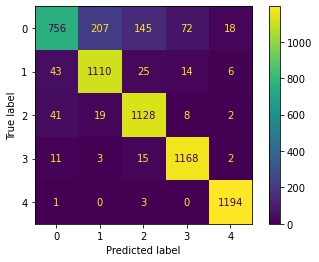

In [31]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()